In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report

In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/개인프로젝트/연습/신용카드 사용자 연체 예측 AI 경진대회_data(데이콘)/open/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/개인프로젝트/연습/신용카드 사용자 연체 예측 AI 경진대회_data(데이콘)/open/test.csv')

#Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
!pip install category_encoders
from category_encoders.ordinal import OrdinalEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 1.4 MB/s eta 0:00:00


In [ ]:
train_data.head(5)

index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -13899          -4709           1           0      0      0   
1      -11380          -1540           1           0      0      1   
2      -19087          -4434           1           0      1      0   
3      -15088          -2092           1           0      1      0   
4      -15037          -2105           1           0      0      0   

    occyp_type  family_size  begin_month  credit  
0          NaN          2.0         -6.0     1.0  
1     Laborers          3.0         -5.0     1.0  
2     Managers          2.0        -22.0     2.0  
3  Sales staff          2.0        -37.0     0.0  
4     Managers          2.0        -26.0     2.0

In [ ]:
train_data.describe()

index     child_num  income_total    DAYS_BIRTH  DAYS_EMPLOYED  \
count  26457.000000  26457.000000  2.645700e+04  26457.000000   26457.000000   
mean   13228.000000      0.428658  1.873065e+05 -15958.053899   59068.750728   
std     7637.622372      0.747326  1.018784e+05   4201.589022  137475.427503   
min        0.000000      0.000000  2.700000e+04 -25152.000000  -15713.000000   
25%     6614.000000      0.000000  1.215000e+05 -19431.000000   -3153.000000   
50%    13228.000000      0.000000  1.575000e+05 -15547.000000   -1539.000000   
75%    19842.000000      1.000000  2.250000e+05 -12446.000000    -407.000000   
max    26456.000000     19.000000  1.575000e+06  -7705.000000  365243.000000   

       FLAG_MOBIL    work_phone         phone         email   family_size  \
count     26457.0  26457.000000  26457.000000  26457.000000  26457.000000   
mean          1.0      0.224742      0.294251      0.091280      2.196848   
std           0.0      0.417420      0.455714      0.288013      0.916717   
min           1.0      0.000000      0.000000      0.000000      1.000000   
25%           1.0      0.000000      0.000000      0.000000      2.000000   
50%           1.0      0.000000      0.000000      0.000000      2.000000   
75%           1.0      0.000000      1.000000      0.000000      3.000000   
max           1.0      1.000000      1.000000      1.000000     20.000000   

        begin_month        credit  
count  26457.000000  26457.000000  
mean     -26.123294      1.519560  
std       16.559550      0.702283  
min      -60.000000      0.000000  
25%      -39.000000      1.000000  
50%      -24.000000      2.000000  
75%      -12.000000      2.000000  
max        0.000000      2.000000

In [ ]:
# preprocessing
for df in[train_data, test_data]:
  
  # < 기초 전처리 >

  # income_total
  df['income_total']=df['income_total']/100

  # child_num
  df['child_num']=df['child_num']+1
  df['child_num']=np.where(df['child_num']>=8, 8,df['child_num']) # 최소값 0 
  
  # DAYS_BIRTH
  df['DAYS_BIRTH']=df['DAYS_BIRTH']*-1 # 최소값 7705

  # begin_month
  df['begin_month']=df['begin_month']*-1  
  df['begin_month']=df['begin_month']+1   # 최소값 1



  # family_size 최소값 1

  # DAYS_EMPLOYED 
  df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED']*-1
  df['DAYS_EMPLOYED']=np.where(df['DAYS_EMPLOYED']<=0,0,df['DAYS_EMPLOYED'])
  df['DAYS_EMPLOYED']=np.where(df['DAYS_EMPLOYED']==0,1,df['DAYS_EMPLOYED']) # 최소값 1

####################################################################################
  # < 심화전처리 >
  df['income_total/begin_month']=df['income_total']/df['begin_month']
  df['income_total/child_num']=df['income_total']/df['child_num']
  df['income_total/family_size']=df['income_total']/df['family_size']
  #df['income_total/DAYS_BIRTH']=np.log1p(df['income_total']/df['DAYS_BIRTH']) #log
  df['income_total/DAYS_EMPLOYED']=np.log1p(df['income_total']/df['DAYS_EMPLOYED']) #log
  df['income_total_double']=np.log1p((df['income_total']-df['income_total'].mean())**2)
  df['DAYS_EMPLOYED-DAYS_BIRTH']=df['DAYS_BIRTH']-df['DAYS_EMPLOYED']
  df['income_total/DAYS_EMPLOYED-DAYS_BIRTH']=np.log1p(df['income_total']/(df['DAYS_BIRTH']-df['DAYS_EMPLOYED'])) #log
  df['income_total*DAYS_EMPLOYED']=np.log1p(df['income_total']*df['DAYS_EMPLOYED']) #log
  df['income_total*DAYS_BIRTH']=np.log1p(df['income_total']*df['DAYS_BIRTH']) #log
  df['income_total*begin_month']=np.log1p(df['income_total']*df['begin_month']) #log
  df['DAYS_BIRTH+DAYS_EMPLOYED']=df['DAYS_BIRTH']+df['DAYS_EMPLOYED']
  df['life_income_total']=np.log1p((df['DAYS_BIRTH']+df['DAYS_EMPLOYED'])*df['income_total']) #log
  #df['life_income_total2']=np.log1p(df['income_total']/(df['DAYS_BIRTH']+df['DAYS_EMPLOYED'])) #log
  #df['feature1']=(df['DAYS_EMPLOYED']/30)-df['begin_month']
  df['feature3']=df['income_total']/(df['DAYS_BIRTH']/30)+(df['DAYS_EMPLOYED']/30)+df['begin_month']
  df['feature7']=df['begin_month']+(df['DAYS_EMPLOYED']/30)
  df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])
  #df['f1']=df['DAYS_BIRTH']/30+df['DAYS_EMPLOYED']/30+df['begin_month']
  #df['f2']=df['income_total']/((df['DAYS_BIRTH']/30+df['DAYS_EMPLOYED']/30+df['begin_month']))
  #df['f3']=df['begin_month']/((df['DAYS_EMPLOYED']+df['DAYS_BIRTH'])/30)
  #df['f5']=np.log1p(df['begin_month']*(df['DAYS_BIRTH']/30)) #log
  df['f6']=np.log1p(df['income_total']/(df['begin_month']*(df['DAYS_BIRTH']/30)))#log


  
  # ID 고유번호
  df['ID'] = \
  df['reality'].astype(str) + '_' + df['income_type'].astype(str) + '_' +\
  df['child_num'].astype(str) + '_' + df['income_total'].astype(str) + '_' +\
  df['email'].astype(str) + '_' + df['family_size'].astype(str) + '_' +\
  df['DAYS_BIRTH'].astype(str) + '_' + df['DAYS_EMPLOYED'].astype(str) + '_' +\
  df['work_phone'].astype(str) + '_' + df['phone'].astype(str) + '_' +\
  df['edu_type'].astype(str) + '_' + df['family_type'].astype(str) + '_' +\
  df['gender'].astype(str) + '_' + df['car'].astype(str) + '_' +\
  df['house_type'].astype(str) + '_' + df['occyp_type'].astype(str)

  # 로그화
  df['income_total']=np.log1p(1+df['income_total'])
  
  # drop features
  df.drop(columns=['index','FLAG_MOBIL','family_size','occyp_type','DAYS_EMPLOYED','income_total'],inplace=True)

<AxesSubplot:>

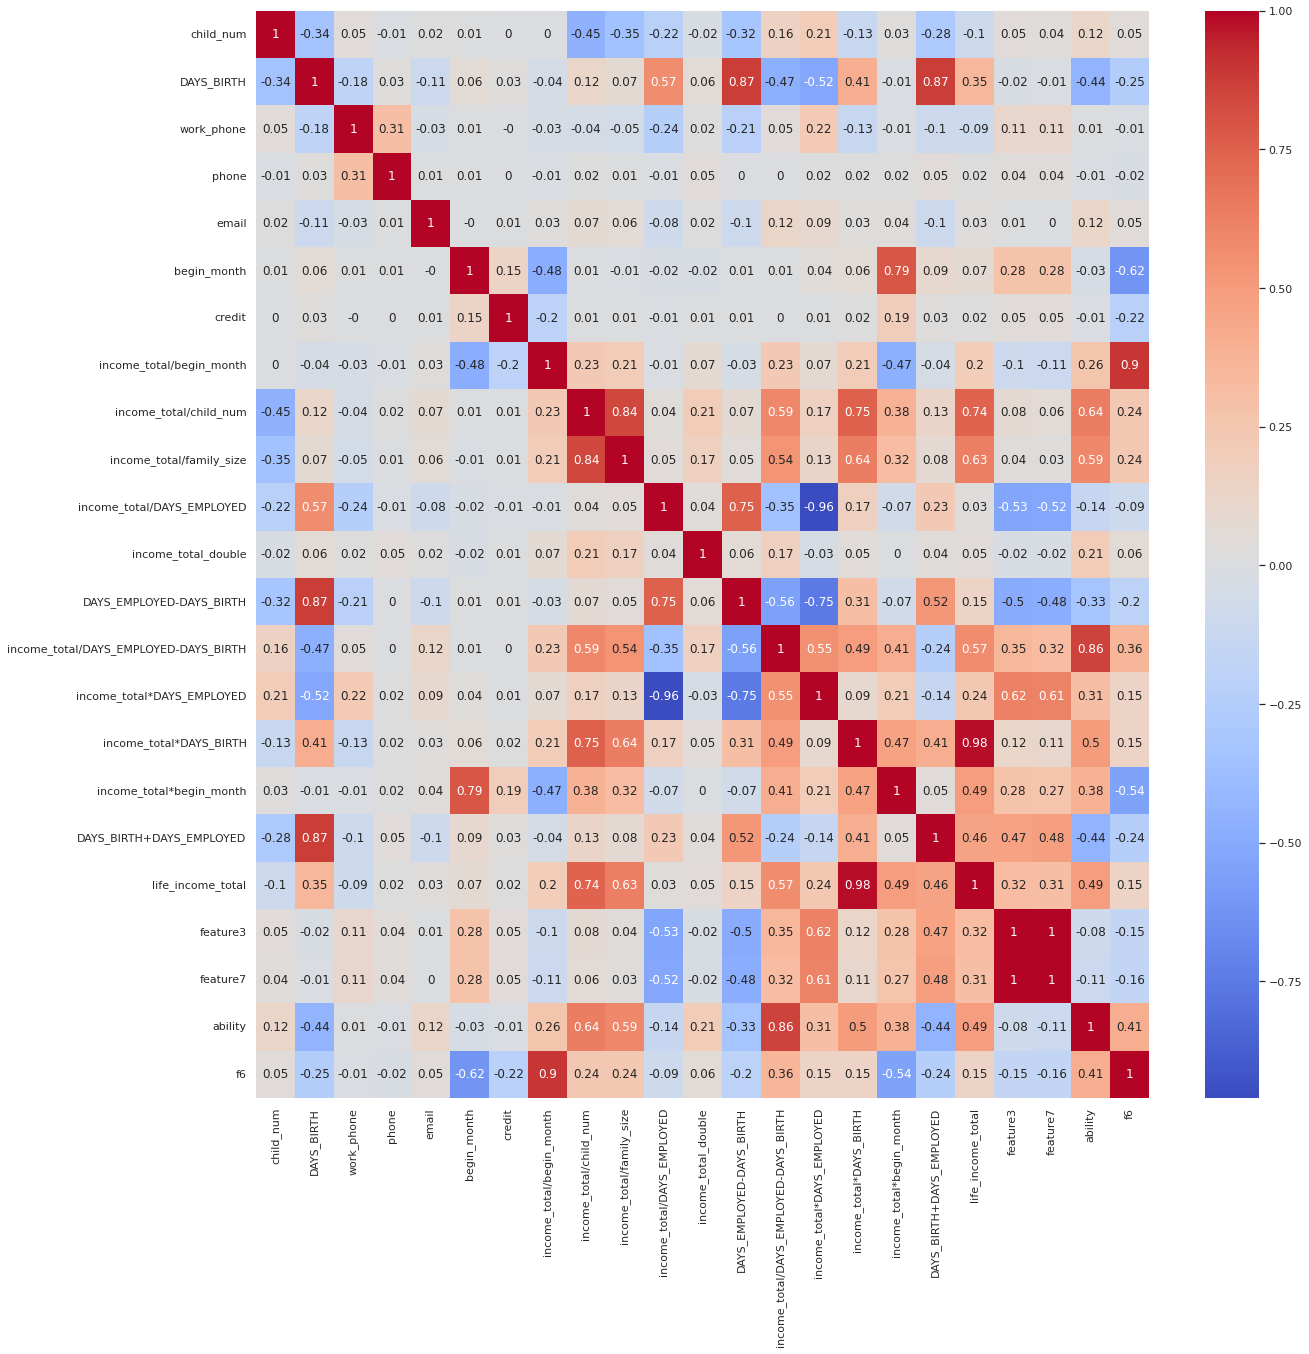

In [ ]:
corr=np.round(train_data.corr(),2)
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
train_data.describe()

child_num    DAYS_BIRTH    work_phone         phone         email  \
count  26457.000000  26457.000000  26457.000000  26457.000000  26457.000000   
mean       1.427411  15958.053899      0.224742      0.294251      0.091280   
std        0.728768   4201.589022      0.417420      0.455714      0.288013   
min        1.000000   7705.000000      0.000000      0.000000      0.000000   
25%        1.000000  12446.000000      0.000000      0.000000      0.000000   
50%        1.000000  15547.000000      0.000000      0.000000      0.000000   
75%        2.000000  19431.000000      0.000000      1.000000      0.000000   
max        8.000000  25152.000000      1.000000      1.000000      1.000000   

        begin_month        credit  income_total/begin_month  \
count  26457.000000  26457.000000              26457.000000   
mean      27.123294      1.519560                142.031158   
std       16.559550      0.702283                248.099534   
min        1.000000      0.000000                  6.337500   
25%       13.000000      1.000000                 40.178571   
50%       25.000000      2.000000                 70.500000   
75%       40.000000      2.000000                143.181818   
max       61.000000      2.000000               9000.000000   

       income_total/child_num  income_total/family_size  ...  \
count            26457.000000              26457.000000  ...   
mean              1539.489589               1010.794371  ...   
std                979.145822                731.843300  ...   
min                 94.500000                 56.250000  ...   
25%                900.000000                562.500000  ...   
50%               1350.000000                787.500000  ...   
75%               2025.000000               1260.000000  ...   
max              13500.000000               9000.000000  ...   

       income_total/DAYS_EMPLOYED-DAYS_BIRTH  income_total*DAYS_EMPLOYED  \
count                           26457.000000                26457.000000   
mean                                0.140923                   13.621518   
std                                 0.082324                    3.073224   
min                                 0.012605                    5.681878   
25%                                 0.082349                   13.324489   
50%                                 0.125789                   14.739413   
75%                                 0.180765                   15.580721   
max                                 1.116888                   18.014756   

       income_total*DAYS_BIRTH  income_total*begin_month  \
count             26457.000000              26457.000000   
mean                 17.058684                 10.444458   
std                   0.531138                  0.993145   
min                  15.205456                  6.111467   
25%                  16.697875                  9.858804   
50%                  17.048195                 10.609082   
75%                  17.413080                 11.159118   
max                  19.227543                 13.596423   

       DAYS_BIRTH+DAYS_EMPLOYED  life_income_total      feature3  \
count              26457.000000       26457.000000  26457.000000   
mean               18156.751181          17.187680    104.219126   
std                 4782.148181           0.544021     82.154875   
min                 7993.000000          15.316082      1.648418   
25%                14306.000000          16.814356     45.863654   
50%                18139.000000          17.175054     82.287727   
75%                21687.000000          17.551987    139.086646   
max                38608.000000          19.326601    561.581592   

           feature7       ability            f6  
count  26457.000000  26457.000000  26457.000000  
mean     100.413204      0.111022      0.216515  
std       82.045394      0.067667      0.246218  
min        1.033333      0.012355      0.008288  
25%       42.133333      0.065287      0.073470  
50%       78.0

In [ ]:
train_data.shape

(26457, 31)

In [ ]:
target_data=train_data['credit']
train_data.drop(columns=['credit'], inplace=True)

In [ ]:
 # Encoder => 조심 데이터 누수 방지를 위해서

numerical_features=train_data.dtypes[train_data.dtypes != "object"].index.tolist()
categorical_features=train_data.dtypes[train_data.dtypes =='object'].index.tolist()

encoder=OrdinalEncoder(categorical_features)
train_data[categorical_features]=encoder.fit_transform(train_data[categorical_features])
test_data[categorical_features]=encoder.transform(test_data[categorical_features])

In [ ]:
train_data['ID'] = train_data['ID'].astype('int')
test_data['ID'] = test_data['ID'].astype('int')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# numerical_features.remove('income_total')
# numerical_features.remove('income_total/DAYS_BIRTH')
# numerical_features.remove('income_total/DAYS_EMPLOYED')
# numerical_features.remove('income_total_double')
# numerical_features.remove('income_total/DAYS_EMPLOYED-DAYS_BIRTH')
# numerical_features.remove('income_total*DAYS_EMPLOYED')
# numerical_features.remove('income_total*DAYS_BIRTH')
# numerical_features.remove('income_total*begin_month')
# numerical_features.remove('life_income_total')
# numerical_features.remove('life_income_total2')


scaler= MinMaxScaler()
scaler.fit(train_data[numerical_features])
train_data=scaler.transform(train_data[numerical_features])
test_data=scaler.transform(test_data[numerical_features])

#차원축소 LDA

In [ ]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.decomposition import PCA

# # pca=PCA(n_components=4)
# # pca.fit(train_data)
# # train_data=pca.transform(train_data)

# # lda=LinearDiscriminantAnalysis(n_components=2)
# # lda.fit(train_data, target_data) 
# # train_data=lda.transform(train_data)

In [ ]:
train_data.shape

(26457, 22)

# Model

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate,StratifiedKFold

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 5.8 MB/s eta 0:00:00


In [ ]:
train_data, val_data, train_target, val_target=train_test_split(train_data, target_data, test_size=0.2)

In [ ]:
def model(train_data, val_data, train_target, val_target):
  
  splitter=StratifiedKFold(n_splits=15, shuffle=True)

  rf=RandomForestClassifier(max_features='auto')
  rf.fit(train_data,  train_target)
  b=rf.score(train_data,  train_target)
  b1=rf.score(val_data, val_target)
  scores=cross_val_score(rf, train_data, train_target,cv=splitter, scoring='accuracy')
  scores=np.round(scores,2)
  print('rf성능 점수:{}, rf_val 성능점수:{}, 교차검증점수:{}'.format(b,b1,scores))

  gb=GradientBoostingClassifier()
  gb.fit(train_data,  train_target)
  c=gb.score(train_data,  train_target)
  c1=gb.score(val_data, val_target)
  scores=cross_val_score(gb, train_data, train_target,cv=splitter, scoring='accuracy')
  scores=np.round(scores,2)
  print('gb성능 점수:{}, gb_val 성능점수:{}, 교차검증점수:{}'.format(c,c1,scores))

  evals=[(train_data,train_target),(val_data,val_target)]
  xgb=XGBClassifier()
  xgb.fit(train_data,  train_target,eval_set=evals, verbose=False)
  d=xgb.score(train_data,  train_target)
  d1=xgb.score(val_data, val_target)
  scores=cross_val_score(xgb, train_data, train_target,cv=splitter, scoring='accuracy', verbose=False)
  scores=np.round(scores,2)
  print('xgb성능 점수:{}, xgb_val 성능점수:{}, 교차검증점수:{}'.format(d,d1,scores))

  evals=[(train_data,train_target),(val_data,val_target)]
  lgb=LGBMClassifier(silent=1)
  lgb.fit(train_data,  train_target,eval_set=evals, verbose=False)
  e=lgb.score(train_data,  train_target)
  e1=lgb.score(val_data, val_target)
  scores=cross_val_score(lgb, train_data, train_target,cv=splitter, scoring='accuracy', verbose=False)
  scores=np.round(scores,2)
  print('lgb성능 점수:{}, lgb_val 성능점수:{}, 교차검증점수:{}'.format(e,e1,scores))
  
  splitter=StratifiedKFold(n_splits=15, shuffle=True)
  evals=[(train_data,train_target),(val_data,val_target)]
  cat=CatBoostClassifier(verbose=False)
  cat.fit(train_data,  train_target,eval_set=evals, verbose=False)
  f=cat.score(train_data,  train_target)  
  f1=cat.score(val_data, val_target)
  scores=cross_val_score(cat, train_data, train_target,cv=splitter, scoring='accuracy', verbose=False)
  scores=np.round(scores,2)
  print('cat성능 점수:{}, cat_val 성능점수:{}, 교차검증점수:{}'.format(f,f1,scores))
        

model(train_data, val_data,  train_target, val_target)    

rf성능 점수:0.9776990314197969, rf_val 성능점수:0.6846182917611489, 교차검증점수:[0.7  0.71 0.69 0.7  0.69 0.7  0.69 0.71 0.7  0.69 0.68 0.7  0.69 0.7
 0.69]
gb성능 점수:0.699078667611623, gb_val 성능점수:0.6866969009826153, 교차검증점수:[0.68 0.7  0.7  0.69 0.7  0.7  0.69 0.69 0.7  0.69 0.7  0.7  0.69 0.68
 0.7 ]
xgb성능 점수:0.7968816442239547, xgb_val 성능점수:0.6980347694633409, 교차검증점수:[0.71 0.7  0.71 0.7  0.71 0.7  0.71 0.71 0.7  0.71 0.72 0.71 0.71 0.71
 0.71]
lgb성능 점수:0.7218048665249233, lgb_val 성능점수:0.690098261526833, 교차검증점수:[0.7  0.7  0.71 0.69 0.7  0.69 0.7  0.71 0.69 0.7  0.7  0.71 0.7  0.69
 0.71]
cat성능 점수:0.7595558705409875, cat_val 성능점수:0.6969009826152683, 교차검증점수:[0.71 0.71 0.71 0.7  0.69 0.71 0.7  0.7  0.7  0.71 0.7  0.7  0.69 0.72
 0.7 ]


# Hyperparameter

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.2 MB/s eta 0:00:00


In [ ]:
import optuna

# xgb

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score

def xgb_objective(trial):
  n_estimators=trial.suggest_int('n_estimators',500,1000) #필수
  learning_rate=trial.suggest_uniform('learning_rate',0.007,0.2) #필수
  max_depth=trial.suggest_int('max_depth',15,70)# 필수
  subsample=trial.suggest_uniform('subsample',0.01,1) # 필수
  colsample_bytree=trial.suggest_uniform('colsample_bytree',0.01,1)# 필수
  objective=trial.suggest_categorical('objective',['multiclass'])
  min_child_weight=trial.suggest_uniform('min_child_weight',0.01,1)


  evals=[(train_data, train_target),(val_data, val_target)]
  xgb=XGBClassifier(n_estimators=n_estimators,
                     learning_rate=learning_rate,
                     max_depth=max_depth,
                     subsample=subsample,
                     colsample_bytree=colsample_bytree,
                     objective=objective,
                     min_child_weight=min_child_weight
                     )
  xgb.fit(train_data, train_target, eval_metric='mlogloss',eval_set=evals)
  pred=xgb.predict_proba(val_data)
  scores=log_loss(val_target, pred)
  return scores

xgb_study=optuna.create_study(direction='minimize')
xgb_study.optimize(xgb_objective, n_trials=100)
xgb_best_params=xgb_study.best_params

[I 2023-03-14 09:58:52,056] A new study created in memory with name: no-name-16a95caa-603a-4656-be5f-e4ab3d30993c


[0]	validation_0-mlogloss:1.06845	validation_1-mlogloss:1.07815
[1]	validation_0-mlogloss:1.03958	validation_1-mlogloss:1.05893
[2]	validation_0-mlogloss:1.01256	validation_1-mlogloss:1.04167
[3]	validation_0-mlogloss:0.98659	validation_1-mlogloss:1.02540
[4]	validation_0-mlogloss:0.96153	validation_1-mlogloss:1.00954
[5]	validation_0-mlogloss:0.93770	validation_1-mlogloss:0.99488
[6]	validation_0-mlogloss:0.91548	validation_1-mlogloss:0.98155
[7]	validation_0-mlogloss:0.89358	validation_1-mlogloss:0.96860
[8]	validation_0-mlogloss:0.87279	validation_1-mlogloss:0.95685
[9]	validation_0-mlogloss:0.85268	validation_1-mlogloss:0.94513
[10]	validation_0-mlogloss:0.83325	validation_1-mlogloss:0.93376
[11]	validation_0-mlogloss:0.81476	validation_1-mlogloss:0.92369
[12]	validation_0-mlogloss:0.79712	validation_1-mlogloss:0.91438
[13]	validation_0-mlogloss:0.78005	validation_1-mlogloss:0.90589
[14]	validation_0-mlogloss:0.76366	validation_1-mlogloss:0.89692
[15]	validation_0-mlogloss:0.74789	

[I 2023-03-14 10:06:24,102] Trial 0 finished with value: 1.1361741442406823 and parameters: {'n_estimators': 936, 'learning_rate': 0.04220599422461438, 'max_depth': 68, 'subsample': 0.4816338139566527, 'colsample_bytree': 0.5249873100795986, 'objective': 'multiclass', 'min_child_weight': 0.5582306760144203}. Best is trial 0 with value: 1.1361741442406823.


[0]	validation_0-mlogloss:0.97122	validation_1-mlogloss:1.01816
[1]	validation_0-mlogloss:0.87051	validation_1-mlogloss:0.95864
[2]	validation_0-mlogloss:0.78234	validation_1-mlogloss:0.91388
[3]	validation_0-mlogloss:0.70474	validation_1-mlogloss:0.87721
[4]	validation_0-mlogloss:0.65191	validation_1-mlogloss:0.85008
[5]	validation_0-mlogloss:0.59590	validation_1-mlogloss:0.82676
[6]	validation_0-mlogloss:0.55227	validation_1-mlogloss:0.80945
[7]	validation_0-mlogloss:0.51253	validation_1-mlogloss:0.79573
[8]	validation_0-mlogloss:0.48253	validation_1-mlogloss:0.78456
[9]	validation_0-mlogloss:0.45013	validation_1-mlogloss:0.77574
[10]	validation_0-mlogloss:0.42419	validation_1-mlogloss:0.76981
[11]	validation_0-mlogloss:0.40359	validation_1-mlogloss:0.76646
[12]	validation_0-mlogloss:0.38267	validation_1-mlogloss:0.76287
[13]	validation_0-mlogloss:0.36310	validation_1-mlogloss:0.76242
[14]	validation_0-mlogloss:0.34491	validation_1-mlogloss:0.76136
[15]	validation_0-mlogloss:0.32589	

[I 2023-03-14 10:12:28,914] Trial 1 finished with value: 1.5242268530900143 and parameters: {'n_estimators': 726, 'learning_rate': 0.17242793462251405, 'max_depth': 21, 'subsample': 0.9021329849273756, 'colsample_bytree': 0.6432422794098862, 'objective': 'multiclass', 'min_child_weight': 0.22446038291529724}. Best is trial 0 with value: 1.1361741442406823.


[0]	validation_0-mlogloss:0.98988	validation_1-mlogloss:1.03415
[1]	validation_0-mlogloss:0.90978	validation_1-mlogloss:0.97649
[2]	validation_0-mlogloss:0.84621	validation_1-mlogloss:0.93609
[3]	validation_0-mlogloss:0.78166	validation_1-mlogloss:0.89897
[4]	validation_0-mlogloss:0.71107	validation_1-mlogloss:0.87003
[5]	validation_0-mlogloss:0.67704	validation_1-mlogloss:0.84764
[6]	validation_0-mlogloss:0.65107	validation_1-mlogloss:0.83225
[7]	validation_0-mlogloss:0.59726	validation_1-mlogloss:0.81555
[8]	validation_0-mlogloss:0.57897	validation_1-mlogloss:0.80700
[9]	validation_0-mlogloss:0.53547	validation_1-mlogloss:0.79253
[10]	validation_0-mlogloss:0.50485	validation_1-mlogloss:0.78184
[11]	validation_0-mlogloss:0.48008	validation_1-mlogloss:0.77722
[12]	validation_0-mlogloss:0.46609	validation_1-mlogloss:0.77062
[13]	validation_0-mlogloss:0.42938	validation_1-mlogloss:0.76132
[14]	validation_0-mlogloss:0.41489	validation_1-mlogloss:0.75811
[15]	validation_0-mlogloss:0.39082	

[I 2023-03-14 10:14:08,844] Trial 2 finished with value: 1.2747593790812093 and parameters: {'n_estimators': 623, 'learning_rate': 0.1674315276010703, 'max_depth': 56, 'subsample': 0.8488160024824889, 'colsample_bytree': 0.10278775549965605, 'objective': 'multiclass', 'min_child_weight': 0.09251866108275697}. Best is trial 0 with value: 1.1361741442406823.


[0]	validation_0-mlogloss:1.05786	validation_1-mlogloss:1.06549
[1]	validation_0-mlogloss:1.01887	validation_1-mlogloss:1.03389
[2]	validation_0-mlogloss:0.99188	validation_1-mlogloss:1.01012
[3]	validation_0-mlogloss:0.96553	validation_1-mlogloss:0.98865
[4]	validation_0-mlogloss:0.92907	validation_1-mlogloss:0.96721
[5]	validation_0-mlogloss:0.90976	validation_1-mlogloss:0.95082
[6]	validation_0-mlogloss:0.89639	validation_1-mlogloss:0.93829
[7]	validation_0-mlogloss:0.87902	validation_1-mlogloss:0.92609
[8]	validation_0-mlogloss:0.86352	validation_1-mlogloss:0.91377
[9]	validation_0-mlogloss:0.84164	validation_1-mlogloss:0.89699
[10]	validation_0-mlogloss:0.82662	validation_1-mlogloss:0.88628
[11]	validation_0-mlogloss:0.82027	validation_1-mlogloss:0.88030
[12]	validation_0-mlogloss:0.81402	validation_1-mlogloss:0.87482
[13]	validation_0-mlogloss:0.79296	validation_1-mlogloss:0.86326
[14]	validation_0-mlogloss:0.78004	validation_1-mlogloss:0.85586
[15]	validation_0-mlogloss:0.76119	

[I 2023-03-14 10:15:20,769] Trial 3 finished with value: 0.9842322469464212 and parameters: {'n_estimators': 563, 'learning_rate': 0.09026029043891376, 'max_depth': 35, 'subsample': 0.8952342857913458, 'colsample_bytree': 0.05940390561153559, 'objective': 'multiclass', 'min_child_weight': 0.7482452655255644}. Best is trial 3 with value: 0.9842322469464212.


[0]	validation_0-mlogloss:1.00402	validation_1-mlogloss:1.03616
[1]	validation_0-mlogloss:0.92214	validation_1-mlogloss:0.98693
[2]	validation_0-mlogloss:0.85251	validation_1-mlogloss:0.94843
[3]	validation_0-mlogloss:0.79188	validation_1-mlogloss:0.91457
[4]	validation_0-mlogloss:0.73787	validation_1-mlogloss:0.88498
[5]	validation_0-mlogloss:0.68984	validation_1-mlogloss:0.86142
[6]	validation_0-mlogloss:0.64853	validation_1-mlogloss:0.84335
[7]	validation_0-mlogloss:0.61190	validation_1-mlogloss:0.82733
[8]	validation_0-mlogloss:0.57780	validation_1-mlogloss:0.81412
[9]	validation_0-mlogloss:0.54657	validation_1-mlogloss:0.80301
[10]	validation_0-mlogloss:0.51882	validation_1-mlogloss:0.79233
[11]	validation_0-mlogloss:0.49315	validation_1-mlogloss:0.78514
[12]	validation_0-mlogloss:0.46974	validation_1-mlogloss:0.77863
[13]	validation_0-mlogloss:0.44778	validation_1-mlogloss:0.77333
[14]	validation_0-mlogloss:0.42871	validation_1-mlogloss:0.76928
[15]	validation_0-mlogloss:0.41014	

[I 2023-03-14 10:18:57,706] Trial 4 finished with value: 1.3851432733123055 and parameters: {'n_estimators': 633, 'learning_rate': 0.137895374926941, 'max_depth': 35, 'subsample': 0.4351135244636231, 'colsample_bytree': 0.5311699180161366, 'objective': 'multiclass', 'min_child_weight': 0.3517840936225648}. Best is trial 3 with value: 0.9842322469464212.


[0]	validation_0-mlogloss:1.00464	validation_1-mlogloss:1.03533
[1]	validation_0-mlogloss:0.92682	validation_1-mlogloss:0.98612
[2]	validation_0-mlogloss:0.85630	validation_1-mlogloss:0.94453
[3]	validation_0-mlogloss:0.79806	validation_1-mlogloss:0.91081
[4]	validation_0-mlogloss:0.74579	validation_1-mlogloss:0.88395
[5]	validation_0-mlogloss:0.69587	validation_1-mlogloss:0.86057
[6]	validation_0-mlogloss:0.65520	validation_1-mlogloss:0.84135
[7]	validation_0-mlogloss:0.61818	validation_1-mlogloss:0.82565
[8]	validation_0-mlogloss:0.58517	validation_1-mlogloss:0.81149
[9]	validation_0-mlogloss:0.55615	validation_1-mlogloss:0.80058
[10]	validation_0-mlogloss:0.52935	validation_1-mlogloss:0.79092
[11]	validation_0-mlogloss:0.50703	validation_1-mlogloss:0.78306
[12]	validation_0-mlogloss:0.48230	validation_1-mlogloss:0.77614
[13]	validation_0-mlogloss:0.46134	validation_1-mlogloss:0.77180
[14]	validation_0-mlogloss:0.44157	validation_1-mlogloss:0.76840
[15]	validation_0-mlogloss:0.42021	

[I 2023-03-14 10:24:55,331] Trial 5 finished with value: 1.6261961154117146 and parameters: {'n_estimators': 655, 'learning_rate': 0.13534436373638462, 'max_depth': 22, 'subsample': 0.6404573050085496, 'colsample_bytree': 0.7107309483471024, 'objective': 'multiclass', 'min_child_weight': 0.02185869116234812}. Best is trial 3 with value: 0.9842322469464212.


[0]	validation_0-mlogloss:1.00932	validation_1-mlogloss:1.03420
[1]	validation_0-mlogloss:0.93533	validation_1-mlogloss:0.98314
[2]	validation_0-mlogloss:0.87328	validation_1-mlogloss:0.94606
[3]	validation_0-mlogloss:0.82003	validation_1-mlogloss:0.91177
[4]	validation_0-mlogloss:0.77394	validation_1-mlogloss:0.88583
[5]	validation_0-mlogloss:0.73254	validation_1-mlogloss:0.86369
[6]	validation_0-mlogloss:0.69578	validation_1-mlogloss:0.84455
[7]	validation_0-mlogloss:0.66335	validation_1-mlogloss:0.82967
[8]	validation_0-mlogloss:0.63410	validation_1-mlogloss:0.81764
[9]	validation_0-mlogloss:0.60813	validation_1-mlogloss:0.80778
[10]	validation_0-mlogloss:0.58412	validation_1-mlogloss:0.79888
[11]	validation_0-mlogloss:0.56330	validation_1-mlogloss:0.79314
[12]	validation_0-mlogloss:0.54278	validation_1-mlogloss:0.78867
[13]	validation_0-mlogloss:0.52538	validation_1-mlogloss:0.78379
[14]	validation_0-mlogloss:0.50774	validation_1-mlogloss:0.77948
[15]	validation_0-mlogloss:0.49213	

[I 2023-03-14 10:29:23,034] Trial 6 finished with value: 1.3329515728579258 and parameters: {'n_estimators': 671, 'learning_rate': 0.15047190152835682, 'max_depth': 30, 'subsample': 0.30351650735827085, 'colsample_bytree': 0.9359796142100448, 'objective': 'multiclass', 'min_child_weight': 0.7693099645105457}. Best is trial 3 with value: 0.9842322469464212.


[0]	validation_0-mlogloss:0.99686	validation_1-mlogloss:1.03628
[1]	validation_0-mlogloss:0.91065	validation_1-mlogloss:0.98781
[2]	validation_0-mlogloss:0.83555	validation_1-mlogloss:0.94891
[3]	validation_0-mlogloss:0.77031	validation_1-mlogloss:0.91663
[4]	validation_0-mlogloss:0.71224	validation_1-mlogloss:0.88960
[5]	validation_0-mlogloss:0.66096	validation_1-mlogloss:0.86568
[6]	validation_0-mlogloss:0.61491	validation_1-mlogloss:0.84682
[7]	validation_0-mlogloss:0.57417	validation_1-mlogloss:0.83091
[8]	validation_0-mlogloss:0.53692	validation_1-mlogloss:0.81733
[9]	validation_0-mlogloss:0.50343	validation_1-mlogloss:0.80566
[10]	validation_0-mlogloss:0.47301	validation_1-mlogloss:0.79697
[11]	validation_0-mlogloss:0.44572	validation_1-mlogloss:0.78861
[12]	validation_0-mlogloss:0.42009	validation_1-mlogloss:0.78137
[13]	validation_0-mlogloss:0.39667	validation_1-mlogloss:0.77737
[14]	validation_0-mlogloss:0.37557	validation_1-mlogloss:0.77325
[15]	validation_0-mlogloss:0.35664	

[I 2023-03-14 10:34:36,326] Trial 7 finished with value: 1.4629670314960126 and parameters: {'n_estimators': 783, 'learning_rate': 0.13057666179576702, 'max_depth': 55, 'subsample': 0.6470523056231171, 'colsample_bytree': 0.5599960367836423, 'objective': 'multiclass', 'min_child_weight': 0.628095588956812}. Best is trial 3 with value: 0.9842322469464212.


[0]	validation_0-mlogloss:1.03000	validation_1-mlogloss:1.05123
[1]	validation_0-mlogloss:0.97071	validation_1-mlogloss:1.01295
[2]	validation_0-mlogloss:0.91603	validation_1-mlogloss:0.98009
[3]	validation_0-mlogloss:0.86653	validation_1-mlogloss:0.95123
[4]	validation_0-mlogloss:0.82393	validation_1-mlogloss:0.92596
[5]	validation_0-mlogloss:0.78269	validation_1-mlogloss:0.90305
[6]	validation_0-mlogloss:0.74560	validation_1-mlogloss:0.88292
[7]	validation_0-mlogloss:0.71129	validation_1-mlogloss:0.86563
[8]	validation_0-mlogloss:0.68100	validation_1-mlogloss:0.85092
[9]	validation_0-mlogloss:0.65282	validation_1-mlogloss:0.83776
[10]	validation_0-mlogloss:0.62451	validation_1-mlogloss:0.82525
[11]	validation_0-mlogloss:0.59918	validation_1-mlogloss:0.81549
[12]	validation_0-mlogloss:0.57530	validation_1-mlogloss:0.80670
[13]	validation_0-mlogloss:0.55510	validation_1-mlogloss:0.79897
[14]	validation_0-mlogloss:0.53610	validation_1-mlogloss:0.79205
[15]	validation_0-mlogloss:0.51625	

[I 2023-03-14 10:39:01,019] Trial 8 finished with value: 1.30645327418491 and parameters: {'n_estimators': 751, 'learning_rate': 0.0978681730721544, 'max_depth': 29, 'subsample': 0.5341948510369094, 'colsample_bytree': 0.4966611882878452, 'objective': 'multiclass', 'min_child_weight': 0.5124605800050593}. Best is trial 3 with value: 0.9842322469464212.


[0]	validation_0-mlogloss:1.07189	validation_1-mlogloss:1.08355
[1]	validation_0-mlogloss:1.04622	validation_1-mlogloss:1.06898
[2]	validation_0-mlogloss:1.02127	validation_1-mlogloss:1.05502
[3]	validation_0-mlogloss:0.99723	validation_1-mlogloss:1.04221
[4]	validation_0-mlogloss:0.97408	validation_1-mlogloss:1.02989
[5]	validation_0-mlogloss:0.95167	validation_1-mlogloss:1.01798
[6]	validation_0-mlogloss:0.92989	validation_1-mlogloss:1.00685
[7]	validation_0-mlogloss:0.90886	validation_1-mlogloss:0.99589
[8]	validation_0-mlogloss:0.88855	validation_1-mlogloss:0.98543
[9]	validation_0-mlogloss:0.86872	validation_1-mlogloss:0.97546
[10]	validation_0-mlogloss:0.84958	validation_1-mlogloss:0.96542
[11]	validation_0-mlogloss:0.83101	validation_1-mlogloss:0.95646
[12]	validation_0-mlogloss:0.81301	validation_1-mlogloss:0.94760
[13]	validation_0-mlogloss:0.79550	validation_1-mlogloss:0.93924
[14]	validation_0-mlogloss:0.77860	validation_1-mlogloss:0.93091
[15]	validation_0-mlogloss:0.76212	

[I 2023-03-14 10:49:55,912] Trial 9 finished with value: 1.0975121365895062 and parameters: {'n_estimators': 629, 'learning_rate': 0.028401109192749727, 'max_depth': 70, 'subsample': 0.9130825637320604, 'colsample_bytree': 0.8386585256469954, 'objective': 'multiclass', 'min_child_weight': 0.6228757708560556}. Best is trial 3 with value: 0.9842322469464212.


[0]	validation_0-mlogloss:1.03389	validation_1-mlogloss:1.03644
[1]	validation_0-mlogloss:0.98862	validation_1-mlogloss:0.99270
[2]	validation_0-mlogloss:0.95209	validation_1-mlogloss:0.95964
[3]	validation_0-mlogloss:0.93109	validation_1-mlogloss:0.94144
[4]	validation_0-mlogloss:0.91556	validation_1-mlogloss:0.92843
[5]	validation_0-mlogloss:0.90247	validation_1-mlogloss:0.91643
[6]	validation_0-mlogloss:0.89036	validation_1-mlogloss:0.90508
[7]	validation_0-mlogloss:0.88008	validation_1-mlogloss:0.89839
[8]	validation_0-mlogloss:0.87467	validation_1-mlogloss:0.89376
[9]	validation_0-mlogloss:0.86212	validation_1-mlogloss:0.88297
[10]	validation_0-mlogloss:0.85739	validation_1-mlogloss:0.87929
[11]	validation_0-mlogloss:0.85572	validation_1-mlogloss:0.87775
[12]	validation_0-mlogloss:0.85371	validation_1-mlogloss:0.87675
[13]	validation_0-mlogloss:0.85119	validation_1-mlogloss:0.87701
[14]	validation_0-mlogloss:0.84984	validation_1-mlogloss:0.87702
[15]	validation_0-mlogloss:0.84601	

[I 2023-03-14 10:50:25,876] Trial 10 finished with value: 1.0267868567799054 and parameters: {'n_estimators': 512, 'learning_rate': 0.19622486705806114, 'max_depth': 45, 'subsample': 0.033227304405606894, 'colsample_bytree': 0.029295174099171557, 'objective': 'multiclass', 'min_child_weight': 0.9654660751858556}. Best is trial 3 with value: 0.9842322469464212.


[0]	validation_0-mlogloss:1.03615	validation_1-mlogloss:1.03953
[1]	validation_0-mlogloss:0.99044	validation_1-mlogloss:0.99710
[2]	validation_0-mlogloss:0.95531	validation_1-mlogloss:0.96509
[3]	validation_0-mlogloss:0.93338	validation_1-mlogloss:0.94685
[4]	validation_0-mlogloss:0.91447	validation_1-mlogloss:0.93057
[5]	validation_0-mlogloss:0.90101	validation_1-mlogloss:0.91792
[6]	validation_0-mlogloss:0.88897	validation_1-mlogloss:0.90679
[7]	validation_0-mlogloss:0.87816	validation_1-mlogloss:0.89924
[8]	validation_0-mlogloss:0.87157	validation_1-mlogloss:0.89442
[9]	validation_0-mlogloss:0.85731	validation_1-mlogloss:0.88319
[10]	validation_0-mlogloss:0.85147	validation_1-mlogloss:0.87894
[11]	validation_0-mlogloss:0.84958	validation_1-mlogloss:0.87729
[12]	validation_0-mlogloss:0.84711	validation_1-mlogloss:0.87593
[13]	validation_0-mlogloss:0.84328	validation_1-mlogloss:0.87514
[14]	validation_0-mlogloss:0.84060	validation_1-mlogloss:0.87438
[15]	validation_0-mlogloss:0.83554	

[I 2023-03-14 10:50:57,664] Trial 11 finished with value: 0.9715508779880108 and parameters: {'n_estimators': 504, 'learning_rate': 0.1842730313086773, 'max_depth': 45, 'subsample': 0.04870280507389446, 'colsample_bytree': 0.05492418558556533, 'objective': 'multiclass', 'min_child_weight': 0.9998029679155795}. Best is trial 11 with value: 0.9715508779880108.


[0]	validation_0-mlogloss:1.06790	validation_1-mlogloss:1.06887
[1]	validation_0-mlogloss:1.03671	validation_1-mlogloss:1.03959
[2]	validation_0-mlogloss:1.01086	validation_1-mlogloss:1.01566
[3]	validation_0-mlogloss:0.99048	validation_1-mlogloss:0.99785
[4]	validation_0-mlogloss:0.97328	validation_1-mlogloss:0.98223
[5]	validation_0-mlogloss:0.95330	validation_1-mlogloss:0.96317
[6]	validation_0-mlogloss:0.93683	validation_1-mlogloss:0.94901
[7]	validation_0-mlogloss:0.91997	validation_1-mlogloss:0.93386
[8]	validation_0-mlogloss:0.90526	validation_1-mlogloss:0.92084
[9]	validation_0-mlogloss:0.89232	validation_1-mlogloss:0.91062
[10]	validation_0-mlogloss:0.88120	validation_1-mlogloss:0.90083
[11]	validation_0-mlogloss:0.87200	validation_1-mlogloss:0.89333
[12]	validation_0-mlogloss:0.86287	validation_1-mlogloss:0.88615
[13]	validation_0-mlogloss:0.85599	validation_1-mlogloss:0.88057
[14]	validation_0-mlogloss:0.84918	validation_1-mlogloss:0.87623
[15]	validation_0-mlogloss:0.84357	

[I 2023-03-14 10:51:46,524] Trial 12 finished with value: 0.9087254467201424 and parameters: {'n_estimators': 541, 'learning_rate': 0.09259948259637737, 'max_depth': 44, 'subsample': 0.03046762017481837, 'colsample_bytree': 0.195518317446306, 'objective': 'multiclass', 'min_child_weight': 0.9600214143398946}. Best is trial 12 with value: 0.9087254467201424.


[0]	validation_0-mlogloss:1.07346	validation_1-mlogloss:1.07532
[1]	validation_0-mlogloss:1.05024	validation_1-mlogloss:1.05369
[2]	validation_0-mlogloss:1.03047	validation_1-mlogloss:1.03610
[3]	validation_0-mlogloss:1.01258	validation_1-mlogloss:1.01981
[4]	validation_0-mlogloss:0.99726	validation_1-mlogloss:1.00551
[5]	validation_0-mlogloss:0.98185	validation_1-mlogloss:0.99026
[6]	validation_0-mlogloss:0.96734	validation_1-mlogloss:0.97645
[7]	validation_0-mlogloss:0.95191	validation_1-mlogloss:0.96168
[8]	validation_0-mlogloss:0.93804	validation_1-mlogloss:0.94894
[9]	validation_0-mlogloss:0.92586	validation_1-mlogloss:0.93802
[10]	validation_0-mlogloss:0.91427	validation_1-mlogloss:0.92738
[11]	validation_0-mlogloss:0.90448	validation_1-mlogloss:0.91882
[12]	validation_0-mlogloss:0.89372	validation_1-mlogloss:0.90906
[13]	validation_0-mlogloss:0.88570	validation_1-mlogloss:0.90210
[14]	validation_0-mlogloss:0.87904	validation_1-mlogloss:0.89647
[15]	validation_0-mlogloss:0.87232	

[I 2023-03-14 10:52:32,538] Trial 13 finished with value: 0.8610465272526396 and parameters: {'n_estimators': 511, 'learning_rate': 0.06689621989032538, 'max_depth': 48, 'subsample': 0.026766179328158807, 'colsample_bytree': 0.23531585455968762, 'objective': 'multiclass', 'min_child_weight': 0.9809918621870758}. Best is trial 13 with value: 0.8610465272526396.


[0]	validation_0-mlogloss:1.06981	validation_1-mlogloss:1.07513
[1]	validation_0-mlogloss:1.04104	validation_1-mlogloss:1.05106
[2]	validation_0-mlogloss:1.01680	validation_1-mlogloss:1.03202
[3]	validation_0-mlogloss:0.99430	validation_1-mlogloss:1.01431
[4]	validation_0-mlogloss:0.97289	validation_1-mlogloss:0.99758
[5]	validation_0-mlogloss:0.95186	validation_1-mlogloss:0.98141
[6]	validation_0-mlogloss:0.93263	validation_1-mlogloss:0.96723
[7]	validation_0-mlogloss:0.91357	validation_1-mlogloss:0.95315
[8]	validation_0-mlogloss:0.89747	validation_1-mlogloss:0.94074
[9]	validation_0-mlogloss:0.88037	validation_1-mlogloss:0.92848
[10]	validation_0-mlogloss:0.86497	validation_1-mlogloss:0.91698
[11]	validation_0-mlogloss:0.85155	validation_1-mlogloss:0.90755
[12]	validation_0-mlogloss:0.83785	validation_1-mlogloss:0.89733
[13]	validation_0-mlogloss:0.82466	validation_1-mlogloss:0.88949
[14]	validation_0-mlogloss:0.81219	validation_1-mlogloss:0.88209
[15]	validation_0-mlogloss:0.80126	

[I 2023-03-14 10:54:41,503] Trial 14 finished with value: 0.9391589674459051 and parameters: {'n_estimators': 869, 'learning_rate': 0.0662032344068394, 'max_depth': 54, 'subsample': 0.15816485229607916, 'colsample_bytree': 0.22227691794421664, 'objective': 'multiclass', 'min_child_weight': 0.8770754722571799}. Best is trial 13 with value: 0.8610465272526396.


[0]	validation_0-mlogloss:1.06504	validation_1-mlogloss:1.07224
[1]	validation_0-mlogloss:1.03346	validation_1-mlogloss:1.04718
[2]	validation_0-mlogloss:1.00601	validation_1-mlogloss:1.02582
[3]	validation_0-mlogloss:0.98087	validation_1-mlogloss:1.00670
[4]	validation_0-mlogloss:0.95709	validation_1-mlogloss:0.98747
[5]	validation_0-mlogloss:0.93518	validation_1-mlogloss:0.97093
[6]	validation_0-mlogloss:0.91409	validation_1-mlogloss:0.95548
[7]	validation_0-mlogloss:0.89408	validation_1-mlogloss:0.94082
[8]	validation_0-mlogloss:0.87558	validation_1-mlogloss:0.92694
[9]	validation_0-mlogloss:0.85739	validation_1-mlogloss:0.91534
[10]	validation_0-mlogloss:0.84113	validation_1-mlogloss:0.90381
[11]	validation_0-mlogloss:0.82577	validation_1-mlogloss:0.89389
[12]	validation_0-mlogloss:0.81020	validation_1-mlogloss:0.88424
[13]	validation_0-mlogloss:0.79604	validation_1-mlogloss:0.87602
[14]	validation_0-mlogloss:0.78296	validation_1-mlogloss:0.86783
[15]	validation_0-mlogloss:0.77050	

[I 2023-03-14 10:56:22,570] Trial 15 finished with value: 0.9106323940151962 and parameters: {'n_estimators': 559, 'learning_rate': 0.06804097509518783, 'max_depth': 48, 'subsample': 0.18677098007756046, 'colsample_bytree': 0.26635476115222534, 'objective': 'multiclass', 'min_child_weight': 0.8595956547677499}. Best is trial 13 with value: 0.8610465272526396.


[0]	validation_0-mlogloss:1.09587	validation_1-mlogloss:1.09594
[1]	validation_0-mlogloss:1.09315	validation_1-mlogloss:1.09338
[2]	validation_0-mlogloss:1.09047	validation_1-mlogloss:1.09078
[3]	validation_0-mlogloss:1.08777	validation_1-mlogloss:1.08817
[4]	validation_0-mlogloss:1.08514	validation_1-mlogloss:1.08566
[5]	validation_0-mlogloss:1.08265	validation_1-mlogloss:1.08327
[6]	validation_0-mlogloss:1.08022	validation_1-mlogloss:1.08097
[7]	validation_0-mlogloss:1.07717	validation_1-mlogloss:1.07802
[8]	validation_0-mlogloss:1.07441	validation_1-mlogloss:1.07535
[9]	validation_0-mlogloss:1.07165	validation_1-mlogloss:1.07264
[10]	validation_0-mlogloss:1.06906	validation_1-mlogloss:1.07008
[11]	validation_0-mlogloss:1.06656	validation_1-mlogloss:1.06776
[12]	validation_0-mlogloss:1.06342	validation_1-mlogloss:1.06473
[13]	validation_0-mlogloss:1.06107	validation_1-mlogloss:1.06244
[14]	validation_0-mlogloss:1.05857	validation_1-mlogloss:1.06011
[15]	validation_0-mlogloss:1.05607	

[I 2023-03-14 10:57:04,679] Trial 16 finished with value: 0.8224918600266813 and parameters: {'n_estimators': 561, 'learning_rate': 0.007374297886586445, 'max_depth': 63, 'subsample': 0.010530366796643608, 'colsample_bytree': 0.30326663288157746, 'objective': 'multiclass', 'min_child_weight': 0.991910019048817}. Best is trial 16 with value: 0.8224918600266813.


[0]	validation_0-mlogloss:1.09189	validation_1-mlogloss:1.09337
[1]	validation_0-mlogloss:1.08521	validation_1-mlogloss:1.08797
[2]	validation_0-mlogloss:1.07888	validation_1-mlogloss:1.08297
[3]	validation_0-mlogloss:1.07262	validation_1-mlogloss:1.07801
[4]	validation_0-mlogloss:1.06645	validation_1-mlogloss:1.07308
[5]	validation_0-mlogloss:1.06043	validation_1-mlogloss:1.06822
[6]	validation_0-mlogloss:1.05447	validation_1-mlogloss:1.06363
[7]	validation_0-mlogloss:1.04849	validation_1-mlogloss:1.05872
[8]	validation_0-mlogloss:1.04263	validation_1-mlogloss:1.05420
[9]	validation_0-mlogloss:1.03659	validation_1-mlogloss:1.04945
[10]	validation_0-mlogloss:1.03076	validation_1-mlogloss:1.04466
[11]	validation_0-mlogloss:1.02522	validation_1-mlogloss:1.04050
[12]	validation_0-mlogloss:1.01961	validation_1-mlogloss:1.03629
[13]	validation_0-mlogloss:1.01426	validation_1-mlogloss:1.03232
[14]	validation_0-mlogloss:1.00885	validation_1-mlogloss:1.02822
[15]	validation_0-mlogloss:1.00362	

[I 2023-03-14 11:01:32,393] Trial 17 finished with value: 0.7937148527486976 and parameters: {'n_estimators': 999, 'learning_rate': 0.012327942974407702, 'max_depth': 63, 'subsample': 0.19003686614255977, 'colsample_bytree': 0.37609841597351085, 'objective': 'multiclass', 'min_child_weight': 0.7409274438264419}. Best is trial 17 with value: 0.7937148527486976.


[0]	validation_0-mlogloss:1.08964	validation_1-mlogloss:1.09152
[1]	validation_0-mlogloss:1.08086	validation_1-mlogloss:1.08456
[2]	validation_0-mlogloss:1.07240	validation_1-mlogloss:1.07805
[3]	validation_0-mlogloss:1.06408	validation_1-mlogloss:1.07171
[4]	validation_0-mlogloss:1.05598	validation_1-mlogloss:1.06561
[5]	validation_0-mlogloss:1.04806	validation_1-mlogloss:1.05938
[6]	validation_0-mlogloss:1.04037	validation_1-mlogloss:1.05347
[7]	validation_0-mlogloss:1.03280	validation_1-mlogloss:1.04752
[8]	validation_0-mlogloss:1.02524	validation_1-mlogloss:1.04165
[9]	validation_0-mlogloss:1.01765	validation_1-mlogloss:1.03602
[10]	validation_0-mlogloss:1.01038	validation_1-mlogloss:1.03015
[11]	validation_0-mlogloss:1.00327	validation_1-mlogloss:1.02487
[12]	validation_0-mlogloss:0.99628	validation_1-mlogloss:1.01998
[13]	validation_0-mlogloss:0.98950	validation_1-mlogloss:1.01501
[14]	validation_0-mlogloss:0.98262	validation_1-mlogloss:1.00973
[15]	validation_0-mlogloss:0.97616	

[I 2023-03-14 11:05:59,329] Trial 18 finished with value: 0.8229920429179304 and parameters: {'n_estimators': 972, 'learning_rate': 0.016101728729769765, 'max_depth': 62, 'subsample': 0.21076205932482098, 'colsample_bytree': 0.40027304604595326, 'objective': 'multiclass', 'min_child_weight': 0.7232673512879967}. Best is trial 17 with value: 0.7937148527486976.


[0]	validation_0-mlogloss:1.08750	validation_1-mlogloss:1.09022
[1]	validation_0-mlogloss:1.07642	validation_1-mlogloss:1.08203
[2]	validation_0-mlogloss:1.06602	validation_1-mlogloss:1.07449
[3]	validation_0-mlogloss:1.05548	validation_1-mlogloss:1.06688
[4]	validation_0-mlogloss:1.04529	validation_1-mlogloss:1.05956
[5]	validation_0-mlogloss:1.03544	validation_1-mlogloss:1.05232
[6]	validation_0-mlogloss:1.02599	validation_1-mlogloss:1.04580
[7]	validation_0-mlogloss:1.01640	validation_1-mlogloss:1.03905
[8]	validation_0-mlogloss:1.00713	validation_1-mlogloss:1.03242
[9]	validation_0-mlogloss:0.99773	validation_1-mlogloss:1.02600
[10]	validation_0-mlogloss:0.98844	validation_1-mlogloss:1.01936
[11]	validation_0-mlogloss:0.97956	validation_1-mlogloss:1.01337
[12]	validation_0-mlogloss:0.97100	validation_1-mlogloss:1.00763
[13]	validation_0-mlogloss:0.96257	validation_1-mlogloss:1.00199
[14]	validation_0-mlogloss:0.95415	validation_1-mlogloss:0.99623
[15]	validation_0-mlogloss:0.94612	

[I 2023-03-14 11:10:42,244] Trial 19 finished with value: 0.8570703252862554 and parameters: {'n_estimators': 842, 'learning_rate': 0.01813283793424436, 'max_depth': 62, 'subsample': 0.3174907212652095, 'colsample_bytree': 0.3667624106057066, 'objective': 'multiclass', 'min_child_weight': 0.8300044683045721}. Best is trial 17 with value: 0.7937148527486976.


[0]	validation_0-mlogloss:1.09501	validation_1-mlogloss:1.09558
[1]	validation_0-mlogloss:1.09144	validation_1-mlogloss:1.09263
[2]	validation_0-mlogloss:1.08819	validation_1-mlogloss:1.08999
[3]	validation_0-mlogloss:1.08474	validation_1-mlogloss:1.08717
[4]	validation_0-mlogloss:1.08162	validation_1-mlogloss:1.08456
[5]	validation_0-mlogloss:1.07829	validation_1-mlogloss:1.08171
[6]	validation_0-mlogloss:1.07500	validation_1-mlogloss:1.07889
[7]	validation_0-mlogloss:1.07169	validation_1-mlogloss:1.07613
[8]	validation_0-mlogloss:1.06830	validation_1-mlogloss:1.07332
[9]	validation_0-mlogloss:1.06498	validation_1-mlogloss:1.07065
[10]	validation_0-mlogloss:1.06191	validation_1-mlogloss:1.06811
[11]	validation_0-mlogloss:1.05875	validation_1-mlogloss:1.06553
[12]	validation_0-mlogloss:1.05556	validation_1-mlogloss:1.06288
[13]	validation_0-mlogloss:1.05247	validation_1-mlogloss:1.06030
[14]	validation_0-mlogloss:1.04931	validation_1-mlogloss:1.05785
[15]	validation_0-mlogloss:1.04631	

[I 2023-03-14 11:13:54,162] Trial 20 finished with value: 0.7637433557438851 and parameters: {'n_estimators': 870, 'learning_rate': 0.007137513595862441, 'max_depth': 61, 'subsample': 0.1355715351717312, 'colsample_bytree': 0.36115508852602346, 'objective': 'multiclass', 'min_child_weight': 0.6727824986894435}. Best is trial 20 with value: 0.7637433557438851.


[0]	validation_0-mlogloss:1.09370	validation_1-mlogloss:1.09467
[1]	validation_0-mlogloss:1.08891	validation_1-mlogloss:1.09060
[2]	validation_0-mlogloss:1.08454	validation_1-mlogloss:1.08690
[3]	validation_0-mlogloss:1.08000	validation_1-mlogloss:1.08322
[4]	validation_0-mlogloss:1.07582	validation_1-mlogloss:1.07961
[5]	validation_0-mlogloss:1.07147	validation_1-mlogloss:1.07595
[6]	validation_0-mlogloss:1.06713	validation_1-mlogloss:1.07236
[7]	validation_0-mlogloss:1.06286	validation_1-mlogloss:1.06865
[8]	validation_0-mlogloss:1.05844	validation_1-mlogloss:1.06501
[9]	validation_0-mlogloss:1.05396	validation_1-mlogloss:1.06132
[10]	validation_0-mlogloss:1.04992	validation_1-mlogloss:1.05801
[11]	validation_0-mlogloss:1.04584	validation_1-mlogloss:1.05467
[12]	validation_0-mlogloss:1.04176	validation_1-mlogloss:1.05135
[13]	validation_0-mlogloss:1.03770	validation_1-mlogloss:1.04796
[14]	validation_0-mlogloss:1.03372	validation_1-mlogloss:1.04478
[15]	validation_0-mlogloss:1.02988	

[I 2023-03-14 11:17:23,427] Trial 21 finished with value: 0.7683783293939163 and parameters: {'n_estimators': 998, 'learning_rate': 0.009724634553190378, 'max_depth': 63, 'subsample': 0.1278930272481199, 'colsample_bytree': 0.35889847013213094, 'objective': 'multiclass', 'min_child_weight': 0.6656955333781256}. Best is trial 20 with value: 0.7637433557438851.


[0]	validation_0-mlogloss:1.07830	validation_1-mlogloss:1.08172
[1]	validation_0-mlogloss:1.05915	validation_1-mlogloss:1.06608
[2]	validation_0-mlogloss:1.04139	validation_1-mlogloss:1.05180
[3]	validation_0-mlogloss:1.02427	validation_1-mlogloss:1.03824
[4]	validation_0-mlogloss:1.00852	validation_1-mlogloss:1.02536
[5]	validation_0-mlogloss:0.99322	validation_1-mlogloss:1.01320
[6]	validation_0-mlogloss:0.97901	validation_1-mlogloss:1.00199
[7]	validation_0-mlogloss:0.96463	validation_1-mlogloss:0.98989
[8]	validation_0-mlogloss:0.95088	validation_1-mlogloss:0.97918
[9]	validation_0-mlogloss:0.93787	validation_1-mlogloss:0.96899
[10]	validation_0-mlogloss:0.92502	validation_1-mlogloss:0.95891
[11]	validation_0-mlogloss:0.91344	validation_1-mlogloss:0.95044
[12]	validation_0-mlogloss:0.90197	validation_1-mlogloss:0.94195
[13]	validation_0-mlogloss:0.89091	validation_1-mlogloss:0.93396
[14]	validation_0-mlogloss:0.88021	validation_1-mlogloss:0.92616
[15]	validation_0-mlogloss:0.87019	

[I 2023-03-14 11:20:46,721] Trial 22 finished with value: 0.9112715454996778 and parameters: {'n_estimators': 997, 'learning_rate': 0.04041153421305772, 'max_depth': 59, 'subsample': 0.1367422741674762, 'colsample_bytree': 0.4019242215973378, 'objective': 'multiclass', 'min_child_weight': 0.6639657946480361}. Best is trial 20 with value: 0.7637433557438851.


[0]	validation_0-mlogloss:1.09369	validation_1-mlogloss:1.09497
[1]	validation_0-mlogloss:1.08877	validation_1-mlogloss:1.09142
[2]	validation_0-mlogloss:1.08408	validation_1-mlogloss:1.08811
[3]	validation_0-mlogloss:1.07924	validation_1-mlogloss:1.08469
[4]	validation_0-mlogloss:1.07457	validation_1-mlogloss:1.08137
[5]	validation_0-mlogloss:1.06999	validation_1-mlogloss:1.07814
[6]	validation_0-mlogloss:1.06546	validation_1-mlogloss:1.07487
[7]	validation_0-mlogloss:1.06092	validation_1-mlogloss:1.07146
[8]	validation_0-mlogloss:1.05644	validation_1-mlogloss:1.06821
[9]	validation_0-mlogloss:1.05193	validation_1-mlogloss:1.06497
[10]	validation_0-mlogloss:1.04747	validation_1-mlogloss:1.06175
[11]	validation_0-mlogloss:1.04315	validation_1-mlogloss:1.05864
[12]	validation_0-mlogloss:1.03888	validation_1-mlogloss:1.05565
[13]	validation_0-mlogloss:1.03462	validation_1-mlogloss:1.05272
[14]	validation_0-mlogloss:1.03042	validation_1-mlogloss:1.04971
[15]	validation_0-mlogloss:1.02632	

[I 2023-03-14 11:26:28,347] Trial 23 finished with value: 0.7888614284267577 and parameters: {'n_estimators': 916, 'learning_rate': 0.007786365868425228, 'max_depth': 65, 'subsample': 0.28612010204019966, 'colsample_bytree': 0.4364665916411151, 'objective': 'multiclass', 'min_child_weight': 0.44054187068134837}. Best is trial 20 with value: 0.7637433557438851.


[0]	validation_0-mlogloss:1.07991	validation_1-mlogloss:1.08481
[1]	validation_0-mlogloss:1.06191	validation_1-mlogloss:1.07182
[2]	validation_0-mlogloss:1.04516	validation_1-mlogloss:1.05993
[3]	validation_0-mlogloss:1.02852	validation_1-mlogloss:1.04844
[4]	validation_0-mlogloss:1.01246	validation_1-mlogloss:1.03728
[5]	validation_0-mlogloss:0.99716	validation_1-mlogloss:1.02665
[6]	validation_0-mlogloss:0.98236	validation_1-mlogloss:1.01633
[7]	validation_0-mlogloss:0.96782	validation_1-mlogloss:1.00583
[8]	validation_0-mlogloss:0.95386	validation_1-mlogloss:0.99624
[9]	validation_0-mlogloss:0.94003	validation_1-mlogloss:0.98691
[10]	validation_0-mlogloss:0.92674	validation_1-mlogloss:0.97794
[11]	validation_0-mlogloss:0.91424	validation_1-mlogloss:0.96994
[12]	validation_0-mlogloss:0.90183	validation_1-mlogloss:0.96199
[13]	validation_0-mlogloss:0.88981	validation_1-mlogloss:0.95406
[14]	validation_0-mlogloss:0.87800	validation_1-mlogloss:0.94596
[15]	validation_0-mlogloss:0.86662	

[I 2023-03-14 11:31:11,181] Trial 24 finished with value: 0.9727539303636484 and parameters: {'n_estimators': 909, 'learning_rate': 0.029982269416335455, 'max_depth': 67, 'subsample': 0.2865082896883705, 'colsample_bytree': 0.42973465691704604, 'objective': 'multiclass', 'min_child_weight': 0.4411073990265283}. Best is trial 20 with value: 0.7637433557438851.


[0]	validation_0-mlogloss:1.07640	validation_1-mlogloss:1.07910
[1]	validation_0-mlogloss:1.05590	validation_1-mlogloss:1.06134
[2]	validation_0-mlogloss:1.03806	validation_1-mlogloss:1.04634
[3]	validation_0-mlogloss:1.01921	validation_1-mlogloss:1.03129
[4]	validation_0-mlogloss:1.00375	validation_1-mlogloss:1.01844
[5]	validation_0-mlogloss:0.98849	validation_1-mlogloss:1.00547
[6]	validation_0-mlogloss:0.97367	validation_1-mlogloss:0.99350
[7]	validation_0-mlogloss:0.95908	validation_1-mlogloss:0.98108
[8]	validation_0-mlogloss:0.94491	validation_1-mlogloss:0.97004
[9]	validation_0-mlogloss:0.93138	validation_1-mlogloss:0.95924
[10]	validation_0-mlogloss:0.91944	validation_1-mlogloss:0.95022
[11]	validation_0-mlogloss:0.90798	validation_1-mlogloss:0.94129
[12]	validation_0-mlogloss:0.89652	validation_1-mlogloss:0.93264
[13]	validation_0-mlogloss:0.88556	validation_1-mlogloss:0.92462
[14]	validation_0-mlogloss:0.87547	validation_1-mlogloss:0.91749
[15]	validation_0-mlogloss:0.86572	

[I 2023-03-14 11:33:34,314] Trial 25 finished with value: 0.8777416059558706 and parameters: {'n_estimators': 855, 'learning_rate': 0.047057384921800685, 'max_depth': 52, 'subsample': 0.09898249202224906, 'colsample_bytree': 0.31495934246103513, 'objective': 'multiclass', 'min_child_weight': 0.45978533761723156}. Best is trial 20 with value: 0.7637433557438851.


[0]	validation_0-mlogloss:1.08334	validation_1-mlogloss:1.08664
[1]	validation_0-mlogloss:1.06859	validation_1-mlogloss:1.07556
[2]	validation_0-mlogloss:1.05455	validation_1-mlogloss:1.06478
[3]	validation_0-mlogloss:1.04093	validation_1-mlogloss:1.05487
[4]	validation_0-mlogloss:1.02761	validation_1-mlogloss:1.04511
[5]	validation_0-mlogloss:1.01470	validation_1-mlogloss:1.03531
[6]	validation_0-mlogloss:1.00249	validation_1-mlogloss:1.02647
[7]	validation_0-mlogloss:0.99027	validation_1-mlogloss:1.01740
[8]	validation_0-mlogloss:0.97835	validation_1-mlogloss:1.00873
[9]	validation_0-mlogloss:0.96662	validation_1-mlogloss:1.00017
[10]	validation_0-mlogloss:0.95524	validation_1-mlogloss:0.99180
[11]	validation_0-mlogloss:0.94449	validation_1-mlogloss:0.98411
[12]	validation_0-mlogloss:0.93395	validation_1-mlogloss:0.97674
[13]	validation_0-mlogloss:0.92387	validation_1-mlogloss:0.96991
[14]	validation_0-mlogloss:0.91380	validation_1-mlogloss:0.96287
[15]	validation_0-mlogloss:0.90421	

[I 2023-03-14 11:38:22,051] Trial 26 finished with value: 0.9241718527598286 and parameters: {'n_estimators': 931, 'learning_rate': 0.026674999482267158, 'max_depth': 66, 'subsample': 0.2344487509485105, 'colsample_bytree': 0.45997304216083423, 'objective': 'multiclass', 'min_child_weight': 0.5617462475116637}. Best is trial 20 with value: 0.7637433557438851.


[0]	validation_0-mlogloss:1.09490	validation_1-mlogloss:1.09546
[1]	validation_0-mlogloss:1.09072	validation_1-mlogloss:1.09189
[2]	validation_0-mlogloss:1.08712	validation_1-mlogloss:1.08865
[3]	validation_0-mlogloss:1.08359	validation_1-mlogloss:1.08580
[4]	validation_0-mlogloss:1.08000	validation_1-mlogloss:1.08276
[5]	validation_0-mlogloss:1.07661	validation_1-mlogloss:1.07980
[6]	validation_0-mlogloss:1.07324	validation_1-mlogloss:1.07690
[7]	validation_0-mlogloss:1.06965	validation_1-mlogloss:1.07385
[8]	validation_0-mlogloss:1.06638	validation_1-mlogloss:1.07089
[9]	validation_0-mlogloss:1.06245	validation_1-mlogloss:1.06758
[10]	validation_0-mlogloss:1.05897	validation_1-mlogloss:1.06467
[11]	validation_0-mlogloss:1.05588	validation_1-mlogloss:1.06200
[12]	validation_0-mlogloss:1.05258	validation_1-mlogloss:1.05916
[13]	validation_0-mlogloss:1.04907	validation_1-mlogloss:1.05631
[14]	validation_0-mlogloss:1.04597	validation_1-mlogloss:1.05363
[15]	validation_0-mlogloss:1.04261	

[I 2023-03-14 11:40:30,536] Trial 27 finished with value: 0.7461909418945419 and parameters: {'n_estimators': 801, 'learning_rate': 0.008785880068499813, 'max_depth': 58, 'subsample': 0.11795026786836202, 'colsample_bytree': 0.1671108984420621, 'objective': 'multiclass', 'min_child_weight': 0.37302966646236946}. Best is trial 27 with value: 0.7461909418945419.


[0]	validation_0-mlogloss:1.08849	validation_1-mlogloss:1.09006
[1]	validation_0-mlogloss:1.07733	validation_1-mlogloss:1.08044
[2]	validation_0-mlogloss:1.06793	validation_1-mlogloss:1.07192
[3]	validation_0-mlogloss:1.05889	validation_1-mlogloss:1.06474
[4]	validation_0-mlogloss:1.04989	validation_1-mlogloss:1.05731
[5]	validation_0-mlogloss:1.04170	validation_1-mlogloss:1.05010
[6]	validation_0-mlogloss:1.03360	validation_1-mlogloss:1.04335
[7]	validation_0-mlogloss:1.02501	validation_1-mlogloss:1.03614
[8]	validation_0-mlogloss:1.01750	validation_1-mlogloss:1.02944
[9]	validation_0-mlogloss:1.00835	validation_1-mlogloss:1.02181
[10]	validation_0-mlogloss:1.00062	validation_1-mlogloss:1.01544
[11]	validation_0-mlogloss:0.99369	validation_1-mlogloss:1.00950
[12]	validation_0-mlogloss:0.98646	validation_1-mlogloss:1.00340
[13]	validation_0-mlogloss:0.97861	validation_1-mlogloss:0.99725
[14]	validation_0-mlogloss:0.97185	validation_1-mlogloss:0.99187
[15]	validation_0-mlogloss:0.96471	

[I 2023-03-14 11:42:29,365] Trial 28 finished with value: 0.7653289244849272 and parameters: {'n_estimators': 797, 'learning_rate': 0.024165228435013255, 'max_depth': 58, 'subsample': 0.1111972686753147, 'colsample_bytree': 0.1627039614241349, 'objective': 'multiclass', 'min_child_weight': 0.31772923722038116}. Best is trial 27 with value: 0.7461909418945419.


[0]	validation_0-mlogloss:1.08064	validation_1-mlogloss:1.08321
[1]	validation_0-mlogloss:1.06067	validation_1-mlogloss:1.06580
[2]	validation_0-mlogloss:1.04419	validation_1-mlogloss:1.05110
[3]	validation_0-mlogloss:1.02884	validation_1-mlogloss:1.03876
[4]	validation_0-mlogloss:1.01408	validation_1-mlogloss:1.02677
[5]	validation_0-mlogloss:1.00063	validation_1-mlogloss:1.01509
[6]	validation_0-mlogloss:0.98771	validation_1-mlogloss:1.00460
[7]	validation_0-mlogloss:0.97457	validation_1-mlogloss:0.99413
[8]	validation_0-mlogloss:0.96308	validation_1-mlogloss:0.98395
[9]	validation_0-mlogloss:0.94954	validation_1-mlogloss:0.97311
[10]	validation_0-mlogloss:0.93796	validation_1-mlogloss:0.96385
[11]	validation_0-mlogloss:0.92807	validation_1-mlogloss:0.95591
[12]	validation_0-mlogloss:0.91767	validation_1-mlogloss:0.94746
[13]	validation_0-mlogloss:0.90677	validation_1-mlogloss:0.93958
[14]	validation_0-mlogloss:0.89747	validation_1-mlogloss:0.93258
[15]	validation_0-mlogloss:0.88773	

[I 2023-03-14 11:44:23,002] Trial 29 finished with value: 0.8328986658245384 and parameters: {'n_estimators': 815, 'learning_rate': 0.04482475525335323, 'max_depth': 58, 'subsample': 0.10444790768284698, 'colsample_bytree': 0.16524538864951033, 'objective': 'multiclass', 'min_child_weight': 0.34023150895904064}. Best is trial 27 with value: 0.7461909418945419.


[0]	validation_0-mlogloss:1.08768	validation_1-mlogloss:1.08927
[1]	validation_0-mlogloss:1.07730	validation_1-mlogloss:1.08045
[2]	validation_0-mlogloss:1.06726	validation_1-mlogloss:1.07155
[3]	validation_0-mlogloss:1.05759	validation_1-mlogloss:1.06325
[4]	validation_0-mlogloss:1.04837	validation_1-mlogloss:1.05548
[5]	validation_0-mlogloss:1.04046	validation_1-mlogloss:1.04826
[6]	validation_0-mlogloss:1.03216	validation_1-mlogloss:1.04095
[7]	validation_0-mlogloss:1.02313	validation_1-mlogloss:1.03368
[8]	validation_0-mlogloss:1.01633	validation_1-mlogloss:1.02735
[9]	validation_0-mlogloss:1.00712	validation_1-mlogloss:1.01982
[10]	validation_0-mlogloss:0.99919	validation_1-mlogloss:1.01322
[11]	validation_0-mlogloss:0.99198	validation_1-mlogloss:1.00724
[12]	validation_0-mlogloss:0.98542	validation_1-mlogloss:1.00147
[13]	validation_0-mlogloss:0.97747	validation_1-mlogloss:0.99464
[14]	validation_0-mlogloss:0.97087	validation_1-mlogloss:0.98930
[15]	validation_0-mlogloss:0.96356	

[I 2023-03-14 11:45:57,659] Trial 30 finished with value: 0.7445967669744328 and parameters: {'n_estimators': 716, 'learning_rate': 0.026492541290970048, 'max_depth': 50, 'subsample': 0.11290222199899669, 'colsample_bytree': 0.12995458420127332, 'objective': 'multiclass', 'min_child_weight': 0.3359556998528001}. Best is trial 30 with value: 0.7445967669744328.


[0]	validation_0-mlogloss:1.08759	validation_1-mlogloss:1.08917
[1]	validation_0-mlogloss:1.07553	validation_1-mlogloss:1.07890
[2]	validation_0-mlogloss:1.06540	validation_1-mlogloss:1.06973
[3]	validation_0-mlogloss:1.05577	validation_1-mlogloss:1.06169
[4]	validation_0-mlogloss:1.04629	validation_1-mlogloss:1.05351
[5]	validation_0-mlogloss:1.03748	validation_1-mlogloss:1.04591
[6]	validation_0-mlogloss:1.02908	validation_1-mlogloss:1.03889
[7]	validation_0-mlogloss:1.02020	validation_1-mlogloss:1.03125
[8]	validation_0-mlogloss:1.01215	validation_1-mlogloss:1.02390
[9]	validation_0-mlogloss:1.00256	validation_1-mlogloss:1.01575
[10]	validation_0-mlogloss:0.99450	validation_1-mlogloss:1.00906
[11]	validation_0-mlogloss:0.98732	validation_1-mlogloss:1.00313
[12]	validation_0-mlogloss:0.97953	validation_1-mlogloss:0.99642
[13]	validation_0-mlogloss:0.97162	validation_1-mlogloss:0.99034
[14]	validation_0-mlogloss:0.96474	validation_1-mlogloss:0.98472
[15]	validation_0-mlogloss:0.95723	

[I 2023-03-14 11:47:42,041] Trial 31 finished with value: 0.7642299046861537 and parameters: {'n_estimators': 726, 'learning_rate': 0.026902674909164197, 'max_depth': 50, 'subsample': 0.09526774085145429, 'colsample_bytree': 0.14426650849030603, 'objective': 'multiclass', 'min_child_weight': 0.3382307776137789}. Best is trial 30 with value: 0.7445967669744328.


[0]	validation_0-mlogloss:1.08467	validation_1-mlogloss:1.08627
[1]	validation_0-mlogloss:1.06952	validation_1-mlogloss:1.07286
[2]	validation_0-mlogloss:1.05665	validation_1-mlogloss:1.06148
[3]	validation_0-mlogloss:1.04437	validation_1-mlogloss:1.05143
[4]	validation_0-mlogloss:1.03255	validation_1-mlogloss:1.04177
[5]	validation_0-mlogloss:1.02196	validation_1-mlogloss:1.03244
[6]	validation_0-mlogloss:1.01177	validation_1-mlogloss:1.02412
[7]	validation_0-mlogloss:1.00124	validation_1-mlogloss:1.01496
[8]	validation_0-mlogloss:0.99163	validation_1-mlogloss:1.00637
[9]	validation_0-mlogloss:0.98020	validation_1-mlogloss:0.99674
[10]	validation_0-mlogloss:0.97081	validation_1-mlogloss:0.98917
[11]	validation_0-mlogloss:0.96263	validation_1-mlogloss:0.98265
[12]	validation_0-mlogloss:0.95373	validation_1-mlogloss:0.97521
[13]	validation_0-mlogloss:0.94461	validation_1-mlogloss:0.96821
[14]	validation_0-mlogloss:0.93686	validation_1-mlogloss:0.96194
[15]	validation_0-mlogloss:0.92852	

[I 2023-03-14 11:49:24,593] Trial 32 finished with value: 0.7900179122305808 and parameters: {'n_estimators': 715, 'learning_rate': 0.03460505783308411, 'max_depth': 51, 'subsample': 0.0921981410512206, 'colsample_bytree': 0.14380251647469097, 'objective': 'multiclass', 'min_child_weight': 0.24153502463141657}. Best is trial 30 with value: 0.7445967669744328.


[0]	validation_0-mlogloss:1.07562	validation_1-mlogloss:1.08042
[1]	validation_0-mlogloss:1.05366	validation_1-mlogloss:1.06259
[2]	validation_0-mlogloss:1.03486	validation_1-mlogloss:1.04665
[3]	validation_0-mlogloss:1.01491	validation_1-mlogloss:1.03142
[4]	validation_0-mlogloss:0.99447	validation_1-mlogloss:1.01679
[5]	validation_0-mlogloss:0.97922	validation_1-mlogloss:1.00427
[6]	validation_0-mlogloss:0.96487	validation_1-mlogloss:0.99255
[7]	validation_0-mlogloss:0.94749	validation_1-mlogloss:0.98049
[8]	validation_0-mlogloss:0.93639	validation_1-mlogloss:0.97076
[9]	validation_0-mlogloss:0.91981	validation_1-mlogloss:0.95910
[10]	validation_0-mlogloss:0.90500	validation_1-mlogloss:0.94858
[11]	validation_0-mlogloss:0.89255	validation_1-mlogloss:0.94001
[12]	validation_0-mlogloss:0.88184	validation_1-mlogloss:0.93184
[13]	validation_0-mlogloss:0.86712	validation_1-mlogloss:0.92258
[14]	validation_0-mlogloss:0.85556	validation_1-mlogloss:0.91479
[15]	validation_0-mlogloss:0.84309	

[I 2023-03-14 11:51:16,660] Trial 33 finished with value: 0.8680405478907562 and parameters: {'n_estimators': 716, 'learning_rate': 0.05046418187369264, 'max_depth': 40, 'subsample': 0.2463452712360183, 'colsample_bytree': 0.11457015340503644, 'objective': 'multiclass', 'min_child_weight': 0.20863420975230415}. Best is trial 30 with value: 0.7445967669744328.


[0]	validation_0-mlogloss:1.08879	validation_1-mlogloss:1.09040
[1]	validation_0-mlogloss:1.07925	validation_1-mlogloss:1.08205
[2]	validation_0-mlogloss:1.07018	validation_1-mlogloss:1.07438
[3]	validation_0-mlogloss:1.06116	validation_1-mlogloss:1.06707
[4]	validation_0-mlogloss:1.05188	validation_1-mlogloss:1.05993
[5]	validation_0-mlogloss:1.04423	validation_1-mlogloss:1.05314
[6]	validation_0-mlogloss:1.03662	validation_1-mlogloss:1.04644
[7]	validation_0-mlogloss:1.02804	validation_1-mlogloss:1.03965
[8]	validation_0-mlogloss:1.02169	validation_1-mlogloss:1.03380
[9]	validation_0-mlogloss:1.01306	validation_1-mlogloss:1.02694
[10]	validation_0-mlogloss:1.00528	validation_1-mlogloss:1.02075
[11]	validation_0-mlogloss:0.99832	validation_1-mlogloss:1.01516
[12]	validation_0-mlogloss:0.99184	validation_1-mlogloss:1.00973
[13]	validation_0-mlogloss:0.98389	validation_1-mlogloss:1.00374
[14]	validation_0-mlogloss:0.97706	validation_1-mlogloss:0.99838
[15]	validation_0-mlogloss:0.96990	

[I 2023-03-14 11:53:11,477] Trial 34 finished with value: 0.7449840207341129 and parameters: {'n_estimators': 756, 'learning_rate': 0.02255985400443766, 'max_depth': 50, 'subsample': 0.17624746087738932, 'colsample_bytree': 0.10202265259279414, 'objective': 'multiclass', 'min_child_weight': 0.39102169952921423}. Best is trial 30 with value: 0.7445967669744328.


[0]	validation_0-mlogloss:1.09221	validation_1-mlogloss:1.09275
[1]	validation_0-mlogloss:1.08578	validation_1-mlogloss:1.08697
[2]	validation_0-mlogloss:1.07981	validation_1-mlogloss:1.08143
[3]	validation_0-mlogloss:1.07435	validation_1-mlogloss:1.07652
[4]	validation_0-mlogloss:1.06834	validation_1-mlogloss:1.07151
[5]	validation_0-mlogloss:1.06321	validation_1-mlogloss:1.06671
[6]	validation_0-mlogloss:1.05835	validation_1-mlogloss:1.06203
[7]	validation_0-mlogloss:1.05335	validation_1-mlogloss:1.05757
[8]	validation_0-mlogloss:1.04853	validation_1-mlogloss:1.05298
[9]	validation_0-mlogloss:1.04223	validation_1-mlogloss:1.04726
[10]	validation_0-mlogloss:1.03742	validation_1-mlogloss:1.04302
[11]	validation_0-mlogloss:1.03331	validation_1-mlogloss:1.03902
[12]	validation_0-mlogloss:1.02906	validation_1-mlogloss:1.03495
[13]	validation_0-mlogloss:1.02395	validation_1-mlogloss:1.03073
[14]	validation_0-mlogloss:1.01919	validation_1-mlogloss:1.02657
[15]	validation_0-mlogloss:1.01420	

[I 2023-03-14 11:54:42,881] Trial 35 finished with value: 0.735209170447944 and parameters: {'n_estimators': 773, 'learning_rate': 0.01647727223019709, 'max_depth': 39, 'subsample': 0.1642132571459669, 'colsample_bytree': 0.08534082344357191, 'objective': 'multiclass', 'min_child_weight': 0.40402037962644805}. Best is trial 35 with value: 0.735209170447944.


[0]	validation_0-mlogloss:1.08341	validation_1-mlogloss:1.08517
[1]	validation_0-mlogloss:1.06762	validation_1-mlogloss:1.07154
[2]	validation_0-mlogloss:1.05415	validation_1-mlogloss:1.05945
[3]	validation_0-mlogloss:1.04146	validation_1-mlogloss:1.04840
[4]	validation_0-mlogloss:1.02616	validation_1-mlogloss:1.03693
[5]	validation_0-mlogloss:1.01532	validation_1-mlogloss:1.02695
[6]	validation_0-mlogloss:1.00587	validation_1-mlogloss:1.01792
[7]	validation_0-mlogloss:0.99564	validation_1-mlogloss:1.00932
[8]	validation_0-mlogloss:0.98603	validation_1-mlogloss:1.00070
[9]	validation_0-mlogloss:0.97311	validation_1-mlogloss:0.98984
[10]	validation_0-mlogloss:0.96345	validation_1-mlogloss:0.98230
[11]	validation_0-mlogloss:0.95682	validation_1-mlogloss:0.97591
[12]	validation_0-mlogloss:0.95029	validation_1-mlogloss:0.96982
[13]	validation_0-mlogloss:0.93888	validation_1-mlogloss:0.96199
[14]	validation_0-mlogloss:0.93008	validation_1-mlogloss:0.95512
[15]	validation_0-mlogloss:0.92036	

[I 2023-03-14 11:56:28,372] Trial 36 finished with value: 0.8246051887143074 and parameters: {'n_estimators': 758, 'learning_rate': 0.038557084818327036, 'max_depth': 40, 'subsample': 0.3616791576744859, 'colsample_bytree': 0.0169554338880724, 'objective': 'multiclass', 'min_child_weight': 0.3684822921614728}. Best is trial 35 with value: 0.735209170447944.


[0]	validation_0-mlogloss:1.09119	validation_1-mlogloss:1.09254
[1]	validation_0-mlogloss:1.08384	validation_1-mlogloss:1.08639
[2]	validation_0-mlogloss:1.07692	validation_1-mlogloss:1.08038
[3]	validation_0-mlogloss:1.06988	validation_1-mlogloss:1.07485
[4]	validation_0-mlogloss:1.06247	validation_1-mlogloss:1.06898
[5]	validation_0-mlogloss:1.05645	validation_1-mlogloss:1.06366
[6]	validation_0-mlogloss:1.05041	validation_1-mlogloss:1.05840
[7]	validation_0-mlogloss:1.04353	validation_1-mlogloss:1.05303
[8]	validation_0-mlogloss:1.03838	validation_1-mlogloss:1.04832
[9]	validation_0-mlogloss:1.03138	validation_1-mlogloss:1.04269
[10]	validation_0-mlogloss:1.02506	validation_1-mlogloss:1.03767
[11]	validation_0-mlogloss:1.01933	validation_1-mlogloss:1.03306
[12]	validation_0-mlogloss:1.01404	validation_1-mlogloss:1.02863
[13]	validation_0-mlogloss:1.00748	validation_1-mlogloss:1.02361
[14]	validation_0-mlogloss:1.00175	validation_1-mlogloss:1.01907
[15]	validation_0-mlogloss:0.99574	

[I 2023-03-14 11:58:17,318] Trial 37 finished with value: 0.7288064840523606 and parameters: {'n_estimators': 696, 'learning_rate': 0.016865028724729114, 'max_depth': 36, 'subsample': 0.19501753702869482, 'colsample_bytree': 0.09540620023927175, 'objective': 'multiclass', 'min_child_weight': 0.40746960906342883}. Best is trial 37 with value: 0.7288064840523606.


[0]	validation_0-mlogloss:1.07500	validation_1-mlogloss:1.07908
[1]	validation_0-mlogloss:1.05237	validation_1-mlogloss:1.06001
[2]	validation_0-mlogloss:1.03222	validation_1-mlogloss:1.04277
[3]	validation_0-mlogloss:1.01232	validation_1-mlogloss:1.02731
[4]	validation_0-mlogloss:0.99224	validation_1-mlogloss:1.01260
[5]	validation_0-mlogloss:0.97685	validation_1-mlogloss:0.99937
[6]	validation_0-mlogloss:0.96214	validation_1-mlogloss:0.98723
[7]	validation_0-mlogloss:0.94530	validation_1-mlogloss:0.97527
[8]	validation_0-mlogloss:0.93421	validation_1-mlogloss:0.96555
[9]	validation_0-mlogloss:0.91797	validation_1-mlogloss:0.95347
[10]	validation_0-mlogloss:0.90364	validation_1-mlogloss:0.94317
[11]	validation_0-mlogloss:0.89161	validation_1-mlogloss:0.93488
[12]	validation_0-mlogloss:0.88128	validation_1-mlogloss:0.92679
[13]	validation_0-mlogloss:0.86740	validation_1-mlogloss:0.91748
[14]	validation_0-mlogloss:0.85629	validation_1-mlogloss:0.90983
[15]	validation_0-mlogloss:0.84429	

[I 2023-03-14 11:59:57,637] Trial 38 finished with value: 0.8546764976086577 and parameters: {'n_estimators': 680, 'learning_rate': 0.05511404264864968, 'max_depth': 36, 'subsample': 0.19287331149249798, 'colsample_bytree': 0.11025576610925902, 'objective': 'multiclass', 'min_child_weight': 0.26870374502957894}. Best is trial 37 with value: 0.7288064840523606.


[0]	validation_0-mlogloss:1.08974	validation_1-mlogloss:1.09077
[1]	validation_0-mlogloss:1.08014	validation_1-mlogloss:1.08244
[2]	validation_0-mlogloss:1.07172	validation_1-mlogloss:1.07480
[3]	validation_0-mlogloss:1.06356	validation_1-mlogloss:1.06758
[4]	validation_0-mlogloss:1.05398	validation_1-mlogloss:1.06009
[5]	validation_0-mlogloss:1.04668	validation_1-mlogloss:1.05328
[6]	validation_0-mlogloss:1.04012	validation_1-mlogloss:1.04698
[7]	validation_0-mlogloss:1.03313	validation_1-mlogloss:1.04085
[8]	validation_0-mlogloss:1.02631	validation_1-mlogloss:1.03466
[9]	validation_0-mlogloss:1.01747	validation_1-mlogloss:1.02700
[10]	validation_0-mlogloss:1.01071	validation_1-mlogloss:1.02140
[11]	validation_0-mlogloss:1.00548	validation_1-mlogloss:1.01633
[12]	validation_0-mlogloss:1.00028	validation_1-mlogloss:1.01141
[13]	validation_0-mlogloss:0.99229	validation_1-mlogloss:1.00554
[14]	validation_0-mlogloss:0.98578	validation_1-mlogloss:1.00015
[15]	validation_0-mlogloss:0.97870	

[I 2023-03-14 12:01:16,533] Trial 39 finished with value: 0.7282851861009485 and parameters: {'n_estimators': 603, 'learning_rate': 0.023174836770897364, 'max_depth': 30, 'subsample': 0.3705421428252955, 'colsample_bytree': 0.08056081278787904, 'objective': 'multiclass', 'min_child_weight': 0.4053216297536478}. Best is trial 39 with value: 0.7282851861009485.


[0]	validation_0-mlogloss:1.08504	validation_1-mlogloss:1.08621
[1]	validation_0-mlogloss:1.07019	validation_1-mlogloss:1.07305
[2]	validation_0-mlogloss:1.05722	validation_1-mlogloss:1.06119
[3]	validation_0-mlogloss:1.04506	validation_1-mlogloss:1.05039
[4]	validation_0-mlogloss:1.03135	validation_1-mlogloss:1.03959
[5]	validation_0-mlogloss:1.02069	validation_1-mlogloss:1.02970
[6]	validation_0-mlogloss:1.01143	validation_1-mlogloss:1.02085
[7]	validation_0-mlogloss:1.00163	validation_1-mlogloss:1.01233
[8]	validation_0-mlogloss:0.99255	validation_1-mlogloss:1.00415
[9]	validation_0-mlogloss:0.98072	validation_1-mlogloss:0.99376
[10]	validation_0-mlogloss:0.97261	validation_1-mlogloss:0.98661
[11]	validation_0-mlogloss:0.96604	validation_1-mlogloss:0.98027
[12]	validation_0-mlogloss:0.95959	validation_1-mlogloss:0.97426
[13]	validation_0-mlogloss:0.94931	validation_1-mlogloss:0.96683
[14]	validation_0-mlogloss:0.94169	validation_1-mlogloss:0.96046
[15]	validation_0-mlogloss:0.93336	

[I 2023-03-14 12:02:29,928] Trial 40 finished with value: 0.7447405051578712 and parameters: {'n_estimators': 611, 'learning_rate': 0.03759383287259566, 'max_depth': 24, 'subsample': 0.38357089585152565, 'colsample_bytree': 0.060127352050528354, 'objective': 'multiclass', 'min_child_weight': 0.5101040695583247}. Best is trial 39 with value: 0.7282851861009485.


[0]	validation_0-mlogloss:1.08502	validation_1-mlogloss:1.08627
[1]	validation_0-mlogloss:1.07020	validation_1-mlogloss:1.07324
[2]	validation_0-mlogloss:1.05738	validation_1-mlogloss:1.06164
[3]	validation_0-mlogloss:1.04522	validation_1-mlogloss:1.05100
[4]	validation_0-mlogloss:1.03159	validation_1-mlogloss:1.04011
[5]	validation_0-mlogloss:1.02105	validation_1-mlogloss:1.03037
[6]	validation_0-mlogloss:1.01192	validation_1-mlogloss:1.02164
[7]	validation_0-mlogloss:1.00218	validation_1-mlogloss:1.01333
[8]	validation_0-mlogloss:0.99297	validation_1-mlogloss:1.00516
[9]	validation_0-mlogloss:0.98089	validation_1-mlogloss:0.99462
[10]	validation_0-mlogloss:0.97240	validation_1-mlogloss:0.98744
[11]	validation_0-mlogloss:0.96586	validation_1-mlogloss:0.98113
[12]	validation_0-mlogloss:0.95946	validation_1-mlogloss:0.97514
[13]	validation_0-mlogloss:0.94886	validation_1-mlogloss:0.96758
[14]	validation_0-mlogloss:0.94093	validation_1-mlogloss:0.96113
[15]	validation_0-mlogloss:0.93225	

[I 2023-03-14 12:03:50,148] Trial 41 finished with value: 0.7585414808024644 and parameters: {'n_estimators': 606, 'learning_rate': 0.03678807454175004, 'max_depth': 29, 'subsample': 0.38978415160502244, 'colsample_bytree': 0.011816392711086803, 'objective': 'multiclass', 'min_child_weight': 0.536887554324897}. Best is trial 39 with value: 0.7282851861009485.


[0]	validation_0-mlogloss:1.09018	validation_1-mlogloss:1.09081
[1]	validation_0-mlogloss:1.08092	validation_1-mlogloss:1.08239
[2]	validation_0-mlogloss:1.07258	validation_1-mlogloss:1.07465
[3]	validation_0-mlogloss:1.06458	validation_1-mlogloss:1.06758
[4]	validation_0-mlogloss:1.05641	validation_1-mlogloss:1.06055
[5]	validation_0-mlogloss:1.04934	validation_1-mlogloss:1.05389
[6]	validation_0-mlogloss:1.04281	validation_1-mlogloss:1.04762
[7]	validation_0-mlogloss:1.03596	validation_1-mlogloss:1.04136
[8]	validation_0-mlogloss:1.02947	validation_1-mlogloss:1.03536
[9]	validation_0-mlogloss:1.02156	validation_1-mlogloss:1.02803
[10]	validation_0-mlogloss:1.01501	validation_1-mlogloss:1.02241
[11]	validation_0-mlogloss:1.00980	validation_1-mlogloss:1.01736
[12]	validation_0-mlogloss:1.00459	validation_1-mlogloss:1.01244
[13]	validation_0-mlogloss:0.99832	validation_1-mlogloss:1.00713
[14]	validation_0-mlogloss:0.99279	validation_1-mlogloss:1.00222
[15]	validation_0-mlogloss:0.98661	

[I 2023-03-14 12:04:55,081] Trial 42 finished with value: 0.7212932604579492 and parameters: {'n_estimators': 588, 'learning_rate': 0.023282718492096552, 'max_depth': 17, 'subsample': 0.46415436462133713, 'colsample_bytree': 0.06751050885912327, 'objective': 'multiclass', 'min_child_weight': 0.49946731234254366}. Best is trial 42 with value: 0.7212932604579492.


[0]	validation_0-mlogloss:1.09142	validation_1-mlogloss:1.09205
[1]	validation_0-mlogloss:1.08373	validation_1-mlogloss:1.08501
[2]	validation_0-mlogloss:1.07667	validation_1-mlogloss:1.07846
[3]	validation_0-mlogloss:1.06982	validation_1-mlogloss:1.07245
[4]	validation_0-mlogloss:1.06269	validation_1-mlogloss:1.06641
[5]	validation_0-mlogloss:1.05662	validation_1-mlogloss:1.06066
[6]	validation_0-mlogloss:1.05097	validation_1-mlogloss:1.05524
[7]	validation_0-mlogloss:1.04495	validation_1-mlogloss:1.04981
[8]	validation_0-mlogloss:1.03925	validation_1-mlogloss:1.04454
[9]	validation_0-mlogloss:1.03232	validation_1-mlogloss:1.03814
[10]	validation_0-mlogloss:1.02647	validation_1-mlogloss:1.03307
[11]	validation_0-mlogloss:1.02183	validation_1-mlogloss:1.02856
[12]	validation_0-mlogloss:1.01716	validation_1-mlogloss:1.02415
[13]	validation_0-mlogloss:1.01116	validation_1-mlogloss:1.01916
[14]	validation_0-mlogloss:1.00602	validation_1-mlogloss:1.01469
[15]	validation_0-mlogloss:1.00041	

[I 2023-03-14 12:06:14,002] Trial 43 finished with value: 0.7190426474248732 and parameters: {'n_estimators': 684, 'learning_rate': 0.019421441488394045, 'max_depth': 18, 'subsample': 0.470128246075768, 'colsample_bytree': 0.07127960449088583, 'objective': 'multiclass', 'min_child_weight': 0.4152603150655847}. Best is trial 43 with value: 0.7190426474248732.


[0]	validation_0-mlogloss:1.09197	validation_1-mlogloss:1.09245
[1]	validation_0-mlogloss:1.08466	validation_1-mlogloss:1.08570
[2]	validation_0-mlogloss:1.07798	validation_1-mlogloss:1.07946
[3]	validation_0-mlogloss:1.07166	validation_1-mlogloss:1.07378
[4]	validation_0-mlogloss:1.06520	validation_1-mlogloss:1.06811
[5]	validation_0-mlogloss:1.05947	validation_1-mlogloss:1.06266
[6]	validation_0-mlogloss:1.05406	validation_1-mlogloss:1.05746
[7]	validation_0-mlogloss:1.04839	validation_1-mlogloss:1.05225
[8]	validation_0-mlogloss:1.04304	validation_1-mlogloss:1.04722
[9]	validation_0-mlogloss:1.03660	validation_1-mlogloss:1.04120
[10]	validation_0-mlogloss:1.03144	validation_1-mlogloss:1.03645
[11]	validation_0-mlogloss:1.02695	validation_1-mlogloss:1.03209
[12]	validation_0-mlogloss:1.02244	validation_1-mlogloss:1.02782
[13]	validation_0-mlogloss:1.01711	validation_1-mlogloss:1.02325
[14]	validation_0-mlogloss:1.01238	validation_1-mlogloss:1.01899
[15]	validation_0-mlogloss:1.00723	

[I 2023-03-14 12:07:24,323] Trial 44 finished with value: 0.7296147203146492 and parameters: {'n_estimators': 686, 'learning_rate': 0.018491004736206684, 'max_depth': 15, 'subsample': 0.4721873302142169, 'colsample_bytree': 0.07982560771093561, 'objective': 'multiclass', 'min_child_weight': 0.4729339620150121}. Best is trial 43 with value: 0.7190426474248732.


[0]	validation_0-mlogloss:1.09182	validation_1-mlogloss:1.09254
[1]	validation_0-mlogloss:1.08462	validation_1-mlogloss:1.08602
[2]	validation_0-mlogloss:1.07813	validation_1-mlogloss:1.08000
[3]	validation_0-mlogloss:1.07193	validation_1-mlogloss:1.07443
[4]	validation_0-mlogloss:1.06531	validation_1-mlogloss:1.06879
[5]	validation_0-mlogloss:1.05963	validation_1-mlogloss:1.06343
[6]	validation_0-mlogloss:1.05439	validation_1-mlogloss:1.05840
[7]	validation_0-mlogloss:1.04880	validation_1-mlogloss:1.05332
[8]	validation_0-mlogloss:1.04344	validation_1-mlogloss:1.04840
[9]	validation_0-mlogloss:1.03716	validation_1-mlogloss:1.04251
[10]	validation_0-mlogloss:1.03199	validation_1-mlogloss:1.03785
[11]	validation_0-mlogloss:1.02761	validation_1-mlogloss:1.03360
[12]	validation_0-mlogloss:1.02322	validation_1-mlogloss:1.02945
[13]	validation_0-mlogloss:1.01776	validation_1-mlogloss:1.02483
[14]	validation_0-mlogloss:1.01283	validation_1-mlogloss:1.02052
[15]	validation_0-mlogloss:1.00758	

[I 2023-03-14 12:08:40,026] Trial 45 finished with value: 0.723191995636358 and parameters: {'n_estimators': 658, 'learning_rate': 0.017770986415779913, 'max_depth': 18, 'subsample': 0.48102571979193043, 'colsample_bytree': 0.04031014425052255, 'objective': 'multiclass', 'min_child_weight': 0.4848547022791329}. Best is trial 43 with value: 0.7190426474248732.


[0]	validation_0-mlogloss:1.07861	validation_1-mlogloss:1.08019
[1]	validation_0-mlogloss:1.05802	validation_1-mlogloss:1.06136
[2]	validation_0-mlogloss:1.04009	validation_1-mlogloss:1.04482
[3]	validation_0-mlogloss:1.02411	validation_1-mlogloss:1.03062
[4]	validation_0-mlogloss:1.00704	validation_1-mlogloss:1.01622
[5]	validation_0-mlogloss:0.99405	validation_1-mlogloss:1.00408
[6]	validation_0-mlogloss:0.98263	validation_1-mlogloss:0.99325
[7]	validation_0-mlogloss:0.97072	validation_1-mlogloss:0.98262
[8]	validation_0-mlogloss:0.96035	validation_1-mlogloss:0.97312
[9]	validation_0-mlogloss:0.94737	validation_1-mlogloss:0.96128
[10]	validation_0-mlogloss:0.93868	validation_1-mlogloss:0.95350
[11]	validation_0-mlogloss:0.93171	validation_1-mlogloss:0.94683
[12]	validation_0-mlogloss:0.92478	validation_1-mlogloss:0.94054
[13]	validation_0-mlogloss:0.91614	validation_1-mlogloss:0.93359
[14]	validation_0-mlogloss:0.90869	validation_1-mlogloss:0.92760
[15]	validation_0-mlogloss:0.90008	

[I 2023-03-14 12:09:49,296] Trial 46 finished with value: 0.7339966632264939 and parameters: {'n_estimators': 648, 'learning_rate': 0.055763526816161944, 'max_depth': 15, 'subsample': 0.5340367824634648, 'colsample_bytree': 0.05403437406258082, 'objective': 'multiclass', 'min_child_weight': 0.5603427594666429}. Best is trial 43 with value: 0.7190426474248732.


[0]	validation_0-mlogloss:1.08732	validation_1-mlogloss:1.08833
[1]	validation_0-mlogloss:1.07513	validation_1-mlogloss:1.07736
[2]	validation_0-mlogloss:1.06440	validation_1-mlogloss:1.06747
[3]	validation_0-mlogloss:1.05408	validation_1-mlogloss:1.05839
[4]	validation_0-mlogloss:1.04321	validation_1-mlogloss:1.04935
[5]	validation_0-mlogloss:1.03431	validation_1-mlogloss:1.04102
[6]	validation_0-mlogloss:1.02632	validation_1-mlogloss:1.03337
[7]	validation_0-mlogloss:1.01790	validation_1-mlogloss:1.02577
[8]	validation_0-mlogloss:1.00991	validation_1-mlogloss:1.01846
[9]	validation_0-mlogloss:1.00008	validation_1-mlogloss:1.00948
[10]	validation_0-mlogloss:0.99200	validation_1-mlogloss:1.00274
[11]	validation_0-mlogloss:0.98599	validation_1-mlogloss:0.99693
[12]	validation_0-mlogloss:0.98000	validation_1-mlogloss:0.99132
[13]	validation_0-mlogloss:0.97247	validation_1-mlogloss:0.98507
[14]	validation_0-mlogloss:0.96580	validation_1-mlogloss:0.97942
[15]	validation_0-mlogloss:0.95836	

[I 2023-03-14 12:10:59,647] Trial 47 finished with value: 0.7187469189316761 and parameters: {'n_estimators': 593, 'learning_rate': 0.030510071112741323, 'max_depth': 19, 'subsample': 0.46406377358157685, 'colsample_bytree': 0.011293471456302287, 'objective': 'multiclass', 'min_child_weight': 0.4858731060280547}. Best is trial 47 with value: 0.7187469189316761.


[0]	validation_0-mlogloss:1.08741	validation_1-mlogloss:1.08827
[1]	validation_0-mlogloss:1.07505	validation_1-mlogloss:1.07720
[2]	validation_0-mlogloss:1.06427	validation_1-mlogloss:1.06729
[3]	validation_0-mlogloss:1.05390	validation_1-mlogloss:1.05811
[4]	validation_0-mlogloss:1.04289	validation_1-mlogloss:1.04899
[5]	validation_0-mlogloss:1.03390	validation_1-mlogloss:1.04059
[6]	validation_0-mlogloss:1.02587	validation_1-mlogloss:1.03289
[7]	validation_0-mlogloss:1.01739	validation_1-mlogloss:1.02520
[8]	validation_0-mlogloss:1.00946	validation_1-mlogloss:1.01799
[9]	validation_0-mlogloss:0.99960	validation_1-mlogloss:1.00901
[10]	validation_0-mlogloss:0.99223	validation_1-mlogloss:1.00254
[11]	validation_0-mlogloss:0.98621	validation_1-mlogloss:0.99672
[12]	validation_0-mlogloss:0.98021	validation_1-mlogloss:0.99109
[13]	validation_0-mlogloss:0.97173	validation_1-mlogloss:0.98455
[14]	validation_0-mlogloss:0.96522	validation_1-mlogloss:0.97894
[15]	validation_0-mlogloss:0.95786	

[I 2023-03-14 12:12:09,297] Trial 48 finished with value: 0.7205604229133888 and parameters: {'n_estimators': 588, 'learning_rate': 0.030776967742659114, 'max_depth': 19, 'subsample': 0.4554256044303727, 'colsample_bytree': 0.01873808027483887, 'objective': 'multiclass', 'min_child_weight': 0.5714447864612012}. Best is trial 47 with value: 0.7187469189316761.


[0]	validation_0-mlogloss:1.08638	validation_1-mlogloss:1.08760
[1]	validation_0-mlogloss:1.07342	validation_1-mlogloss:1.07596
[2]	validation_0-mlogloss:1.06203	validation_1-mlogloss:1.06548
[3]	validation_0-mlogloss:1.05158	validation_1-mlogloss:1.05615
[4]	validation_0-mlogloss:1.04011	validation_1-mlogloss:1.04664
[5]	validation_0-mlogloss:1.03071	validation_1-mlogloss:1.03787
[6]	validation_0-mlogloss:1.02235	validation_1-mlogloss:1.02988
[7]	validation_0-mlogloss:1.01343	validation_1-mlogloss:1.02187
[8]	validation_0-mlogloss:1.00507	validation_1-mlogloss:1.01425
[9]	validation_0-mlogloss:0.99510	validation_1-mlogloss:1.00503
[10]	validation_0-mlogloss:0.98761	validation_1-mlogloss:0.99835
[11]	validation_0-mlogloss:0.98141	validation_1-mlogloss:0.99237
[12]	validation_0-mlogloss:0.97526	validation_1-mlogloss:0.98662
[13]	validation_0-mlogloss:0.96674	validation_1-mlogloss:0.97988
[14]	validation_0-mlogloss:0.95982	validation_1-mlogloss:0.97406
[15]	validation_0-mlogloss:0.95217	

[I 2023-03-14 12:13:19,490] Trial 49 finished with value: 0.7190130025916447 and parameters: {'n_estimators': 580, 'learning_rate': 0.03270781626138962, 'max_depth': 19, 'subsample': 0.47511806442937093, 'colsample_bytree': 0.027249403340820447, 'objective': 'multiclass', 'min_child_weight': 0.6002234929126709}. Best is trial 47 with value: 0.7187469189316761.


[0]	validation_0-mlogloss:1.08619	validation_1-mlogloss:1.08765
[1]	validation_0-mlogloss:1.07234	validation_1-mlogloss:1.07577
[2]	validation_0-mlogloss:1.06064	validation_1-mlogloss:1.06530
[3]	validation_0-mlogloss:1.04965	validation_1-mlogloss:1.05565
[4]	validation_0-mlogloss:1.03641	validation_1-mlogloss:1.04560
[5]	validation_0-mlogloss:1.02665	validation_1-mlogloss:1.03667
[6]	validation_0-mlogloss:1.01828	validation_1-mlogloss:1.02867
[7]	validation_0-mlogloss:1.00908	validation_1-mlogloss:1.02070
[8]	validation_0-mlogloss:1.00079	validation_1-mlogloss:1.01314
[9]	validation_0-mlogloss:0.99141	validation_1-mlogloss:1.00434
[10]	validation_0-mlogloss:0.98268	validation_1-mlogloss:0.99701
[11]	validation_0-mlogloss:0.97649	validation_1-mlogloss:0.99103
[12]	validation_0-mlogloss:0.97032	validation_1-mlogloss:0.98523
[13]	validation_0-mlogloss:0.96040	validation_1-mlogloss:0.97775
[14]	validation_0-mlogloss:0.95236	validation_1-mlogloss:0.97120
[15]	validation_0-mlogloss:0.94366	

[I 2023-03-14 12:14:40,810] Trial 50 finished with value: 0.7370641897231907 and parameters: {'n_estimators': 585, 'learning_rate': 0.032692126290530775, 'max_depth': 24, 'subsample': 0.5854196538304608, 'colsample_bytree': 0.012904569822219441, 'objective': 'multiclass', 'min_child_weight': 0.6111484252445997}. Best is trial 47 with value: 0.7187469189316761.


[0]	validation_0-mlogloss:1.08683	validation_1-mlogloss:1.08788
[1]	validation_0-mlogloss:1.07405	validation_1-mlogloss:1.07648
[2]	validation_0-mlogloss:1.06294	validation_1-mlogloss:1.06624
[3]	validation_0-mlogloss:1.05218	validation_1-mlogloss:1.05676
[4]	validation_0-mlogloss:1.04086	validation_1-mlogloss:1.04730
[5]	validation_0-mlogloss:1.03172	validation_1-mlogloss:1.03872
[6]	validation_0-mlogloss:1.02350	validation_1-mlogloss:1.03085
[7]	validation_0-mlogloss:1.01482	validation_1-mlogloss:1.02299
[8]	validation_0-mlogloss:1.00664	validation_1-mlogloss:1.01555
[9]	validation_0-mlogloss:0.99637	validation_1-mlogloss:1.00628
[10]	validation_0-mlogloss:0.98800	validation_1-mlogloss:0.99937
[11]	validation_0-mlogloss:0.98186	validation_1-mlogloss:0.99344
[12]	validation_0-mlogloss:0.97575	validation_1-mlogloss:0.98773
[13]	validation_0-mlogloss:0.96799	validation_1-mlogloss:0.98134
[14]	validation_0-mlogloss:0.96143	validation_1-mlogloss:0.97569
[15]	validation_0-mlogloss:0.95386	

[I 2023-03-14 12:15:46,677] Trial 51 finished with value: 0.7187540720257735 and parameters: {'n_estimators': 532, 'learning_rate': 0.03185504915100413, 'max_depth': 19, 'subsample': 0.45910890141502114, 'colsample_bytree': 0.05596984652136026, 'objective': 'multiclass', 'min_child_weight': 0.4847614564611158}. Best is trial 47 with value: 0.7187469189316761.


[0]	validation_0-mlogloss:1.07619	validation_1-mlogloss:1.08165
[1]	validation_0-mlogloss:1.05259	validation_1-mlogloss:1.06369
[2]	validation_0-mlogloss:1.03149	validation_1-mlogloss:1.04782
[3]	validation_0-mlogloss:1.01165	validation_1-mlogloss:1.03305
[4]	validation_0-mlogloss:0.99215	validation_1-mlogloss:1.01906
[5]	validation_0-mlogloss:0.97250	validation_1-mlogloss:1.00548
[6]	validation_0-mlogloss:0.95458	validation_1-mlogloss:0.99298
[7]	validation_0-mlogloss:0.93603	validation_1-mlogloss:0.97948
[8]	validation_0-mlogloss:0.92078	validation_1-mlogloss:0.96834
[9]	validation_0-mlogloss:0.90453	validation_1-mlogloss:0.95698
[10]	validation_0-mlogloss:0.88940	validation_1-mlogloss:0.94653
[11]	validation_0-mlogloss:0.87523	validation_1-mlogloss:0.93750
[12]	validation_0-mlogloss:0.86165	validation_1-mlogloss:0.92742
[13]	validation_0-mlogloss:0.84737	validation_1-mlogloss:0.91829
[14]	validation_0-mlogloss:0.83368	validation_1-mlogloss:0.91006
[15]	validation_0-mlogloss:0.82169	

[I 2023-03-14 12:17:41,136] Trial 52 finished with value: 0.8686061612031778 and parameters: {'n_estimators': 531, 'learning_rate': 0.04430219809882116, 'max_depth': 20, 'subsample': 0.43540207603684206, 'colsample_bytree': 0.20271147128934724, 'objective': 'multiclass', 'min_child_weight': 0.5229616143877217}. Best is trial 47 with value: 0.7187469189316761.


[0]	validation_0-mlogloss:1.08737	validation_1-mlogloss:1.08798
[1]	validation_0-mlogloss:1.07462	validation_1-mlogloss:1.07643
[2]	validation_0-mlogloss:1.06331	validation_1-mlogloss:1.06600
[3]	validation_0-mlogloss:1.05270	validation_1-mlogloss:1.05660
[4]	validation_0-mlogloss:1.04144	validation_1-mlogloss:1.04716
[5]	validation_0-mlogloss:1.03220	validation_1-mlogloss:1.03851
[6]	validation_0-mlogloss:1.02385	validation_1-mlogloss:1.03052
[7]	validation_0-mlogloss:1.01505	validation_1-mlogloss:1.02258
[8]	validation_0-mlogloss:1.00730	validation_1-mlogloss:1.01530
[9]	validation_0-mlogloss:0.99743	validation_1-mlogloss:1.00617
[10]	validation_0-mlogloss:0.98976	validation_1-mlogloss:0.99946
[11]	validation_0-mlogloss:0.98359	validation_1-mlogloss:0.99349
[12]	validation_0-mlogloss:0.97746	validation_1-mlogloss:0.98775
[13]	validation_0-mlogloss:0.96895	validation_1-mlogloss:0.98114
[14]	validation_0-mlogloss:0.96235	validation_1-mlogloss:0.97547
[15]	validation_0-mlogloss:0.95461	

[I 2023-03-14 12:18:50,828] Trial 53 finished with value: 0.7203541491349404 and parameters: {'n_estimators': 584, 'learning_rate': 0.032482403557520946, 'max_depth': 18, 'subsample': 0.44464817116103045, 'colsample_bytree': 0.048222262222244336, 'objective': 'multiclass', 'min_child_weight': 0.5571627264976992}. Best is trial 47 with value: 0.7187469189316761.


[0]	validation_0-mlogloss:1.07488	validation_1-mlogloss:1.07821
[1]	validation_0-mlogloss:1.05108	validation_1-mlogloss:1.05768
[2]	validation_0-mlogloss:1.03169	validation_1-mlogloss:1.04030
[3]	validation_0-mlogloss:1.01394	validation_1-mlogloss:1.02505
[4]	validation_0-mlogloss:0.99334	validation_1-mlogloss:1.00968
[5]	validation_0-mlogloss:0.97866	validation_1-mlogloss:0.99646
[6]	validation_0-mlogloss:0.96682	validation_1-mlogloss:0.98525
[7]	validation_0-mlogloss:0.95381	validation_1-mlogloss:0.97437
[8]	validation_0-mlogloss:0.94150	validation_1-mlogloss:0.96382
[9]	validation_0-mlogloss:0.92609	validation_1-mlogloss:0.95078
[10]	validation_0-mlogloss:0.91636	validation_1-mlogloss:0.94242
[11]	validation_0-mlogloss:0.90933	validation_1-mlogloss:0.93569
[12]	validation_0-mlogloss:0.90236	validation_1-mlogloss:0.92935
[13]	validation_0-mlogloss:0.88926	validation_1-mlogloss:0.92042
[14]	validation_0-mlogloss:0.87963	validation_1-mlogloss:0.91338
[15]	validation_0-mlogloss:0.86835	

[I 2023-03-14 12:20:08,531] Trial 54 finished with value: 0.808619622147017 and parameters: {'n_estimators': 543, 'learning_rate': 0.0591664751376971, 'max_depth': 26, 'subsample': 0.521407161003997, 'colsample_bytree': 0.05267124223713696, 'objective': 'multiclass', 'min_child_weight': 0.5625236421565769}. Best is trial 47 with value: 0.7187469189316761.


[0]	validation_0-mlogloss:1.07110	validation_1-mlogloss:1.07416
[1]	validation_0-mlogloss:1.04409	validation_1-mlogloss:1.04993
[2]	validation_0-mlogloss:1.02168	validation_1-mlogloss:1.02956
[3]	validation_0-mlogloss:1.00193	validation_1-mlogloss:1.01241
[4]	validation_0-mlogloss:0.97961	validation_1-mlogloss:0.99506
[5]	validation_0-mlogloss:0.96356	validation_1-mlogloss:0.98051
[6]	validation_0-mlogloss:0.95077	validation_1-mlogloss:0.96844
[7]	validation_0-mlogloss:0.93680	validation_1-mlogloss:0.95689
[8]	validation_0-mlogloss:0.92523	validation_1-mlogloss:0.94669
[9]	validation_0-mlogloss:0.90989	validation_1-mlogloss:0.93337
[10]	validation_0-mlogloss:0.89991	validation_1-mlogloss:0.92485
[11]	validation_0-mlogloss:0.89316	validation_1-mlogloss:0.91844
[12]	validation_0-mlogloss:0.88644	validation_1-mlogloss:0.91245
[13]	validation_0-mlogloss:0.87498	validation_1-mlogloss:0.90458
[14]	validation_0-mlogloss:0.86609	validation_1-mlogloss:0.89836
[15]	validation_0-mlogloss:0.85592	

[I 2023-03-14 12:21:20,950] Trial 55 finished with value: 0.7927435946337583 and parameters: {'n_estimators': 578, 'learning_rate': 0.07299538019164803, 'max_depth': 19, 'subsample': 0.5649268078029009, 'colsample_bytree': 0.03204985107366708, 'objective': 'multiclass', 'min_child_weight': 0.6141588776557998}. Best is trial 47 with value: 0.7187469189316761.


[0]	validation_0-mlogloss:1.08617	validation_1-mlogloss:1.08710
[1]	validation_0-mlogloss:1.07205	validation_1-mlogloss:1.07465
[2]	validation_0-mlogloss:1.05993	validation_1-mlogloss:1.06367
[3]	validation_0-mlogloss:1.04871	validation_1-mlogloss:1.05374
[4]	validation_0-mlogloss:1.03646	validation_1-mlogloss:1.04358
[5]	validation_0-mlogloss:1.02643	validation_1-mlogloss:1.03434
[6]	validation_0-mlogloss:1.01773	validation_1-mlogloss:1.02602
[7]	validation_0-mlogloss:1.00834	validation_1-mlogloss:1.01789
[8]	validation_0-mlogloss:0.99963	validation_1-mlogloss:1.00997
[9]	validation_0-mlogloss:0.98907	validation_1-mlogloss:1.00033
[10]	validation_0-mlogloss:0.98121	validation_1-mlogloss:0.99347
[11]	validation_0-mlogloss:0.97484	validation_1-mlogloss:0.98732
[12]	validation_0-mlogloss:0.96855	validation_1-mlogloss:0.98144
[13]	validation_0-mlogloss:0.95952	validation_1-mlogloss:0.97473
[14]	validation_0-mlogloss:0.95248	validation_1-mlogloss:0.96882
[15]	validation_0-mlogloss:0.94459	

[I 2023-03-14 12:22:43,335] Trial 56 finished with value: 0.7341555955704414 and parameters: {'n_estimators': 631, 'learning_rate': 0.0346695477680837, 'max_depth': 22, 'subsample': 0.4231567609123523, 'colsample_bytree': 0.01301775422353896, 'objective': 'multiclass', 'min_child_weight': 0.5636552213623861}. Best is trial 47 with value: 0.7187469189316761.


[0]	validation_0-mlogloss:1.07277	validation_1-mlogloss:1.07938
[1]	validation_0-mlogloss:1.04598	validation_1-mlogloss:1.05992
[2]	validation_0-mlogloss:1.02158	validation_1-mlogloss:1.04204
[3]	validation_0-mlogloss:0.99805	validation_1-mlogloss:1.02555
[4]	validation_0-mlogloss:0.97480	validation_1-mlogloss:1.00995
[5]	validation_0-mlogloss:0.95327	validation_1-mlogloss:0.99547
[6]	validation_0-mlogloss:0.93302	validation_1-mlogloss:0.98216
[7]	validation_0-mlogloss:0.91155	validation_1-mlogloss:0.96768
[8]	validation_0-mlogloss:0.89487	validation_1-mlogloss:0.95605
[9]	validation_0-mlogloss:0.87765	validation_1-mlogloss:0.94413
[10]	validation_0-mlogloss:0.86174	validation_1-mlogloss:0.93339
[11]	validation_0-mlogloss:0.84587	validation_1-mlogloss:0.92324
[12]	validation_0-mlogloss:0.83019	validation_1-mlogloss:0.91249
[13]	validation_0-mlogloss:0.81480	validation_1-mlogloss:0.90346
[14]	validation_0-mlogloss:0.79814	validation_1-mlogloss:0.89499
[15]	validation_0-mlogloss:0.78474	

[I 2023-03-14 12:24:49,023] Trial 57 finished with value: 0.9071095667427914 and parameters: {'n_estimators': 529, 'learning_rate': 0.04831366369894495, 'max_depth': 22, 'subsample': 0.49019700620047757, 'colsample_bytree': 0.18913014685835663, 'objective': 'multiclass', 'min_child_weight': 0.5894613709112663}. Best is trial 47 with value: 0.7187469189316761.


[0]	validation_0-mlogloss:1.08502	validation_1-mlogloss:1.08749
[1]	validation_0-mlogloss:1.07129	validation_1-mlogloss:1.07584
[2]	validation_0-mlogloss:1.05948	validation_1-mlogloss:1.06535
[3]	validation_0-mlogloss:1.04670	validation_1-mlogloss:1.05507
[4]	validation_0-mlogloss:1.03415	validation_1-mlogloss:1.04521
[5]	validation_0-mlogloss:1.02387	validation_1-mlogloss:1.03621
[6]	validation_0-mlogloss:1.01383	validation_1-mlogloss:1.02753
[7]	validation_0-mlogloss:1.00241	validation_1-mlogloss:1.01870
[8]	validation_0-mlogloss:0.99438	validation_1-mlogloss:1.01152
[9]	validation_0-mlogloss:0.98376	validation_1-mlogloss:1.00268
[10]	validation_0-mlogloss:0.97487	validation_1-mlogloss:0.99537
[11]	validation_0-mlogloss:0.96631	validation_1-mlogloss:0.98850
[12]	validation_0-mlogloss:0.95881	validation_1-mlogloss:0.98209
[13]	validation_0-mlogloss:0.94778	validation_1-mlogloss:0.97415
[14]	validation_0-mlogloss:0.94016	validation_1-mlogloss:0.96827
[15]	validation_0-mlogloss:0.93111	

[I 2023-03-14 12:26:13,895] Trial 58 finished with value: 0.7300315150370389 and parameters: {'n_estimators': 566, 'learning_rate': 0.031275563109858344, 'max_depth': 17, 'subsample': 0.4276176590937346, 'colsample_bytree': 0.12171422536997915, 'objective': 'multiclass', 'min_child_weight': 0.5305135403177674}. Best is trial 47 with value: 0.7187469189316761.


[0]	validation_0-mlogloss:1.08253	validation_1-mlogloss:1.08469
[1]	validation_0-mlogloss:1.06588	validation_1-mlogloss:1.07037
[2]	validation_0-mlogloss:1.05207	validation_1-mlogloss:1.05785
[3]	validation_0-mlogloss:1.03882	validation_1-mlogloss:1.04633
[4]	validation_0-mlogloss:1.02365	validation_1-mlogloss:1.03467
[5]	validation_0-mlogloss:1.01241	validation_1-mlogloss:1.02436
[6]	validation_0-mlogloss:1.00285	validation_1-mlogloss:1.01527
[7]	validation_0-mlogloss:0.99211	validation_1-mlogloss:1.00623
[8]	validation_0-mlogloss:0.98219	validation_1-mlogloss:0.99745
[9]	validation_0-mlogloss:0.96993	validation_1-mlogloss:0.98676
[10]	validation_0-mlogloss:0.96045	validation_1-mlogloss:0.97887
[11]	validation_0-mlogloss:0.95376	validation_1-mlogloss:0.97242
[12]	validation_0-mlogloss:0.94711	validation_1-mlogloss:0.96623
[13]	validation_0-mlogloss:0.93669	validation_1-mlogloss:0.95847
[14]	validation_0-mlogloss:0.92809	validation_1-mlogloss:0.95167
[15]	validation_0-mlogloss:0.91889	

[I 2023-03-14 12:27:27,294] Trial 59 finished with value: 0.747437936895106 and parameters: {'n_estimators': 500, 'learning_rate': 0.03993788146424739, 'max_depth': 26, 'subsample': 0.5120382935613926, 'colsample_bytree': 0.06089059536448255, 'objective': 'multiclass', 'min_child_weight': 0.4587303963942342}. Best is trial 47 with value: 0.7187469189316761.


[0]	validation_0-mlogloss:1.04769	validation_1-mlogloss:1.06347
[1]	validation_0-mlogloss:1.00066	validation_1-mlogloss:1.03101
[2]	validation_0-mlogloss:0.96045	validation_1-mlogloss:1.00323
[3]	validation_0-mlogloss:0.92473	validation_1-mlogloss:0.97930
[4]	validation_0-mlogloss:0.89070	validation_1-mlogloss:0.95702
[5]	validation_0-mlogloss:0.85920	validation_1-mlogloss:0.93758
[6]	validation_0-mlogloss:0.82975	validation_1-mlogloss:0.92010
[7]	validation_0-mlogloss:0.80005	validation_1-mlogloss:0.90273
[8]	validation_0-mlogloss:0.77685	validation_1-mlogloss:0.88826
[9]	validation_0-mlogloss:0.75380	validation_1-mlogloss:0.87539
[10]	validation_0-mlogloss:0.73127	validation_1-mlogloss:0.86258
[11]	validation_0-mlogloss:0.70947	validation_1-mlogloss:0.85276
[12]	validation_0-mlogloss:0.68974	validation_1-mlogloss:0.84274
[13]	validation_0-mlogloss:0.66948	validation_1-mlogloss:0.83401
[14]	validation_0-mlogloss:0.64986	validation_1-mlogloss:0.82625
[15]	validation_0-mlogloss:0.63184	

[I 2023-03-14 12:29:50,852] Trial 60 finished with value: 1.0870123411351746 and parameters: {'n_estimators': 545, 'learning_rate': 0.08137499504383745, 'max_depth': 21, 'subsample': 0.5725419652362341, 'colsample_bytree': 0.23886472701671974, 'objective': 'multiclass', 'min_child_weight': 0.5886161042370053}. Best is trial 47 with value: 0.7187469189316761.


[0]	validation_0-mlogloss:1.08763	validation_1-mlogloss:1.08842
[1]	validation_0-mlogloss:1.07551	validation_1-mlogloss:1.07745
[2]	validation_0-mlogloss:1.06485	validation_1-mlogloss:1.06758
[3]	validation_0-mlogloss:1.05469	validation_1-mlogloss:1.05854
[4]	validation_0-mlogloss:1.04406	validation_1-mlogloss:1.04959
[5]	validation_0-mlogloss:1.03523	validation_1-mlogloss:1.04127
[6]	validation_0-mlogloss:1.02723	validation_1-mlogloss:1.03361
[7]	validation_0-mlogloss:1.01885	validation_1-mlogloss:1.02595
[8]	validation_0-mlogloss:1.01110	validation_1-mlogloss:1.01882
[9]	validation_0-mlogloss:1.00160	validation_1-mlogloss:1.01009
[10]	validation_0-mlogloss:0.99439	validation_1-mlogloss:1.00366
[11]	validation_0-mlogloss:0.98839	validation_1-mlogloss:0.99786
[12]	validation_0-mlogloss:0.98240	validation_1-mlogloss:0.99225
[13]	validation_0-mlogloss:0.97446	validation_1-mlogloss:0.98594
[14]	validation_0-mlogloss:0.96815	validation_1-mlogloss:0.98046
[15]	validation_0-mlogloss:0.96107	

[I 2023-03-14 12:31:03,140] Trial 61 finished with value: 0.7182691534806148 and parameters: {'n_estimators': 594, 'learning_rate': 0.030625841500320015, 'max_depth': 17, 'subsample': 0.4552091544432351, 'colsample_bytree': 0.07966896861738629, 'objective': 'multiclass', 'min_child_weight': 0.4926620381506146}. Best is trial 61 with value: 0.7182691534806148.


[0]	validation_0-mlogloss:1.08112	validation_1-mlogloss:1.08237
[1]	validation_0-mlogloss:1.06250	validation_1-mlogloss:1.06546
[2]	validation_0-mlogloss:1.04637	validation_1-mlogloss:1.05054
[3]	validation_0-mlogloss:1.03150	validation_1-mlogloss:1.03746
[4]	validation_0-mlogloss:1.01649	validation_1-mlogloss:1.02476
[5]	validation_0-mlogloss:1.00431	validation_1-mlogloss:1.01333
[6]	validation_0-mlogloss:0.99354	validation_1-mlogloss:1.00307
[7]	validation_0-mlogloss:0.98241	validation_1-mlogloss:0.99313
[8]	validation_0-mlogloss:0.97235	validation_1-mlogloss:0.98396
[9]	validation_0-mlogloss:0.95988	validation_1-mlogloss:0.97248
[10]	validation_0-mlogloss:0.95010	validation_1-mlogloss:0.96434
[11]	validation_0-mlogloss:0.94314	validation_1-mlogloss:0.95767
[12]	validation_0-mlogloss:0.93629	validation_1-mlogloss:0.95137
[13]	validation_0-mlogloss:0.92773	validation_1-mlogloss:0.94439
[14]	validation_0-mlogloss:0.92051	validation_1-mlogloss:0.93845
[15]	validation_0-mlogloss:0.91205	

[I 2023-03-14 12:32:18,244] Trial 62 finished with value: 0.728407866894664 and parameters: {'n_estimators': 622, 'learning_rate': 0.04920153760945509, 'max_depth': 16, 'subsample': 0.46449435961699415, 'colsample_bytree': 0.09085764450339813, 'objective': 'multiclass', 'min_child_weight': 0.5000066693567106}. Best is trial 61 with value: 0.7182691534806148.


[0]	validation_0-mlogloss:1.08709	validation_1-mlogloss:1.08837
[1]	validation_0-mlogloss:1.07457	validation_1-mlogloss:1.07733
[2]	validation_0-mlogloss:1.06382	validation_1-mlogloss:1.06744
[3]	validation_0-mlogloss:1.05357	validation_1-mlogloss:1.05844
[4]	validation_0-mlogloss:1.04229	validation_1-mlogloss:1.04931
[5]	validation_0-mlogloss:1.03338	validation_1-mlogloss:1.04098
[6]	validation_0-mlogloss:1.02547	validation_1-mlogloss:1.03340
[7]	validation_0-mlogloss:1.01690	validation_1-mlogloss:1.02580
[8]	validation_0-mlogloss:1.00887	validation_1-mlogloss:1.01849
[9]	validation_0-mlogloss:0.99914	validation_1-mlogloss:1.00959
[10]	validation_0-mlogloss:0.99163	validation_1-mlogloss:1.00301
[11]	validation_0-mlogloss:0.98562	validation_1-mlogloss:0.99720
[12]	validation_0-mlogloss:0.97962	validation_1-mlogloss:0.99159
[13]	validation_0-mlogloss:0.97121	validation_1-mlogloss:0.98487
[14]	validation_0-mlogloss:0.96423	validation_1-mlogloss:0.97910
[15]	validation_0-mlogloss:0.95664	

[I 2023-03-14 12:33:33,561] Trial 63 finished with value: 0.7175013680351618 and parameters: {'n_estimators': 569, 'learning_rate': 0.030334646237898416, 'max_depth': 20, 'subsample': 0.4973316273127211, 'colsample_bytree': 0.04394496291565975, 'objective': 'multiclass', 'min_child_weight': 0.43705382426803746}. Best is trial 63 with value: 0.7175013680351618.


[0]	validation_0-mlogloss:1.07716	validation_1-mlogloss:1.08285
[1]	validation_0-mlogloss:1.05669	validation_1-mlogloss:1.06617
[2]	validation_0-mlogloss:1.04006	validation_1-mlogloss:1.05207
[3]	validation_0-mlogloss:1.02121	validation_1-mlogloss:1.03822
[4]	validation_0-mlogloss:1.00175	validation_1-mlogloss:1.02488
[5]	validation_0-mlogloss:0.98806	validation_1-mlogloss:1.01319
[6]	validation_0-mlogloss:0.97434	validation_1-mlogloss:1.00204
[7]	validation_0-mlogloss:0.95724	validation_1-mlogloss:0.99061
[8]	validation_0-mlogloss:0.94694	validation_1-mlogloss:0.98196
[9]	validation_0-mlogloss:0.93156	validation_1-mlogloss:0.97077
[10]	validation_0-mlogloss:0.91809	validation_1-mlogloss:0.96101
[11]	validation_0-mlogloss:0.90603	validation_1-mlogloss:0.95285
[12]	validation_0-mlogloss:0.89566	validation_1-mlogloss:0.94479
[13]	validation_0-mlogloss:0.88051	validation_1-mlogloss:0.93526
[14]	validation_0-mlogloss:0.87051	validation_1-mlogloss:0.92829
[15]	validation_0-mlogloss:0.85842	

[I 2023-03-14 12:35:08,427] Trial 64 finished with value: 0.8014883452012251 and parameters: {'n_estimators': 520, 'learning_rate': 0.04291807622936532, 'max_depth': 25, 'subsample': 0.41275267353412437, 'colsample_bytree': 0.12871713971692045, 'objective': 'multiclass', 'min_child_weight': 0.43643793370396733}. Best is trial 63 with value: 0.7175013680351618.


[0]	validation_0-mlogloss:1.09287	validation_1-mlogloss:1.09365
[1]	validation_0-mlogloss:1.08664	validation_1-mlogloss:1.08829
[2]	validation_0-mlogloss:1.08128	validation_1-mlogloss:1.08340
[3]	validation_0-mlogloss:1.07596	validation_1-mlogloss:1.07872
[4]	validation_0-mlogloss:1.06977	validation_1-mlogloss:1.07389
[5]	validation_0-mlogloss:1.06494	validation_1-mlogloss:1.06941
[6]	validation_0-mlogloss:1.06059	validation_1-mlogloss:1.06524
[7]	validation_0-mlogloss:1.05577	validation_1-mlogloss:1.06104
[8]	validation_0-mlogloss:1.05111	validation_1-mlogloss:1.05680
[9]	validation_0-mlogloss:1.04529	validation_1-mlogloss:1.05161
[10]	validation_0-mlogloss:1.04086	validation_1-mlogloss:1.04761
[11]	validation_0-mlogloss:1.03711	validation_1-mlogloss:1.04396
[12]	validation_0-mlogloss:1.03331	validation_1-mlogloss:1.04035
[13]	validation_0-mlogloss:1.02774	validation_1-mlogloss:1.03600
[14]	validation_0-mlogloss:1.02309	validation_1-mlogloss:1.03205
[15]	validation_0-mlogloss:1.01837	

[I 2023-03-14 12:36:34,606] Trial 65 finished with value: 0.7226176954826651 and parameters: {'n_estimators': 564, 'learning_rate': 0.014237517043383455, 'max_depth': 28, 'subsample': 0.5037985584117247, 'colsample_bytree': 0.051464791682191396, 'objective': 'multiclass', 'min_child_weight': 0.5360312213047823}. Best is trial 63 with value: 0.7175013680351618.


[0]	validation_0-mlogloss:1.04641	validation_1-mlogloss:1.06075
[1]	validation_0-mlogloss:0.99239	validation_1-mlogloss:1.02010
[2]	validation_0-mlogloss:0.95166	validation_1-mlogloss:0.99068
[3]	validation_0-mlogloss:0.91251	validation_1-mlogloss:0.96431
[4]	validation_0-mlogloss:0.87516	validation_1-mlogloss:0.93952
[5]	validation_0-mlogloss:0.84459	validation_1-mlogloss:0.91798
[6]	validation_0-mlogloss:0.81780	validation_1-mlogloss:0.89947
[7]	validation_0-mlogloss:0.78862	validation_1-mlogloss:0.88236
[8]	validation_0-mlogloss:0.76993	validation_1-mlogloss:0.86907
[9]	validation_0-mlogloss:0.74235	validation_1-mlogloss:0.85478
[10]	validation_0-mlogloss:0.72053	validation_1-mlogloss:0.84252
[11]	validation_0-mlogloss:0.70157	validation_1-mlogloss:0.83353
[12]	validation_0-mlogloss:0.68437	validation_1-mlogloss:0.82432
[13]	validation_0-mlogloss:0.66290	validation_1-mlogloss:0.81485
[14]	validation_0-mlogloss:0.64669	validation_1-mlogloss:0.80638
[15]	validation_0-mlogloss:0.62997	

[I 2023-03-14 12:38:40,001] Trial 66 finished with value: 1.0974866715992182 and parameters: {'n_estimators': 644, 'learning_rate': 0.10975037934135803, 'max_depth': 32, 'subsample': 0.33237493236512455, 'colsample_bytree': 0.15112064160939587, 'objective': 'multiclass', 'min_child_weight': 0.48934020100318276}. Best is trial 63 with value: 0.7175013680351618.


[0]	validation_0-mlogloss:1.08381	validation_1-mlogloss:1.08717
[1]	validation_0-mlogloss:1.07008	validation_1-mlogloss:1.07590
[2]	validation_0-mlogloss:1.05770	validation_1-mlogloss:1.06546
[3]	validation_0-mlogloss:1.04445	validation_1-mlogloss:1.05533
[4]	validation_0-mlogloss:1.03130	validation_1-mlogloss:1.04557
[5]	validation_0-mlogloss:1.02044	validation_1-mlogloss:1.03639
[6]	validation_0-mlogloss:1.01042	validation_1-mlogloss:1.02805
[7]	validation_0-mlogloss:0.99793	validation_1-mlogloss:1.01919
[8]	validation_0-mlogloss:0.99010	validation_1-mlogloss:1.01229
[9]	validation_0-mlogloss:0.97947	validation_1-mlogloss:1.00364
[10]	validation_0-mlogloss:0.97019	validation_1-mlogloss:0.99633
[11]	validation_0-mlogloss:0.96124	validation_1-mlogloss:0.98963
[12]	validation_0-mlogloss:0.95335	validation_1-mlogloss:0.98312
[13]	validation_0-mlogloss:0.94160	validation_1-mlogloss:0.97512
[14]	validation_0-mlogloss:0.93336	validation_1-mlogloss:0.96905
[15]	validation_0-mlogloss:0.92398	

[I 2023-03-14 12:40:14,684] Trial 67 finished with value: 0.7358611219778155 and parameters: {'n_estimators': 547, 'learning_rate': 0.029425279432150717, 'max_depth': 19, 'subsample': 0.5447161251441255, 'colsample_bytree': 0.11358212441012999, 'objective': 'multiclass', 'min_child_weight': 0.4447294945008107}. Best is trial 63 with value: 0.7175013680351618.


[0]	validation_0-mlogloss:1.09107	validation_1-mlogloss:1.09320
[1]	validation_0-mlogloss:1.08308	validation_1-mlogloss:1.08788
[2]	validation_0-mlogloss:1.07607	validation_1-mlogloss:1.08273
[3]	validation_0-mlogloss:1.06916	validation_1-mlogloss:1.07783
[4]	validation_0-mlogloss:1.06194	validation_1-mlogloss:1.07291
[5]	validation_0-mlogloss:1.05462	validation_1-mlogloss:1.06804
[6]	validation_0-mlogloss:1.04789	validation_1-mlogloss:1.06323
[7]	validation_0-mlogloss:1.04037	validation_1-mlogloss:1.05798
[8]	validation_0-mlogloss:1.03423	validation_1-mlogloss:1.05343
[9]	validation_0-mlogloss:1.02731	validation_1-mlogloss:1.04862
[10]	validation_0-mlogloss:1.02078	validation_1-mlogloss:1.04389
[11]	validation_0-mlogloss:1.01449	validation_1-mlogloss:1.03951
[12]	validation_0-mlogloss:1.00802	validation_1-mlogloss:1.03467
[13]	validation_0-mlogloss:1.00115	validation_1-mlogloss:1.03030
[14]	validation_0-mlogloss:0.99408	validation_1-mlogloss:1.02604
[15]	validation_0-mlogloss:0.98800	

[I 2023-03-14 12:43:02,290] Trial 68 finished with value: 0.7420193813092798 and parameters: {'n_estimators': 598, 'learning_rate': 0.012442727184647598, 'max_depth': 23, 'subsample': 0.60987264208752, 'colsample_bytree': 0.18445403694292667, 'objective': 'multiclass', 'min_child_weight': 0.6467410617766728}. Best is trial 63 with value: 0.7175013680351618.


[0]	validation_0-mlogloss:1.09094	validation_1-mlogloss:1.09139
[1]	validation_0-mlogloss:1.08202	validation_1-mlogloss:1.08336
[2]	validation_0-mlogloss:1.07408	validation_1-mlogloss:1.07607
[3]	validation_0-mlogloss:1.06646	validation_1-mlogloss:1.06932
[4]	validation_0-mlogloss:1.05808	validation_1-mlogloss:1.06240
[5]	validation_0-mlogloss:1.05125	validation_1-mlogloss:1.05600
[6]	validation_0-mlogloss:1.04501	validation_1-mlogloss:1.05001
[7]	validation_0-mlogloss:1.03837	validation_1-mlogloss:1.04398
[8]	validation_0-mlogloss:1.03207	validation_1-mlogloss:1.03817
[9]	validation_0-mlogloss:1.02442	validation_1-mlogloss:1.03116
[10]	validation_0-mlogloss:1.01806	validation_1-mlogloss:1.02567
[11]	validation_0-mlogloss:1.01303	validation_1-mlogloss:1.02079
[12]	validation_0-mlogloss:1.00800	validation_1-mlogloss:1.01603
[13]	validation_0-mlogloss:1.00095	validation_1-mlogloss:1.01057
[14]	validation_0-mlogloss:0.99537	validation_1-mlogloss:1.00570
[15]	validation_0-mlogloss:0.98896	

[I 2023-03-14 12:44:20,716] Trial 69 finished with value: 0.718701789811769 and parameters: {'n_estimators': 576, 'learning_rate': 0.02190838651376678, 'max_depth': 21, 'subsample': 0.4448330944148232, 'colsample_bytree': 0.08320841843902212, 'objective': 'multiclass', 'min_child_weight': 0.47132667386437577}. Best is trial 63 with value: 0.7175013680351618.


[0]	validation_0-mlogloss:1.09087	validation_1-mlogloss:1.09175
[1]	validation_0-mlogloss:1.08241	validation_1-mlogloss:1.08427
[2]	validation_0-mlogloss:1.07500	validation_1-mlogloss:1.07748
[3]	validation_0-mlogloss:1.06775	validation_1-mlogloss:1.07116
[4]	validation_0-mlogloss:1.05973	validation_1-mlogloss:1.06468
[5]	validation_0-mlogloss:1.05333	validation_1-mlogloss:1.05868
[6]	validation_0-mlogloss:1.04753	validation_1-mlogloss:1.05312
[7]	validation_0-mlogloss:1.04118	validation_1-mlogloss:1.04745
[8]	validation_0-mlogloss:1.03507	validation_1-mlogloss:1.04187
[9]	validation_0-mlogloss:1.02779	validation_1-mlogloss:1.03527
[10]	validation_0-mlogloss:1.02204	validation_1-mlogloss:1.03014
[11]	validation_0-mlogloss:1.01727	validation_1-mlogloss:1.02551
[12]	validation_0-mlogloss:1.01247	validation_1-mlogloss:1.02097
[13]	validation_0-mlogloss:1.00593	validation_1-mlogloss:1.01567
[14]	validation_0-mlogloss:1.00028	validation_1-mlogloss:1.01088
[15]	validation_0-mlogloss:0.99426	

[I 2023-03-14 12:45:50,139] Trial 70 finished with value: 0.7175330569303112 and parameters: {'n_estimators': 616, 'learning_rate': 0.020117456885709983, 'max_depth': 21, 'subsample': 0.4998732219679041, 'colsample_bytree': 0.08166313528962936, 'objective': 'multiclass', 'min_child_weight': 0.4204670545492635}. Best is trial 63 with value: 0.7175013680351618.


[0]	validation_0-mlogloss:1.08851	validation_1-mlogloss:1.08975
[1]	validation_0-mlogloss:1.07780	validation_1-mlogloss:1.08033
[2]	validation_0-mlogloss:1.06858	validation_1-mlogloss:1.07184
[3]	validation_0-mlogloss:1.05970	validation_1-mlogloss:1.06403
[4]	validation_0-mlogloss:1.04984	validation_1-mlogloss:1.05609
[5]	validation_0-mlogloss:1.04197	validation_1-mlogloss:1.04874
[6]	validation_0-mlogloss:1.03496	validation_1-mlogloss:1.04203
[7]	validation_0-mlogloss:1.02731	validation_1-mlogloss:1.03528
[8]	validation_0-mlogloss:1.02012	validation_1-mlogloss:1.02873
[9]	validation_0-mlogloss:1.01134	validation_1-mlogloss:1.02076
[10]	validation_0-mlogloss:1.00456	validation_1-mlogloss:1.01473
[11]	validation_0-mlogloss:0.99902	validation_1-mlogloss:1.00938
[12]	validation_0-mlogloss:0.99350	validation_1-mlogloss:1.00417
[13]	validation_0-mlogloss:0.98571	validation_1-mlogloss:0.99799
[14]	validation_0-mlogloss:0.97927	validation_1-mlogloss:0.99257
[15]	validation_0-mlogloss:0.97230	

[I 2023-03-14 12:47:16,627] Trial 71 finished with value: 0.7185958935101463 and parameters: {'n_estimators': 615, 'learning_rate': 0.025712520657617855, 'max_depth': 21, 'subsample': 0.49707422338334556, 'colsample_bytree': 0.08586199424361488, 'objective': 'multiclass', 'min_child_weight': 0.47052160765149414}. Best is trial 63 with value: 0.7175013680351618.


[0]	validation_0-mlogloss:1.08604	validation_1-mlogloss:1.08925
[1]	validation_0-mlogloss:1.07245	validation_1-mlogloss:1.07897
[2]	validation_0-mlogloss:1.06127	validation_1-mlogloss:1.07004
[3]	validation_0-mlogloss:1.04881	validation_1-mlogloss:1.06108
[4]	validation_0-mlogloss:1.03718	validation_1-mlogloss:1.05256
[5]	validation_0-mlogloss:1.02638	validation_1-mlogloss:1.04415
[6]	validation_0-mlogloss:1.01649	validation_1-mlogloss:1.03656
[7]	validation_0-mlogloss:1.00535	validation_1-mlogloss:1.02881
[8]	validation_0-mlogloss:0.99675	validation_1-mlogloss:1.02184
[9]	validation_0-mlogloss:0.98613	validation_1-mlogloss:1.01383
[10]	validation_0-mlogloss:0.97578	validation_1-mlogloss:1.00676
[11]	validation_0-mlogloss:0.96698	validation_1-mlogloss:1.00076
[12]	validation_0-mlogloss:0.95835	validation_1-mlogloss:0.99379
[13]	validation_0-mlogloss:0.94744	validation_1-mlogloss:0.98670
[14]	validation_0-mlogloss:0.93890	validation_1-mlogloss:0.98057
[15]	validation_0-mlogloss:0.93003	

[I 2023-03-14 12:49:24,230] Trial 72 finished with value: 0.7644175538261948 and parameters: {'n_estimators': 567, 'learning_rate': 0.023971178647203287, 'max_depth': 21, 'subsample': 0.514530926313559, 'colsample_bytree': 0.1424906911612758, 'objective': 'multiclass', 'min_child_weight': 0.4651624716915447}. Best is trial 63 with value: 0.7175013680351618.


[0]	validation_0-mlogloss:1.09286	validation_1-mlogloss:1.09409
[1]	validation_0-mlogloss:1.08723	validation_1-mlogloss:1.08929
[2]	validation_0-mlogloss:1.08206	validation_1-mlogloss:1.08478
[3]	validation_0-mlogloss:1.07643	validation_1-mlogloss:1.08029
[4]	validation_0-mlogloss:1.07064	validation_1-mlogloss:1.07584
[5]	validation_0-mlogloss:1.06590	validation_1-mlogloss:1.07168
[6]	validation_0-mlogloss:1.06108	validation_1-mlogloss:1.06753
[7]	validation_0-mlogloss:1.05542	validation_1-mlogloss:1.06325
[8]	validation_0-mlogloss:1.05143	validation_1-mlogloss:1.05961
[9]	validation_0-mlogloss:1.04592	validation_1-mlogloss:1.05517
[10]	validation_0-mlogloss:1.04118	validation_1-mlogloss:1.05125
[11]	validation_0-mlogloss:1.03666	validation_1-mlogloss:1.04752
[12]	validation_0-mlogloss:1.03245	validation_1-mlogloss:1.04391
[13]	validation_0-mlogloss:1.02676	validation_1-mlogloss:1.03979
[14]	validation_0-mlogloss:1.02226	validation_1-mlogloss:1.03613
[15]	validation_0-mlogloss:1.01742	

[I 2023-03-14 12:51:10,739] Trial 73 finished with value: 0.7170742736234637 and parameters: {'n_estimators': 619, 'learning_rate': 0.012446389974900288, 'max_depth': 20, 'subsample': 0.4064109820419318, 'colsample_bytree': 0.09701198821161852, 'objective': 'multiclass', 'min_child_weight': 0.4773150363558158}. Best is trial 73 with value: 0.7170742736234637.


[0]	validation_0-mlogloss:1.09354	validation_1-mlogloss:1.09492
[1]	validation_0-mlogloss:1.08861	validation_1-mlogloss:1.09093
[2]	validation_0-mlogloss:1.08437	validation_1-mlogloss:1.08731
[3]	validation_0-mlogloss:1.07944	validation_1-mlogloss:1.08358
[4]	validation_0-mlogloss:1.07417	validation_1-mlogloss:1.07987
[5]	validation_0-mlogloss:1.07004	validation_1-mlogloss:1.07636
[6]	validation_0-mlogloss:1.06598	validation_1-mlogloss:1.07289
[7]	validation_0-mlogloss:1.06093	validation_1-mlogloss:1.06931
[8]	validation_0-mlogloss:1.05753	validation_1-mlogloss:1.06635
[9]	validation_0-mlogloss:1.05276	validation_1-mlogloss:1.06259
[10]	validation_0-mlogloss:1.04838	validation_1-mlogloss:1.05921
[11]	validation_0-mlogloss:1.04430	validation_1-mlogloss:1.05606
[12]	validation_0-mlogloss:1.04057	validation_1-mlogloss:1.05290
[13]	validation_0-mlogloss:1.03548	validation_1-mlogloss:1.04943
[14]	validation_0-mlogloss:1.03137	validation_1-mlogloss:1.04622
[15]	validation_0-mlogloss:1.02691	

[I 2023-03-14 12:53:16,827] Trial 74 finished with value: 0.7175085832941216 and parameters: {'n_estimators': 619, 'learning_rate': 0.009794360730254976, 'max_depth': 27, 'subsample': 0.4122764997203094, 'colsample_bytree': 0.09726700222793906, 'objective': 'multiclass', 'min_child_weight': 0.42703749804106866}. Best is trial 73 with value: 0.7170742736234637.


[0]	validation_0-mlogloss:1.09374	validation_1-mlogloss:1.09490
[1]	validation_0-mlogloss:1.08909	validation_1-mlogloss:1.09098
[2]	validation_0-mlogloss:1.08485	validation_1-mlogloss:1.08733
[3]	validation_0-mlogloss:1.08014	validation_1-mlogloss:1.08359
[4]	validation_0-mlogloss:1.07517	validation_1-mlogloss:1.07992
[5]	validation_0-mlogloss:1.07123	validation_1-mlogloss:1.07644
[6]	validation_0-mlogloss:1.06728	validation_1-mlogloss:1.07305
[7]	validation_0-mlogloss:1.06256	validation_1-mlogloss:1.06953
[8]	validation_0-mlogloss:1.05927	validation_1-mlogloss:1.06654
[9]	validation_0-mlogloss:1.05466	validation_1-mlogloss:1.06273
[10]	validation_0-mlogloss:1.05081	validation_1-mlogloss:1.05956
[11]	validation_0-mlogloss:1.04703	validation_1-mlogloss:1.05645
[12]	validation_0-mlogloss:1.04364	validation_1-mlogloss:1.05346
[13]	validation_0-mlogloss:1.03879	validation_1-mlogloss:1.04996
[14]	validation_0-mlogloss:1.03499	validation_1-mlogloss:1.04688
[15]	validation_0-mlogloss:1.03071	

[I 2023-03-14 12:55:08,683] Trial 75 finished with value: 0.7217234907926294 and parameters: {'n_estimators': 617, 'learning_rate': 0.009963164273442491, 'max_depth': 21, 'subsample': 0.3967412028489786, 'colsample_bytree': 0.09370035121878273, 'objective': 'multiclass', 'min_child_weight': 0.4430178022750778}. Best is trial 73 with value: 0.7170742736234637.


[0]	validation_0-mlogloss:1.09164	validation_1-mlogloss:1.09356
[1]	validation_0-mlogloss:1.08391	validation_1-mlogloss:1.08795
[2]	validation_0-mlogloss:1.07756	validation_1-mlogloss:1.08293
[3]	validation_0-mlogloss:1.07051	validation_1-mlogloss:1.07789
[4]	validation_0-mlogloss:1.06315	validation_1-mlogloss:1.07292
[5]	validation_0-mlogloss:1.05673	validation_1-mlogloss:1.06802
[6]	validation_0-mlogloss:1.05068	validation_1-mlogloss:1.06327
[7]	validation_0-mlogloss:1.04413	validation_1-mlogloss:1.05862
[8]	validation_0-mlogloss:1.03889	validation_1-mlogloss:1.05436
[9]	validation_0-mlogloss:1.03194	validation_1-mlogloss:1.04949
[10]	validation_0-mlogloss:1.02552	validation_1-mlogloss:1.04500
[11]	validation_0-mlogloss:1.01989	validation_1-mlogloss:1.04104
[12]	validation_0-mlogloss:1.01438	validation_1-mlogloss:1.03682
[13]	validation_0-mlogloss:1.00755	validation_1-mlogloss:1.03223
[14]	validation_0-mlogloss:1.00173	validation_1-mlogloss:1.02806
[15]	validation_0-mlogloss:0.99569	

[I 2023-03-14 12:57:54,280] Trial 76 finished with value: 0.7390018324480803 and parameters: {'n_estimators': 665, 'learning_rate': 0.012900556465329073, 'max_depth': 27, 'subsample': 0.4023664889312609, 'colsample_bytree': 0.17141029235988592, 'objective': 'multiclass', 'min_child_weight': 0.42028810582329235}. Best is trial 73 with value: 0.7170742736234637.


[0]	validation_0-mlogloss:1.08818	validation_1-mlogloss:1.09070
[1]	validation_0-mlogloss:1.07709	validation_1-mlogloss:1.08228
[2]	validation_0-mlogloss:1.06678	validation_1-mlogloss:1.07447
[3]	validation_0-mlogloss:1.05675	validation_1-mlogloss:1.06710
[4]	validation_0-mlogloss:1.04626	validation_1-mlogloss:1.05976
[5]	validation_0-mlogloss:1.03593	validation_1-mlogloss:1.05247
[6]	validation_0-mlogloss:1.02631	validation_1-mlogloss:1.04548
[7]	validation_0-mlogloss:1.01603	validation_1-mlogloss:1.03793
[8]	validation_0-mlogloss:1.00749	validation_1-mlogloss:1.03130
[9]	validation_0-mlogloss:0.99813	validation_1-mlogloss:1.02455
[10]	validation_0-mlogloss:0.98928	validation_1-mlogloss:1.01774
[11]	validation_0-mlogloss:0.98103	validation_1-mlogloss:1.01184
[12]	validation_0-mlogloss:0.97240	validation_1-mlogloss:1.00551
[13]	validation_0-mlogloss:0.96364	validation_1-mlogloss:0.99971
[14]	validation_0-mlogloss:0.95455	validation_1-mlogloss:0.99397
[15]	validation_0-mlogloss:0.94666	

[I 2023-03-14 13:00:33,180] Trial 77 finished with value: 0.7879288914601793 and parameters: {'n_estimators': 640, 'learning_rate': 0.019960228602880825, 'max_depth': 23, 'subsample': 0.35122125008536675, 'colsample_bytree': 0.2039637919489158, 'objective': 'multiclass', 'min_child_weight': 0.37926375535021173}. Best is trial 73 with value: 0.7170742736234637.


[0]	validation_0-mlogloss:1.09485	validation_1-mlogloss:1.09586
[1]	validation_0-mlogloss:1.09118	validation_1-mlogloss:1.09287
[2]	validation_0-mlogloss:1.08793	validation_1-mlogloss:1.09012
[3]	validation_0-mlogloss:1.08420	validation_1-mlogloss:1.08731
[4]	validation_0-mlogloss:1.08023	validation_1-mlogloss:1.08449
[5]	validation_0-mlogloss:1.07710	validation_1-mlogloss:1.08184
[6]	validation_0-mlogloss:1.07408	validation_1-mlogloss:1.07922
[7]	validation_0-mlogloss:1.07030	validation_1-mlogloss:1.07646
[8]	validation_0-mlogloss:1.06769	validation_1-mlogloss:1.07417
[9]	validation_0-mlogloss:1.06410	validation_1-mlogloss:1.07139
[10]	validation_0-mlogloss:1.06073	validation_1-mlogloss:1.06878
[11]	validation_0-mlogloss:1.05763	validation_1-mlogloss:1.06640
[12]	validation_0-mlogloss:1.05476	validation_1-mlogloss:1.06399
[13]	validation_0-mlogloss:1.05096	validation_1-mlogloss:1.06132
[14]	validation_0-mlogloss:1.04777	validation_1-mlogloss:1.05883
[15]	validation_0-mlogloss:1.04431	

[I 2023-03-14 13:02:49,626] Trial 78 finished with value: 0.7218066590079552 and parameters: {'n_estimators': 623, 'learning_rate': 0.007300039864420545, 'max_depth': 31, 'subsample': 0.424821482765417, 'colsample_bytree': 0.13367377458780044, 'objective': 'multiclass', 'min_child_weight': 0.46622208715235053}. Best is trial 73 with value: 0.7170742736234637.


[0]	validation_0-mlogloss:1.08716	validation_1-mlogloss:1.08927
[1]	validation_0-mlogloss:1.07585	validation_1-mlogloss:1.07960
[2]	validation_0-mlogloss:1.06603	validation_1-mlogloss:1.07099
[3]	validation_0-mlogloss:1.05550	validation_1-mlogloss:1.06262
[4]	validation_0-mlogloss:1.04475	validation_1-mlogloss:1.05435
[5]	validation_0-mlogloss:1.03616	validation_1-mlogloss:1.04667
[6]	validation_0-mlogloss:1.02792	validation_1-mlogloss:1.03954
[7]	validation_0-mlogloss:1.01790	validation_1-mlogloss:1.03180
[8]	validation_0-mlogloss:1.01099	validation_1-mlogloss:1.02562
[9]	validation_0-mlogloss:1.00209	validation_1-mlogloss:1.01801
[10]	validation_0-mlogloss:0.99440	validation_1-mlogloss:1.01160
[11]	validation_0-mlogloss:0.98685	validation_1-mlogloss:1.00551
[12]	validation_0-mlogloss:0.98028	validation_1-mlogloss:0.99983
[13]	validation_0-mlogloss:0.97046	validation_1-mlogloss:0.99257
[14]	validation_0-mlogloss:0.96333	validation_1-mlogloss:0.98700
[15]	validation_0-mlogloss:0.95511	

[I 2023-03-14 13:04:28,420] Trial 79 finished with value: 0.7175209512088927 and parameters: {'n_estimators': 605, 'learning_rate': 0.025081014572177825, 'max_depth': 16, 'subsample': 0.49785216509921965, 'colsample_bytree': 0.10185662768014497, 'objective': 'multiclass', 'min_child_weight': 0.42218731581363095}. Best is trial 73 with value: 0.7170742736234637.


[0]	validation_0-mlogloss:1.08722	validation_1-mlogloss:1.08931
[1]	validation_0-mlogloss:1.07598	validation_1-mlogloss:1.07984
[2]	validation_0-mlogloss:1.06616	validation_1-mlogloss:1.07127
[3]	validation_0-mlogloss:1.05569	validation_1-mlogloss:1.06298
[4]	validation_0-mlogloss:1.04523	validation_1-mlogloss:1.05477
[5]	validation_0-mlogloss:1.03674	validation_1-mlogloss:1.04711
[6]	validation_0-mlogloss:1.02843	validation_1-mlogloss:1.03993
[7]	validation_0-mlogloss:1.01836	validation_1-mlogloss:1.03212
[8]	validation_0-mlogloss:1.01157	validation_1-mlogloss:1.02599
[9]	validation_0-mlogloss:1.00257	validation_1-mlogloss:1.01841
[10]	validation_0-mlogloss:0.99470	validation_1-mlogloss:1.01193
[11]	validation_0-mlogloss:0.98727	validation_1-mlogloss:1.00594
[12]	validation_0-mlogloss:0.98062	validation_1-mlogloss:1.00029
[13]	validation_0-mlogloss:0.97099	validation_1-mlogloss:0.99309
[14]	validation_0-mlogloss:0.96367	validation_1-mlogloss:0.98747
[15]	validation_0-mlogloss:0.95591	

[I 2023-03-14 13:06:08,690] Trial 80 finished with value: 0.7176447122092957 and parameters: {'n_estimators': 604, 'learning_rate': 0.024828070477075838, 'max_depth': 16, 'subsample': 0.5079249837697455, 'colsample_bytree': 0.10874915333867562, 'objective': 'multiclass', 'min_child_weight': 0.3687242024473334}. Best is trial 73 with value: 0.7170742736234637.


[0]	validation_0-mlogloss:1.08786	validation_1-mlogloss:1.09001
[1]	validation_0-mlogloss:1.07789	validation_1-mlogloss:1.08156
[2]	validation_0-mlogloss:1.06869	validation_1-mlogloss:1.07357
[3]	validation_0-mlogloss:1.05906	validation_1-mlogloss:1.06586
[4]	validation_0-mlogloss:1.04964	validation_1-mlogloss:1.05834
[5]	validation_0-mlogloss:1.04137	validation_1-mlogloss:1.05119
[6]	validation_0-mlogloss:1.03360	validation_1-mlogloss:1.04454
[7]	validation_0-mlogloss:1.02424	validation_1-mlogloss:1.03730
[8]	validation_0-mlogloss:1.01789	validation_1-mlogloss:1.03158
[9]	validation_0-mlogloss:1.00970	validation_1-mlogloss:1.02466
[10]	validation_0-mlogloss:1.00247	validation_1-mlogloss:1.01870
[11]	validation_0-mlogloss:0.99556	validation_1-mlogloss:1.01308
[12]	validation_0-mlogloss:0.98928	validation_1-mlogloss:1.00771
[13]	validation_0-mlogloss:0.98024	validation_1-mlogloss:1.00113
[14]	validation_0-mlogloss:0.97388	validation_1-mlogloss:0.99606
[15]	validation_0-mlogloss:0.96646	

[I 2023-03-14 13:07:50,293] Trial 81 finished with value: 0.7141934174302454 and parameters: {'n_estimators': 613, 'learning_rate': 0.02250120989938366, 'max_depth': 16, 'subsample': 0.5430767642343237, 'colsample_bytree': 0.09274099235722492, 'objective': 'multiclass', 'min_child_weight': 0.36478088035451883}. Best is trial 81 with value: 0.7141934174302454.


[0]	validation_0-mlogloss:1.08643	validation_1-mlogloss:1.08889
[1]	validation_0-mlogloss:1.07474	validation_1-mlogloss:1.07895
[2]	validation_0-mlogloss:1.06434	validation_1-mlogloss:1.06994
[3]	validation_0-mlogloss:1.05351	validation_1-mlogloss:1.06132
[4]	validation_0-mlogloss:1.04270	validation_1-mlogloss:1.05289
[5]	validation_0-mlogloss:1.03394	validation_1-mlogloss:1.04513
[6]	validation_0-mlogloss:1.02524	validation_1-mlogloss:1.03772
[7]	validation_0-mlogloss:1.01478	validation_1-mlogloss:1.02977
[8]	validation_0-mlogloss:1.00772	validation_1-mlogloss:1.02348
[9]	validation_0-mlogloss:0.99866	validation_1-mlogloss:1.01568
[10]	validation_0-mlogloss:0.99063	validation_1-mlogloss:1.00917
[11]	validation_0-mlogloss:0.98320	validation_1-mlogloss:1.00309
[12]	validation_0-mlogloss:0.97633	validation_1-mlogloss:0.99729
[13]	validation_0-mlogloss:0.96636	validation_1-mlogloss:0.99006
[14]	validation_0-mlogloss:0.95907	validation_1-mlogloss:0.98449
[15]	validation_0-mlogloss:0.95117	

[I 2023-03-14 13:09:31,169] Trial 82 finished with value: 0.7183254695390471 and parameters: {'n_estimators': 609, 'learning_rate': 0.025730499705267085, 'max_depth': 16, 'subsample': 0.5493613244023754, 'colsample_bytree': 0.10184692614010833, 'objective': 'multiclass', 'min_child_weight': 0.3653350298570434}. Best is trial 81 with value: 0.7141934174302454.


[0]	validation_0-mlogloss:1.09204	validation_1-mlogloss:1.09331
[1]	validation_0-mlogloss:1.08491	validation_1-mlogloss:1.08734
[2]	validation_0-mlogloss:1.07879	validation_1-mlogloss:1.08205
[3]	validation_0-mlogloss:1.07243	validation_1-mlogloss:1.07703
[4]	validation_0-mlogloss:1.06665	validation_1-mlogloss:1.07219
[5]	validation_0-mlogloss:1.06091	validation_1-mlogloss:1.06728
[6]	validation_0-mlogloss:1.05528	validation_1-mlogloss:1.06258
[7]	validation_0-mlogloss:1.04900	validation_1-mlogloss:1.05765
[8]	validation_0-mlogloss:1.04379	validation_1-mlogloss:1.05312
[9]	validation_0-mlogloss:1.03750	validation_1-mlogloss:1.04789
[10]	validation_0-mlogloss:1.03173	validation_1-mlogloss:1.04348
[11]	validation_0-mlogloss:1.02661	validation_1-mlogloss:1.03943
[12]	validation_0-mlogloss:1.02129	validation_1-mlogloss:1.03484
[13]	validation_0-mlogloss:1.01496	validation_1-mlogloss:1.03000
[14]	validation_0-mlogloss:1.00984	validation_1-mlogloss:1.02598
[15]	validation_0-mlogloss:1.00452	

[I 2023-03-14 13:11:32,867] Trial 83 finished with value: 0.722754522827379 and parameters: {'n_estimators': 633, 'learning_rate': 0.013946599082001682, 'max_depth': 15, 'subsample': 0.5406507943195688, 'colsample_bytree': 0.16004905877950498, 'objective': 'multiclass', 'min_child_weight': 0.36844276232637563}. Best is trial 81 with value: 0.7141934174302454.


[0]	validation_0-mlogloss:1.08953	validation_1-mlogloss:1.09127
[1]	validation_0-mlogloss:1.08051	validation_1-mlogloss:1.08363
[2]	validation_0-mlogloss:1.07242	validation_1-mlogloss:1.07666
[3]	validation_0-mlogloss:1.06407	validation_1-mlogloss:1.06998
[4]	validation_0-mlogloss:1.05546	validation_1-mlogloss:1.06333
[5]	validation_0-mlogloss:1.04800	validation_1-mlogloss:1.05694
[6]	validation_0-mlogloss:1.04109	validation_1-mlogloss:1.05098
[7]	validation_0-mlogloss:1.03258	validation_1-mlogloss:1.04463
[8]	validation_0-mlogloss:1.02665	validation_1-mlogloss:1.03941
[9]	validation_0-mlogloss:1.01933	validation_1-mlogloss:1.03324
[10]	validation_0-mlogloss:1.01231	validation_1-mlogloss:1.02754
[11]	validation_0-mlogloss:1.00619	validation_1-mlogloss:1.02239
[12]	validation_0-mlogloss:1.00017	validation_1-mlogloss:1.01729
[13]	validation_0-mlogloss:0.99198	validation_1-mlogloss:1.01124
[14]	validation_0-mlogloss:0.98596	validation_1-mlogloss:1.00640
[15]	validation_0-mlogloss:0.97899	

[I 2023-03-14 13:13:12,266] Trial 84 finished with value: 0.7117721018285232 and parameters: {'n_estimators': 603, 'learning_rate': 0.019490333074762743, 'max_depth': 16, 'subsample': 0.6252230608643684, 'colsample_bytree': 0.11190060087006064, 'objective': 'multiclass', 'min_child_weight': 0.31710537302681585}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.09152	validation_1-mlogloss:1.09281
[1]	validation_0-mlogloss:1.08450	validation_1-mlogloss:1.08681
[2]	validation_0-mlogloss:1.07806	validation_1-mlogloss:1.08126
[3]	validation_0-mlogloss:1.07124	validation_1-mlogloss:1.07584
[4]	validation_0-mlogloss:1.06413	validation_1-mlogloss:1.07048
[5]	validation_0-mlogloss:1.05846	validation_1-mlogloss:1.06546
[6]	validation_0-mlogloss:1.05278	validation_1-mlogloss:1.06057
[7]	validation_0-mlogloss:1.04587	validation_1-mlogloss:1.05539
[8]	validation_0-mlogloss:1.04106	validation_1-mlogloss:1.05111
[9]	validation_0-mlogloss:1.03504	validation_1-mlogloss:1.04591
[10]	validation_0-mlogloss:1.02938	validation_1-mlogloss:1.04126
[11]	validation_0-mlogloss:1.02426	validation_1-mlogloss:1.03692
[12]	validation_0-mlogloss:1.01949	validation_1-mlogloss:1.03271
[13]	validation_0-mlogloss:1.01254	validation_1-mlogloss:1.02763
[14]	validation_0-mlogloss:1.00741	validation_1-mlogloss:1.02348
[15]	validation_0-mlogloss:1.00142	

[I 2023-03-14 13:15:00,787] Trial 85 finished with value: 0.7131939126526716 and parameters: {'n_estimators': 654, 'learning_rate': 0.015285577503374215, 'max_depth': 16, 'subsample': 0.6570997872940476, 'colsample_bytree': 0.12161472547275162, 'objective': 'multiclass', 'min_child_weight': 0.38415687295897377}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.09141	validation_1-mlogloss:1.09263
[1]	validation_0-mlogloss:1.08434	validation_1-mlogloss:1.08649
[2]	validation_0-mlogloss:1.07777	validation_1-mlogloss:1.08071
[3]	validation_0-mlogloss:1.07111	validation_1-mlogloss:1.07524
[4]	validation_0-mlogloss:1.06397	validation_1-mlogloss:1.06971
[5]	validation_0-mlogloss:1.05830	validation_1-mlogloss:1.06466
[6]	validation_0-mlogloss:1.05265	validation_1-mlogloss:1.05974
[7]	validation_0-mlogloss:1.04590	validation_1-mlogloss:1.05460
[8]	validation_0-mlogloss:1.04099	validation_1-mlogloss:1.05019
[9]	validation_0-mlogloss:1.03478	validation_1-mlogloss:1.04486
[10]	validation_0-mlogloss:1.02910	validation_1-mlogloss:1.04015
[11]	validation_0-mlogloss:1.02393	validation_1-mlogloss:1.03571
[12]	validation_0-mlogloss:1.01912	validation_1-mlogloss:1.03146
[13]	validation_0-mlogloss:1.01222	validation_1-mlogloss:1.02627
[14]	validation_0-mlogloss:1.00733	validation_1-mlogloss:1.02218
[15]	validation_0-mlogloss:1.00142	

[I 2023-03-14 13:16:46,719] Trial 86 finished with value: 0.7151488136922288 and parameters: {'n_estimators': 658, 'learning_rate': 0.015917629186524392, 'max_depth': 15, 'subsample': 0.6514836314741691, 'colsample_bytree': 0.1252186102578258, 'objective': 'multiclass', 'min_child_weight': 0.3099662605572465}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.09128	validation_1-mlogloss:1.09254
[1]	validation_0-mlogloss:1.08274	validation_1-mlogloss:1.08571
[2]	validation_0-mlogloss:1.07566	validation_1-mlogloss:1.07970
[3]	validation_0-mlogloss:1.06849	validation_1-mlogloss:1.07397
[4]	validation_0-mlogloss:1.06112	validation_1-mlogloss:1.06824
[5]	validation_0-mlogloss:1.05458	validation_1-mlogloss:1.06280
[6]	validation_0-mlogloss:1.04832	validation_1-mlogloss:1.05766
[7]	validation_0-mlogloss:1.04116	validation_1-mlogloss:1.05240
[8]	validation_0-mlogloss:1.03536	validation_1-mlogloss:1.04749
[9]	validation_0-mlogloss:1.02814	validation_1-mlogloss:1.04172
[10]	validation_0-mlogloss:1.02119	validation_1-mlogloss:1.03660
[11]	validation_0-mlogloss:1.01522	validation_1-mlogloss:1.03199
[12]	validation_0-mlogloss:1.00931	validation_1-mlogloss:1.02704
[13]	validation_0-mlogloss:1.00208	validation_1-mlogloss:1.02185
[14]	validation_0-mlogloss:0.99608	validation_1-mlogloss:1.01726
[15]	validation_0-mlogloss:0.98995	

[I 2023-03-14 13:18:50,964] Trial 87 finished with value: 0.7219221463278589 and parameters: {'n_estimators': 653, 'learning_rate': 0.01568161639858701, 'max_depth': 15, 'subsample': 0.6745121479013517, 'colsample_bytree': 0.13874450310242994, 'objective': 'multiclass', 'min_child_weight': 0.3148985861136101}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.09298	validation_1-mlogloss:1.09447
[1]	validation_0-mlogloss:1.08701	validation_1-mlogloss:1.08997
[2]	validation_0-mlogloss:1.08153	validation_1-mlogloss:1.08587
[3]	validation_0-mlogloss:1.07607	validation_1-mlogloss:1.08181
[4]	validation_0-mlogloss:1.07032	validation_1-mlogloss:1.07773
[5]	validation_0-mlogloss:1.06454	validation_1-mlogloss:1.07355
[6]	validation_0-mlogloss:1.05936	validation_1-mlogloss:1.06966
[7]	validation_0-mlogloss:1.05352	validation_1-mlogloss:1.06541
[8]	validation_0-mlogloss:1.04864	validation_1-mlogloss:1.06166
[9]	validation_0-mlogloss:1.04311	validation_1-mlogloss:1.05765
[10]	validation_0-mlogloss:1.03775	validation_1-mlogloss:1.05370
[11]	validation_0-mlogloss:1.03275	validation_1-mlogloss:1.04999
[12]	validation_0-mlogloss:1.02757	validation_1-mlogloss:1.04596
[13]	validation_0-mlogloss:1.02202	validation_1-mlogloss:1.04228
[14]	validation_0-mlogloss:1.01660	validation_1-mlogloss:1.03876
[15]	validation_0-mlogloss:1.01194	

[I 2023-03-14 13:21:29,165] Trial 88 finished with value: 0.729018139705207 and parameters: {'n_estimators': 666, 'learning_rate': 0.010296383353305495, 'max_depth': 17, 'subsample': 0.6817114183831774, 'colsample_bytree': 0.22514839520630203, 'objective': 'multiclass', 'min_child_weight': 0.3205857934857767}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.08840	validation_1-mlogloss:1.09149
[1]	validation_0-mlogloss:1.07717	validation_1-mlogloss:1.08382
[2]	validation_0-mlogloss:1.06780	validation_1-mlogloss:1.07682
[3]	validation_0-mlogloss:1.05785	validation_1-mlogloss:1.06982
[4]	validation_0-mlogloss:1.04795	validation_1-mlogloss:1.06314
[5]	validation_0-mlogloss:1.03935	validation_1-mlogloss:1.05667
[6]	validation_0-mlogloss:1.03086	validation_1-mlogloss:1.05036
[7]	validation_0-mlogloss:1.02124	validation_1-mlogloss:1.04406
[8]	validation_0-mlogloss:1.01405	validation_1-mlogloss:1.03856
[9]	validation_0-mlogloss:1.00470	validation_1-mlogloss:1.03221
[10]	validation_0-mlogloss:0.99602	validation_1-mlogloss:1.02651
[11]	validation_0-mlogloss:0.98808	validation_1-mlogloss:1.02144
[12]	validation_0-mlogloss:0.98042	validation_1-mlogloss:1.01591
[13]	validation_0-mlogloss:0.97077	validation_1-mlogloss:1.01002
[14]	validation_0-mlogloss:0.96274	validation_1-mlogloss:1.00440
[15]	validation_0-mlogloss:0.95468	

[I 2023-03-14 13:24:33,967] Trial 89 finished with value: 0.773983010572031 and parameters: {'n_estimators': 706, 'learning_rate': 0.017332135785801492, 'max_depth': 24, 'subsample': 0.6064218330657354, 'colsample_bytree': 0.18094483588885704, 'objective': 'multiclass', 'min_child_weight': 0.3931770463113364}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.08852	validation_1-mlogloss:1.09060
[1]	validation_0-mlogloss:1.07890	validation_1-mlogloss:1.08242
[2]	validation_0-mlogloss:1.07004	validation_1-mlogloss:1.07489
[3]	validation_0-mlogloss:1.06104	validation_1-mlogloss:1.06778
[4]	validation_0-mlogloss:1.05126	validation_1-mlogloss:1.06060
[5]	validation_0-mlogloss:1.04379	validation_1-mlogloss:1.05410
[6]	validation_0-mlogloss:1.03633	validation_1-mlogloss:1.04779
[7]	validation_0-mlogloss:1.02697	validation_1-mlogloss:1.04114
[8]	validation_0-mlogloss:1.02070	validation_1-mlogloss:1.03571
[9]	validation_0-mlogloss:1.01270	validation_1-mlogloss:1.02908
[10]	validation_0-mlogloss:1.00531	validation_1-mlogloss:1.02314
[11]	validation_0-mlogloss:0.99891	validation_1-mlogloss:1.01774
[12]	validation_0-mlogloss:0.99258	validation_1-mlogloss:1.01237
[13]	validation_0-mlogloss:0.98341	validation_1-mlogloss:1.00602
[14]	validation_0-mlogloss:0.97717	validation_1-mlogloss:1.00102
[15]	validation_0-mlogloss:0.96944	

[I 2023-03-14 13:26:32,747] Trial 90 finished with value: 0.719737349688276 and parameters: {'n_estimators': 672, 'learning_rate': 0.02080481910828278, 'max_depth': 17, 'subsample': 0.6530862583933721, 'colsample_bytree': 0.12056518519069304, 'objective': 'multiclass', 'min_child_weight': 0.34643312220465455}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.09502	validation_1-mlogloss:1.09568
[1]	validation_0-mlogloss:1.09138	validation_1-mlogloss:1.09261
[2]	validation_0-mlogloss:1.08800	validation_1-mlogloss:1.08971
[3]	validation_0-mlogloss:1.08438	validation_1-mlogloss:1.08681
[4]	validation_0-mlogloss:1.08061	validation_1-mlogloss:1.08387
[5]	validation_0-mlogloss:1.07746	validation_1-mlogloss:1.08116
[6]	validation_0-mlogloss:1.07438	validation_1-mlogloss:1.07848
[7]	validation_0-mlogloss:1.07074	validation_1-mlogloss:1.07567
[8]	validation_0-mlogloss:1.06814	validation_1-mlogloss:1.07329
[9]	validation_0-mlogloss:1.06472	validation_1-mlogloss:1.07039
[10]	validation_0-mlogloss:1.06144	validation_1-mlogloss:1.06773
[11]	validation_0-mlogloss:1.05853	validation_1-mlogloss:1.06520
[12]	validation_0-mlogloss:1.05565	validation_1-mlogloss:1.06272
[13]	validation_0-mlogloss:1.05170	validation_1-mlogloss:1.05981
[14]	validation_0-mlogloss:1.04852	validation_1-mlogloss:1.05723
[15]	validation_0-mlogloss:1.04522	

[I 2023-03-14 13:28:22,521] Trial 91 finished with value: 0.7367836288171496 and parameters: {'n_estimators': 632, 'learning_rate': 0.007741535519518198, 'max_depth': 16, 'subsample': 0.7118737538127183, 'colsample_bytree': 0.10970170977168761, 'objective': 'multiclass', 'min_child_weight': 0.4127637516576742}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.08880	validation_1-mlogloss:1.09056
[1]	validation_0-mlogloss:1.07796	validation_1-mlogloss:1.08179
[2]	validation_0-mlogloss:1.06884	validation_1-mlogloss:1.07410
[3]	validation_0-mlogloss:1.05961	validation_1-mlogloss:1.06684
[4]	validation_0-mlogloss:1.05051	validation_1-mlogloss:1.05966
[5]	validation_0-mlogloss:1.04239	validation_1-mlogloss:1.05279
[6]	validation_0-mlogloss:1.03443	validation_1-mlogloss:1.04630
[7]	validation_0-mlogloss:1.02533	validation_1-mlogloss:1.03936
[8]	validation_0-mlogloss:1.01816	validation_1-mlogloss:1.03325
[9]	validation_0-mlogloss:1.00939	validation_1-mlogloss:1.02611
[10]	validation_0-mlogloss:1.00158	validation_1-mlogloss:1.02008
[11]	validation_0-mlogloss:0.99432	validation_1-mlogloss:1.01449
[12]	validation_0-mlogloss:0.98687	validation_1-mlogloss:1.00830
[13]	validation_0-mlogloss:0.97799	validation_1-mlogloss:1.00194
[14]	validation_0-mlogloss:0.97090	validation_1-mlogloss:0.99658
[15]	validation_0-mlogloss:0.96384	

[I 2023-03-14 13:30:20,024] Trial 92 finished with value: 0.7252758485976085 and parameters: {'n_estimators': 604, 'learning_rate': 0.020633825429495538, 'max_depth': 15, 'subsample': 0.5989968089019251, 'colsample_bytree': 0.14642187351909852, 'objective': 'multiclass', 'min_child_weight': 0.2902905643756741}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.09172	validation_1-mlogloss:1.09352
[1]	validation_0-mlogloss:1.08400	validation_1-mlogloss:1.08799
[2]	validation_0-mlogloss:1.07777	validation_1-mlogloss:1.08317
[3]	validation_0-mlogloss:1.07100	validation_1-mlogloss:1.07815
[4]	validation_0-mlogloss:1.06411	validation_1-mlogloss:1.07331
[5]	validation_0-mlogloss:1.05810	validation_1-mlogloss:1.06860
[6]	validation_0-mlogloss:1.05240	validation_1-mlogloss:1.06415
[7]	validation_0-mlogloss:1.04569	validation_1-mlogloss:1.05948
[8]	validation_0-mlogloss:1.04050	validation_1-mlogloss:1.05539
[9]	validation_0-mlogloss:1.03399	validation_1-mlogloss:1.05066
[10]	validation_0-mlogloss:1.02786	validation_1-mlogloss:1.04635
[11]	validation_0-mlogloss:1.02231	validation_1-mlogloss:1.04251
[12]	validation_0-mlogloss:1.01709	validation_1-mlogloss:1.03833
[13]	validation_0-mlogloss:1.01015	validation_1-mlogloss:1.03368
[14]	validation_0-mlogloss:1.00437	validation_1-mlogloss:1.02950
[15]	validation_0-mlogloss:0.99849	

[I 2023-03-14 13:32:57,527] Trial 93 finished with value: 0.7239236227693632 and parameters: {'n_estimators': 644, 'learning_rate': 0.01245947753149543, 'max_depth': 20, 'subsample': 0.6300214653116919, 'colsample_bytree': 0.165401761425835, 'objective': 'multiclass', 'min_child_weight': 0.38883894988342876}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.08853	validation_1-mlogloss:1.08957
[1]	validation_0-mlogloss:1.07796	validation_1-mlogloss:1.08007
[2]	validation_0-mlogloss:1.06842	validation_1-mlogloss:1.07140
[3]	validation_0-mlogloss:1.05964	validation_1-mlogloss:1.06355
[4]	validation_0-mlogloss:1.04964	validation_1-mlogloss:1.05523
[5]	validation_0-mlogloss:1.04157	validation_1-mlogloss:1.04771
[6]	validation_0-mlogloss:1.03435	validation_1-mlogloss:1.04079
[7]	validation_0-mlogloss:1.02652	validation_1-mlogloss:1.03387
[8]	validation_0-mlogloss:1.01941	validation_1-mlogloss:1.02729
[9]	validation_0-mlogloss:1.01146	validation_1-mlogloss:1.01973
[10]	validation_0-mlogloss:1.00497	validation_1-mlogloss:1.01378
[11]	validation_0-mlogloss:0.99939	validation_1-mlogloss:1.00838
[12]	validation_0-mlogloss:0.99375	validation_1-mlogloss:1.00308
[13]	validation_0-mlogloss:0.98625	validation_1-mlogloss:0.99704
[14]	validation_0-mlogloss:0.97987	validation_1-mlogloss:0.99164
[15]	validation_0-mlogloss:0.97313	

[I 2023-03-14 13:34:47,399] Trial 94 finished with value: 0.7185584007088945 and parameters: {'n_estimators': 739, 'learning_rate': 0.026513996313268482, 'max_depth': 18, 'subsample': 0.5645774983202234, 'colsample_bytree': 0.041346975015248005, 'objective': 'multiclass', 'min_child_weight': 0.43000650254729555}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.08108	validation_1-mlogloss:1.08432
[1]	validation_0-mlogloss:1.06459	validation_1-mlogloss:1.07024
[2]	validation_0-mlogloss:1.04989	validation_1-mlogloss:1.05748
[3]	validation_0-mlogloss:1.03409	validation_1-mlogloss:1.04502
[4]	validation_0-mlogloss:1.01902	validation_1-mlogloss:1.03346
[5]	validation_0-mlogloss:1.00706	validation_1-mlogloss:1.02287
[6]	validation_0-mlogloss:0.99553	validation_1-mlogloss:1.01306
[7]	validation_0-mlogloss:0.98159	validation_1-mlogloss:1.00251
[8]	validation_0-mlogloss:0.97262	validation_1-mlogloss:0.99453
[9]	validation_0-mlogloss:0.96065	validation_1-mlogloss:0.98464
[10]	validation_0-mlogloss:0.95062	validation_1-mlogloss:0.97651
[11]	validation_0-mlogloss:0.94079	validation_1-mlogloss:0.96891
[12]	validation_0-mlogloss:0.93232	validation_1-mlogloss:0.96194
[13]	validation_0-mlogloss:0.91987	validation_1-mlogloss:0.95305
[14]	validation_0-mlogloss:0.91064	validation_1-mlogloss:0.94640
[15]	validation_0-mlogloss:0.90091	

[I 2023-03-14 13:36:21,764] Trial 95 finished with value: 0.7416850297432819 and parameters: {'n_estimators': 557, 'learning_rate': 0.03824467244094667, 'max_depth': 16, 'subsample': 0.5167597250805068, 'colsample_bytree': 0.10377964736105351, 'objective': 'multiclass', 'min_child_weight': 0.35410051710498447}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.09249	validation_1-mlogloss:1.09327
[1]	validation_0-mlogloss:1.08597	validation_1-mlogloss:1.08750
[2]	validation_0-mlogloss:1.08019	validation_1-mlogloss:1.08220
[3]	validation_0-mlogloss:1.07466	validation_1-mlogloss:1.07729
[4]	validation_0-mlogloss:1.06843	validation_1-mlogloss:1.07215
[5]	validation_0-mlogloss:1.06336	validation_1-mlogloss:1.06737
[6]	validation_0-mlogloss:1.05871	validation_1-mlogloss:1.06290
[7]	validation_0-mlogloss:1.05364	validation_1-mlogloss:1.05836
[8]	validation_0-mlogloss:1.04881	validation_1-mlogloss:1.05387
[9]	validation_0-mlogloss:1.04302	validation_1-mlogloss:1.04852
[10]	validation_0-mlogloss:1.03836	validation_1-mlogloss:1.04431
[11]	validation_0-mlogloss:1.03438	validation_1-mlogloss:1.04045
[12]	validation_0-mlogloss:1.03037	validation_1-mlogloss:1.03664
[13]	validation_0-mlogloss:1.02495	validation_1-mlogloss:1.03219
[14]	validation_0-mlogloss:1.02034	validation_1-mlogloss:1.02820
[15]	validation_0-mlogloss:1.01529	

[I 2023-03-14 13:37:57,658] Trial 96 finished with value: 0.7242704163389913 and parameters: {'n_estimators': 622, 'learning_rate': 0.015445701398638285, 'max_depth': 20, 'subsample': 0.4962257163440659, 'colsample_bytree': 0.06958635583964909, 'objective': 'multiclass', 'min_child_weight': 0.3822234313523442}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.08815	validation_1-mlogloss:1.09043
[1]	validation_0-mlogloss:1.07817	validation_1-mlogloss:1.08217
[2]	validation_0-mlogloss:1.06920	validation_1-mlogloss:1.07452
[3]	validation_0-mlogloss:1.05948	validation_1-mlogloss:1.06700
[4]	validation_0-mlogloss:1.05016	validation_1-mlogloss:1.05978
[5]	validation_0-mlogloss:1.04227	validation_1-mlogloss:1.05289
[6]	validation_0-mlogloss:1.03464	validation_1-mlogloss:1.04634
[7]	validation_0-mlogloss:1.02513	validation_1-mlogloss:1.03938
[8]	validation_0-mlogloss:1.01896	validation_1-mlogloss:1.03383
[9]	validation_0-mlogloss:1.01074	validation_1-mlogloss:1.02706
[10]	validation_0-mlogloss:1.00354	validation_1-mlogloss:1.02128
[11]	validation_0-mlogloss:0.99661	validation_1-mlogloss:1.01574
[12]	validation_0-mlogloss:0.99031	validation_1-mlogloss:1.01045
[13]	validation_0-mlogloss:0.98118	validation_1-mlogloss:1.00392
[14]	validation_0-mlogloss:0.97450	validation_1-mlogloss:0.99874
[15]	validation_0-mlogloss:0.96720	

[I 2023-03-14 13:39:50,906] Trial 97 finished with value: 0.7180747564703357 and parameters: {'n_estimators': 605, 'learning_rate': 0.02131750982606558, 'max_depth': 18, 'subsample': 0.531085089059189, 'colsample_bytree': 0.11902867313857052, 'objective': 'multiclass', 'min_child_weight': 0.40437548325732153}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.08750	validation_1-mlogloss:1.08911
[1]	validation_0-mlogloss:1.07587	validation_1-mlogloss:1.07906
[2]	validation_0-mlogloss:1.06589	validation_1-mlogloss:1.07012
[3]	validation_0-mlogloss:1.05653	validation_1-mlogloss:1.06194
[4]	validation_0-mlogloss:1.04499	validation_1-mlogloss:1.05316
[5]	validation_0-mlogloss:1.03653	validation_1-mlogloss:1.04538
[6]	validation_0-mlogloss:1.02915	validation_1-mlogloss:1.03830
[7]	validation_0-mlogloss:1.02105	validation_1-mlogloss:1.03126
[8]	validation_0-mlogloss:1.01361	validation_1-mlogloss:1.02446
[9]	validation_0-mlogloss:1.00529	validation_1-mlogloss:1.01665
[10]	validation_0-mlogloss:0.99740	validation_1-mlogloss:1.00997
[11]	validation_0-mlogloss:0.99172	validation_1-mlogloss:1.00447
[12]	validation_0-mlogloss:0.98603	validation_1-mlogloss:0.99910
[13]	validation_0-mlogloss:0.97736	validation_1-mlogloss:0.99239
[14]	validation_0-mlogloss:0.97013	validation_1-mlogloss:0.98647
[15]	validation_0-mlogloss:0.96219	

[I 2023-03-14 13:41:39,150] Trial 98 finished with value: 0.7325373561216133 and parameters: {'n_estimators': 656, 'learning_rate': 0.0273537630748861, 'max_depth': 23, 'subsample': 0.586496135790204, 'colsample_bytree': 0.0369518942873991, 'objective': 'multiclass', 'min_child_weight': 0.35456781146277416}. Best is trial 84 with value: 0.7117721018285232.


[0]	validation_0-mlogloss:1.08103	validation_1-mlogloss:1.08449
[1]	validation_0-mlogloss:1.06205	validation_1-mlogloss:1.06976
[2]	validation_0-mlogloss:1.04619	validation_1-mlogloss:1.05710
[3]	validation_0-mlogloss:1.03078	validation_1-mlogloss:1.04519
[4]	validation_0-mlogloss:1.01612	validation_1-mlogloss:1.03390
[5]	validation_0-mlogloss:1.00066	validation_1-mlogloss:1.02223
[6]	validation_0-mlogloss:0.98674	validation_1-mlogloss:1.01144
[7]	validation_0-mlogloss:0.97113	validation_1-mlogloss:0.99979
[8]	validation_0-mlogloss:0.95833	validation_1-mlogloss:0.98999
[9]	validation_0-mlogloss:0.94499	validation_1-mlogloss:0.97999
[10]	validation_0-mlogloss:0.93356	validation_1-mlogloss:0.97111
[11]	validation_0-mlogloss:0.92180	validation_1-mlogloss:0.96250
[12]	validation_0-mlogloss:0.91000	validation_1-mlogloss:0.95339
[13]	validation_0-mlogloss:0.89757	validation_1-mlogloss:0.94524
[14]	validation_0-mlogloss:0.88518	validation_1-mlogloss:0.93733
[15]	validation_0-mlogloss:0.87501	

[I 2023-03-14 13:44:01,336] Trial 99 finished with value: 0.8114102023886599 and parameters: {'n_estimators': 636, 'learning_rate': 0.03595343586385075, 'max_depth': 15, 'subsample': 0.6174844081944536, 'colsample_bytree': 0.21038284436874755, 'objective': 'multiclass', 'min_child_weight': 0.4231904601686226}. Best is trial 84 with value: 0.7117721018285232.


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
evals=[(train_data, train_target),(val_data, val_target)]
xgb=XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                  learning_rate=xgb_best_params['learning_rate'],
                  max_depth=xgb_best_params['max_depth'],
                  subsample=xgb_best_params['subsample'],
                  colsample_bytree=xgb_best_params['colsample_bytree'],
                  objective=xgb_best_params['objective'],
                  min_child_weight=xgb_best_params['min_child_weight']
                  )
scores=cross_val_score(xgb,train_data,train_target,cv=14, scoring='accuracy')
print('xgb 교차 검증 점수',np.round(scores,3))
xgb.fit(train_data, train_target)
xgb_pred=xgb.predict(val_data)

##성능평가 시각화

#log_loss
from sklearn.metrics import log_loss
xgb_log_loss=log_loss(val_target, xgb.predict_proba(val_data))
print('loss:',xgb_log_loss)

xgb 교차 검증 점수 [0.721 0.722 0.727 0.73  0.708 0.733 0.714 0.722 0.722 0.729 0.723 0.708
 0.725 0.728]
loss: 0.7117721018285232


[[ 111   99  469]
 [  22  509  717]
 [  44  135 3186]]


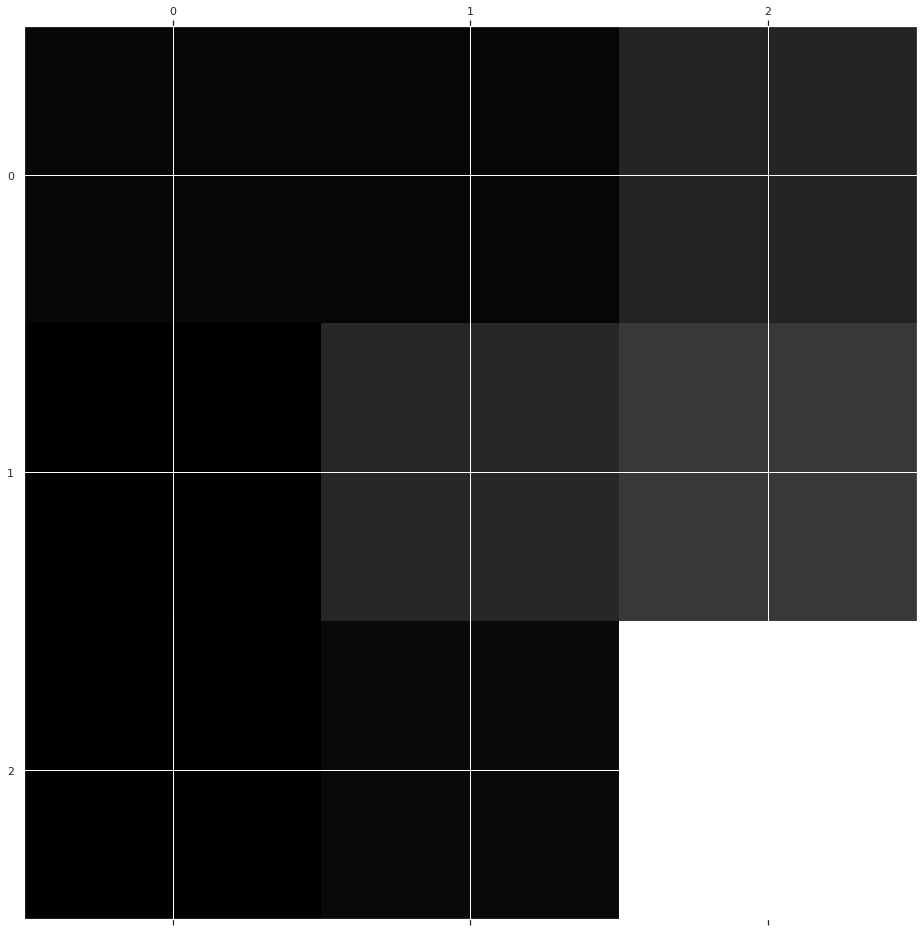

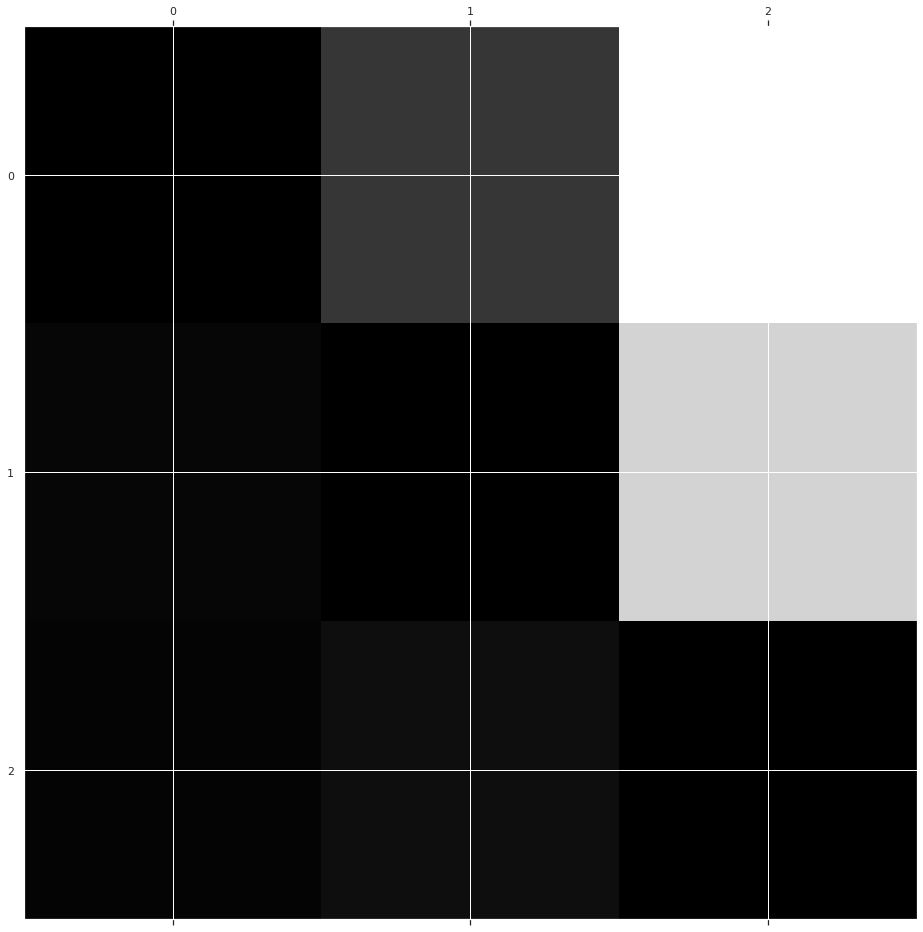

In [ ]:
predict_data=xgb.predict(val_data)
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
conf_mx=confusion_matrix(val_target, predict_data)
print(conf_mx) 
plt.matshow(conf_mx, cmap=plt.cm.gray) # 흰색일 수록 잘 분류했다.

row_sums=conf_mx.sum(axis=1, keepdims=True) # 흰색일수록 분류 성능이 낮다.
norm_conf_mx=conf_mx/row_sums
np.fill_diagonal(norm_conf_mx,0) #대각행렬을 0으로 채우겠다.
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()    

In [ ]:
xgb_table=pd.DataFrame(xgb.predict_proba(test_data))
xgb_table
xgb_table.to_csv('xgb_table_0314') 